# <center> COVID-19 疫情分析 </center>

# 一、問題陳述

## 1. 亞洲部分國家感染患者中的死亡人數比例
## 2. 台灣地區每日施打疫苗人數與患者成長數比較

# 二、動機

## COVID-19 從去年開始就大大的影響著我們的生活，各國對於這波疫情都分別有做出許多不同的對策。加上有許多網站都有提供疫情統計的 open data ， 希望能夠透過這些 data 做一些相關分析，並讓我們對各國狀況更加了解。


# 三、預期成果

## 1. 從死亡人數比例可以探討當地的醫療資源是否充足，以及尋思當地是否有出現更嚴重的變種病毒。

## 2. 從患者成長數與疫苗施打數的比較可以探討疫情嚴重程度對國人施打疫苗意願的影響程度。

# 四、數據預覽及分析結論

### 疫情相關資料於 COVID-19全球疫情地圖 網站下載，以CSV檔載入。以下為我們整理所需表格的資料：

## 1. 亞洲部分國家感染患者中的死亡人數比例

### 先將各國資料個別載入，把我們所需用到的確診患者人數與死亡人數兩個表格調出來做整理，並製作成圖表以方便觀看

## Import 所需 library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar as cal
import importlib

## 使用函數

In [2]:
def monthly_conf(array):
    #每天累積確診人數
    accum_confirmed  = [0 for i in range(len(array.index))]
    #每天當日確診人數
    daily_confirmed = [0 for i in range(len(array.index))]
    #將確診人數欄位之資料轉換成陣列
    for i in range(len(array.index)):
        accum_confirmed[i] = array["確診數"][i]
    #將累積確診人數陣列->當日確診人數
    for j in range(len(array.index)-1):
        daily_confirmed[j] = accum_confirmed[j]-accum_confirmed[j+1]
        if(j==range(len(array.index)-1)):#最後一筆不用減
            daily_confirmed[j+1] = array["確診數"][j+1]
    #資料是反的
    daily_confirmed.reverse()

    #預覽 (把底下的'#'符號刪除)
    #print(daily_confirmed)
    
    dates = list(array.檢核日期)
    #資料是反的
    dates.reverse()

    #區間內每個月確診數
    mnthly_conf = [0 for i in range(len(mounth_list))]
    i = 0
    j = 0
    for lastd in data_lastday_list:
        while dates[i] != lastd:
            mnthly_conf[j] += daily_confirmed[i]
            i+=1
        mnthly_conf[j] += daily_confirmed[i]
        i+=1
        j+=1
    return mnthly_conf

In [3]:
def monthly_dead(array):
    #每天累積死亡人數
    accum_dead = [0 for i in range(len(array.index))]
    #每天當日死亡人數
    daily_dead = [0 for i in range(len(array.index))]
    for i in range(len(array.index)):
        accum_dead[i] = array["死亡數"][i]

    for j in range(len(array.index)-1):
        daily_dead[j] = accum_dead[j]-accum_dead[j+1]
        if(j==range(len(array.index)-1)):
            daily_dead[j+1]=array["死亡數"][j+1]
    #資料是反的
    daily_dead.reverse()

    #預覽 (把底下的'#'符號刪除)
    #print(daily_dead)
    
    dates = list(array.檢核日期)
    #資料是反的
    dates.reverse()

    #區間內每個月死亡數
    mnthly_dead = [0 for i in range(len(mounth_list))]
    i = 0
    j = 0
    for lastd in data_lastday_list:
        while dates[i] != lastd:
            mnthly_dead[j] += daily_dead[i]
            i+=1
        mnthly_dead[j] += daily_dead[i]
        i+=1
        j+=1
    return mnthly_dead

## Read要使用的資料

In [4]:
# 請繼續往下加
th = pd.read_csv('TH_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
vn = pd.read_csv('VN_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
tw = pd.read_csv('TW_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
sg = pd.read_csv('SG_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
ph = pd.read_csv('PH_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
my = pd.read_csv('MY_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
mm = pd.read_csv('MM_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
la = pd.read_csv('LA_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
kr = pd.read_csv('KR_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
kh = pd.read_csv('KH_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
jp = pd.read_csv('JP_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
IN = pd.read_csv('IN_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
id = pd.read_csv('ID_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
cn = pd.read_csv('CN_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int
hk = pd.read_csv('HK_csse_covid_19_daily_reports_country.csv',thousands=',',encoding='utf-8')#thousands=','是把千分號刪掉的意思string->int


## 日期處理

In [5]:
# 最後一天的日期 & 第一天的日期
# 不管取哪個國家都一樣
end = th.iloc[0].檢核日期
start = th.iloc[len(th.index)-1].檢核日期

#取年月
mounth_list = list()
datestart=dt.datetime.strptime(start,'%Y-%m-%d')
dateend=dt.datetime.strptime(end,'%Y-%m-%d')
mounth_list.append([datestart.year, datestart.month])
i = 0
while datestart<=dateend:
    tmp = list([datestart.year, datestart.month])
    if tmp != mounth_list[i]:
        mounth_list.append(tmp)
        i+=1
    datestart += dt.timedelta(days=28)

str_mounth_list = list()
for i in range(len(mounth_list)):
    str_mounth_list.append(str(mounth_list[i][0])+'-'+str(mounth_list[i][1]))

#取每月最後一天
data_lastday_list = list()
for ym in mounth_list:
    lastday = dt.date(year = ym[0], month = ym[1], day = cal.monthrange(ym[0],ym[1])[1])
    data_lastday_list.append(str(lastday))

# 因為最後一天不是月底，把最後值刪除後加上原本的最後一天
data_lastday_list.pop()
data_lastday_list.append(end)

## 算出來的數值

In [6]:
# 泰國
th_monthly_conf = monthly_conf(th)
th_monthly_dead = monthly_dead(th)
# 越南
vn_monthly_conf = monthly_conf(vn)
vn_monthly_dead = monthly_dead(vn)
# 台灣
tw_monthly_conf = monthly_conf(tw)
tw_monthly_dead = monthly_dead(tw)
# 新加坡
sg_monthly_conf = monthly_conf(sg)
sg_monthly_dead = monthly_dead(sg)
# 菲律賓
ph_monthly_conf = monthly_conf(ph)
ph_monthly_dead = monthly_dead(ph)
# 馬來西亞
my_monthly_conf = monthly_conf(my)
my_monthly_dead = monthly_dead(my)
# 緬甸
mm_monthly_conf = monthly_conf(mm)
mm_monthly_dead = monthly_dead(mm)
# 寮國
la_monthly_conf = monthly_conf(la)
la_monthly_dead = monthly_dead(la)
# 韓國
kr_monthly_conf = monthly_conf(kr)
kr_monthly_dead = monthly_dead(kr)
# 柬埔寨
kh_monthly_conf = monthly_conf(kh)
kh_monthly_dead = monthly_dead(kh)
# 日本
jp_monthly_conf = monthly_conf(jp)
jp_monthly_dead = monthly_dead(jp)
# 印度
IN_monthly_conf = monthly_conf(IN)
IN_monthly_dead = monthly_dead(IN)
# 印尼
id_monthly_conf = monthly_conf(id)
id_monthly_dead = monthly_dead(id)
# 中國
cn_monthly_conf = monthly_conf(cn)
cn_monthly_dead = monthly_dead(cn)
# 香港
hk_monthly_conf = monthly_conf(hk)
hk_monthly_dead = monthly_dead(hk)
#按照上面的格式加其他國家進去

## 以下將各個國家之確診人數及死亡人數做成圖表呈現

### 泰國

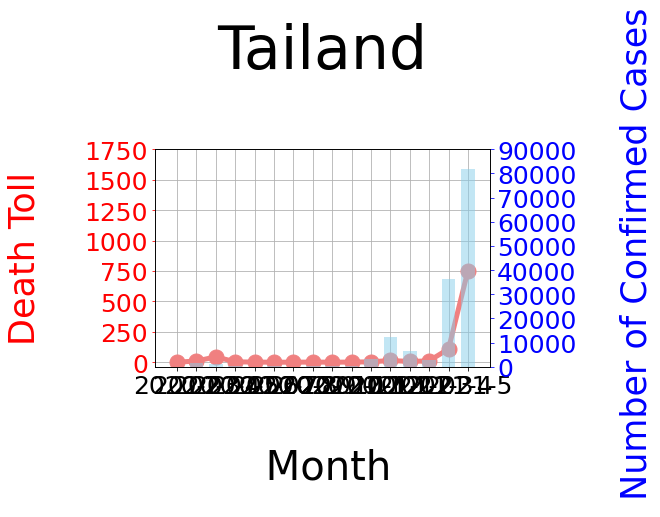

In [7]:
fig, th_ax1 = plt.subplots()

th_ax1.set_xlabel('\n Month',size=40)

th_ax1.plot(str_mounth_list,th_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
th_ax1.set_ylabel('Death Toll\n',color='r',size=35)
th_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 18)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,250,500,750,1000,1250,1500,1750])
plt.grid()

th_ax2 = th_ax1.twinx()

th_ax2.bar(str_mounth_list,th_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
th_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
th_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 18)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,10000,20000,30000,40000,50000,
            60000,70000,80000,90000])

plt.title("Tailand\n",size=60)

plt.show()

### 越南

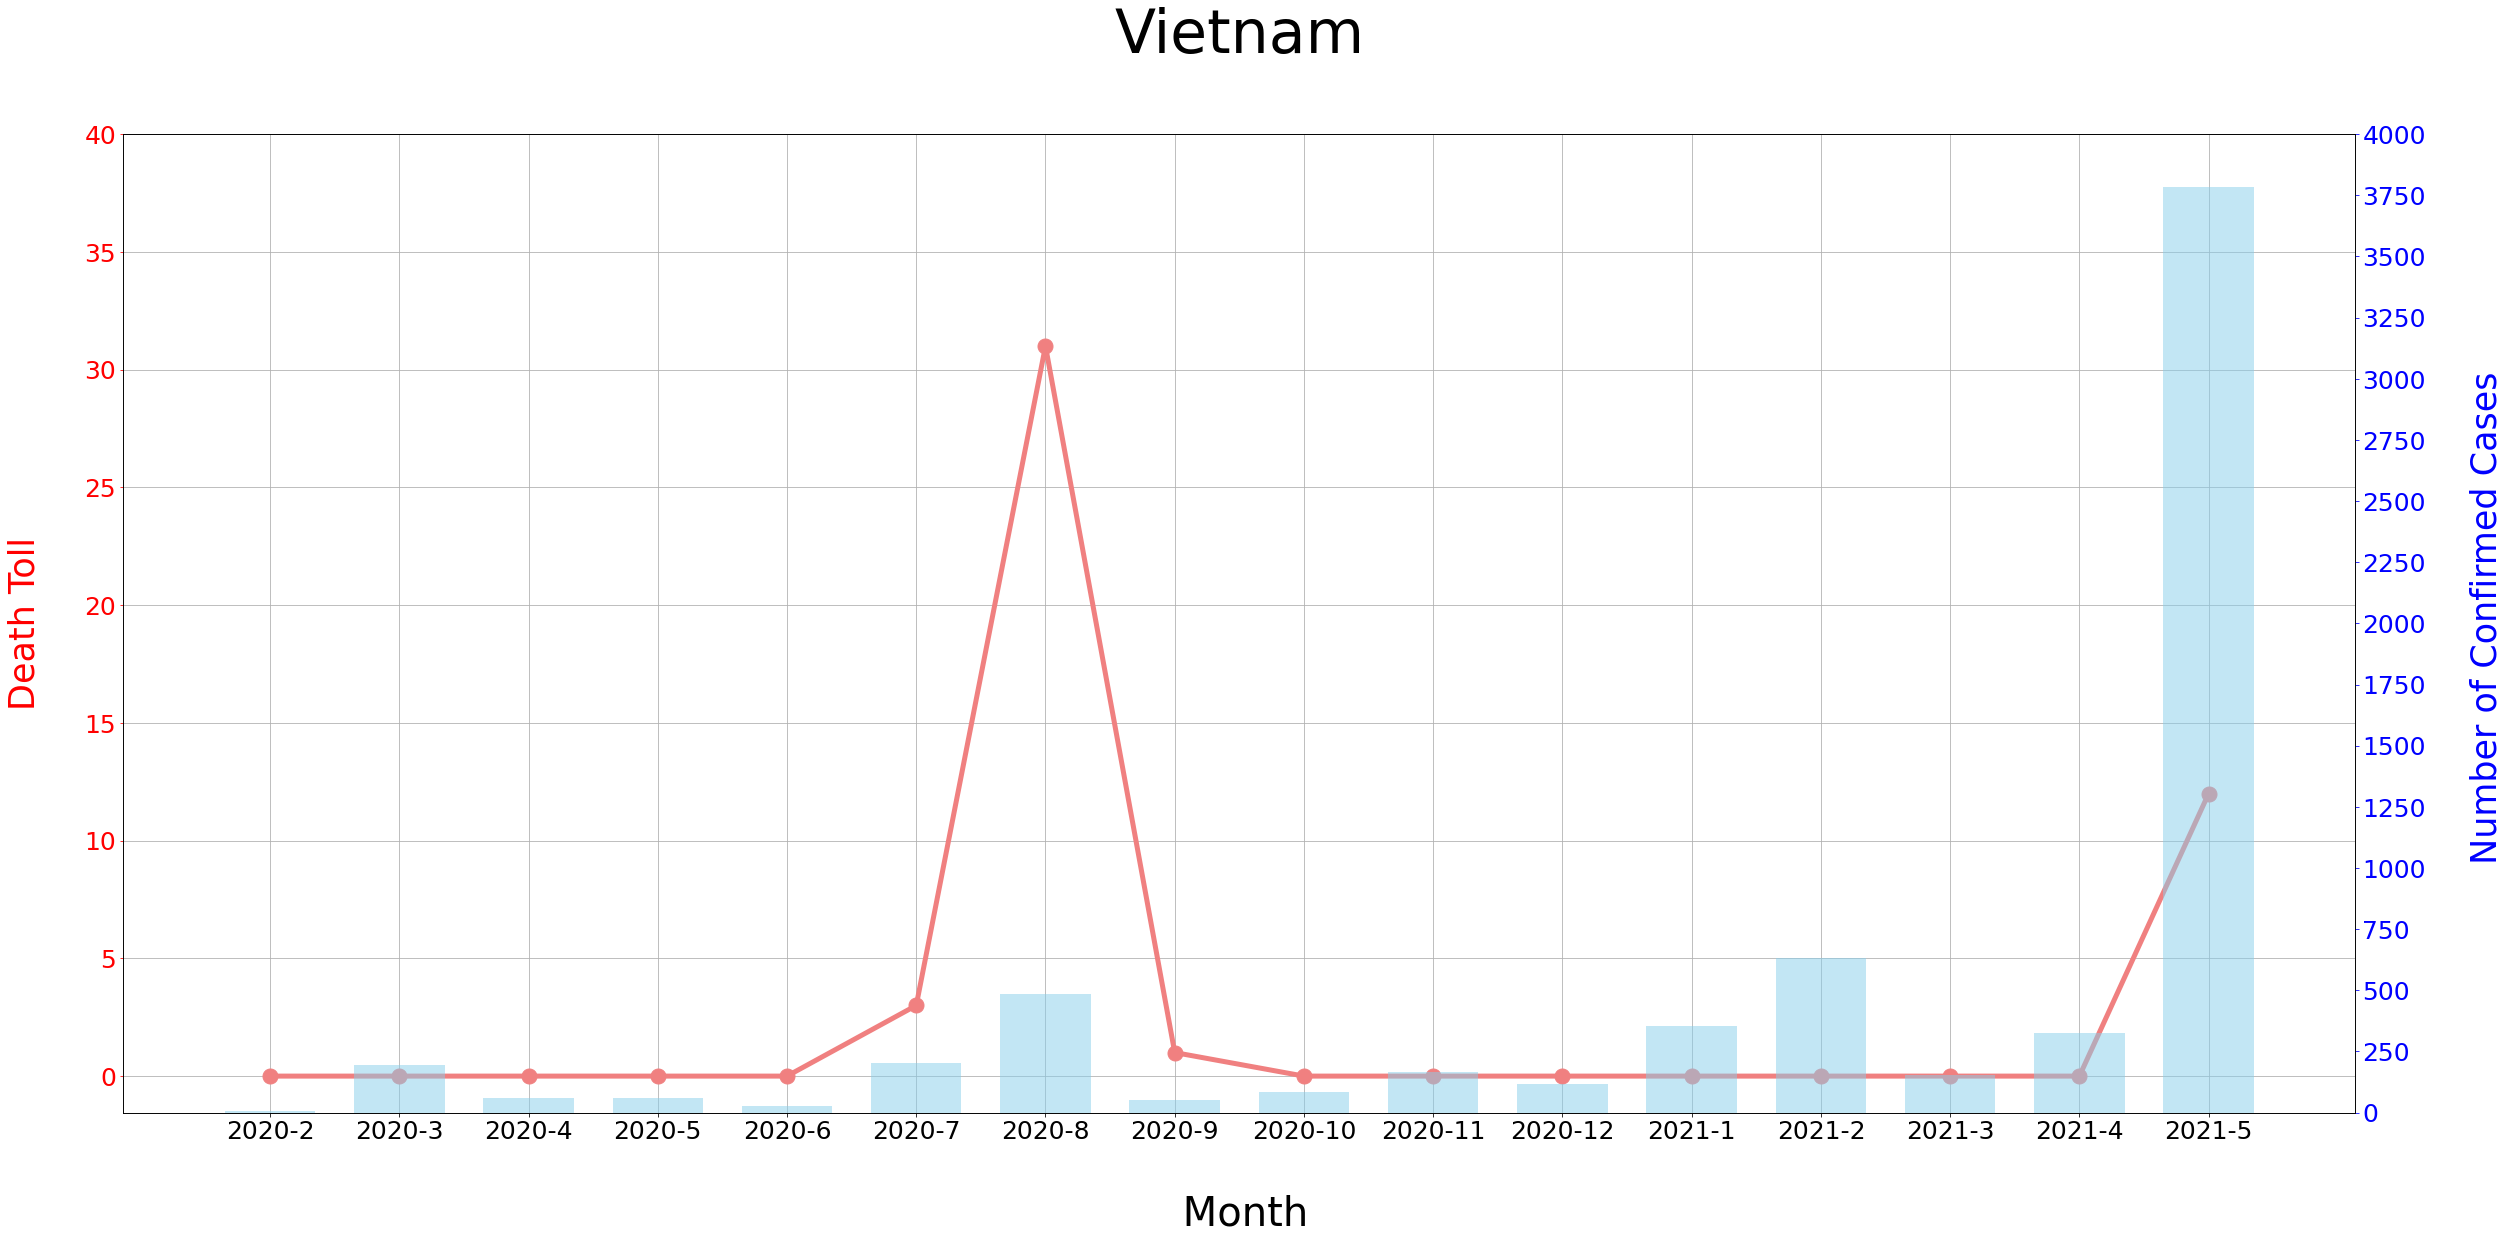

In [8]:
fig, vn_ax1 = plt.subplots()

vn_ax1.set_xlabel('\n Month',size=40)

vn_ax1.plot(str_mounth_list,vn_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
vn_ax1.set_ylabel('Death Toll\n',color='r',size=35)
vn_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 18)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,5,10,15,20,25,30,35,40])
plt.grid()

vn_ax2 = vn_ax1.twinx()

vn_ax2.bar(str_mounth_list,vn_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
vn_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
vn_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 18)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000])

plt.title("Vietnam\n",size=60)

plt.show()

### 台灣

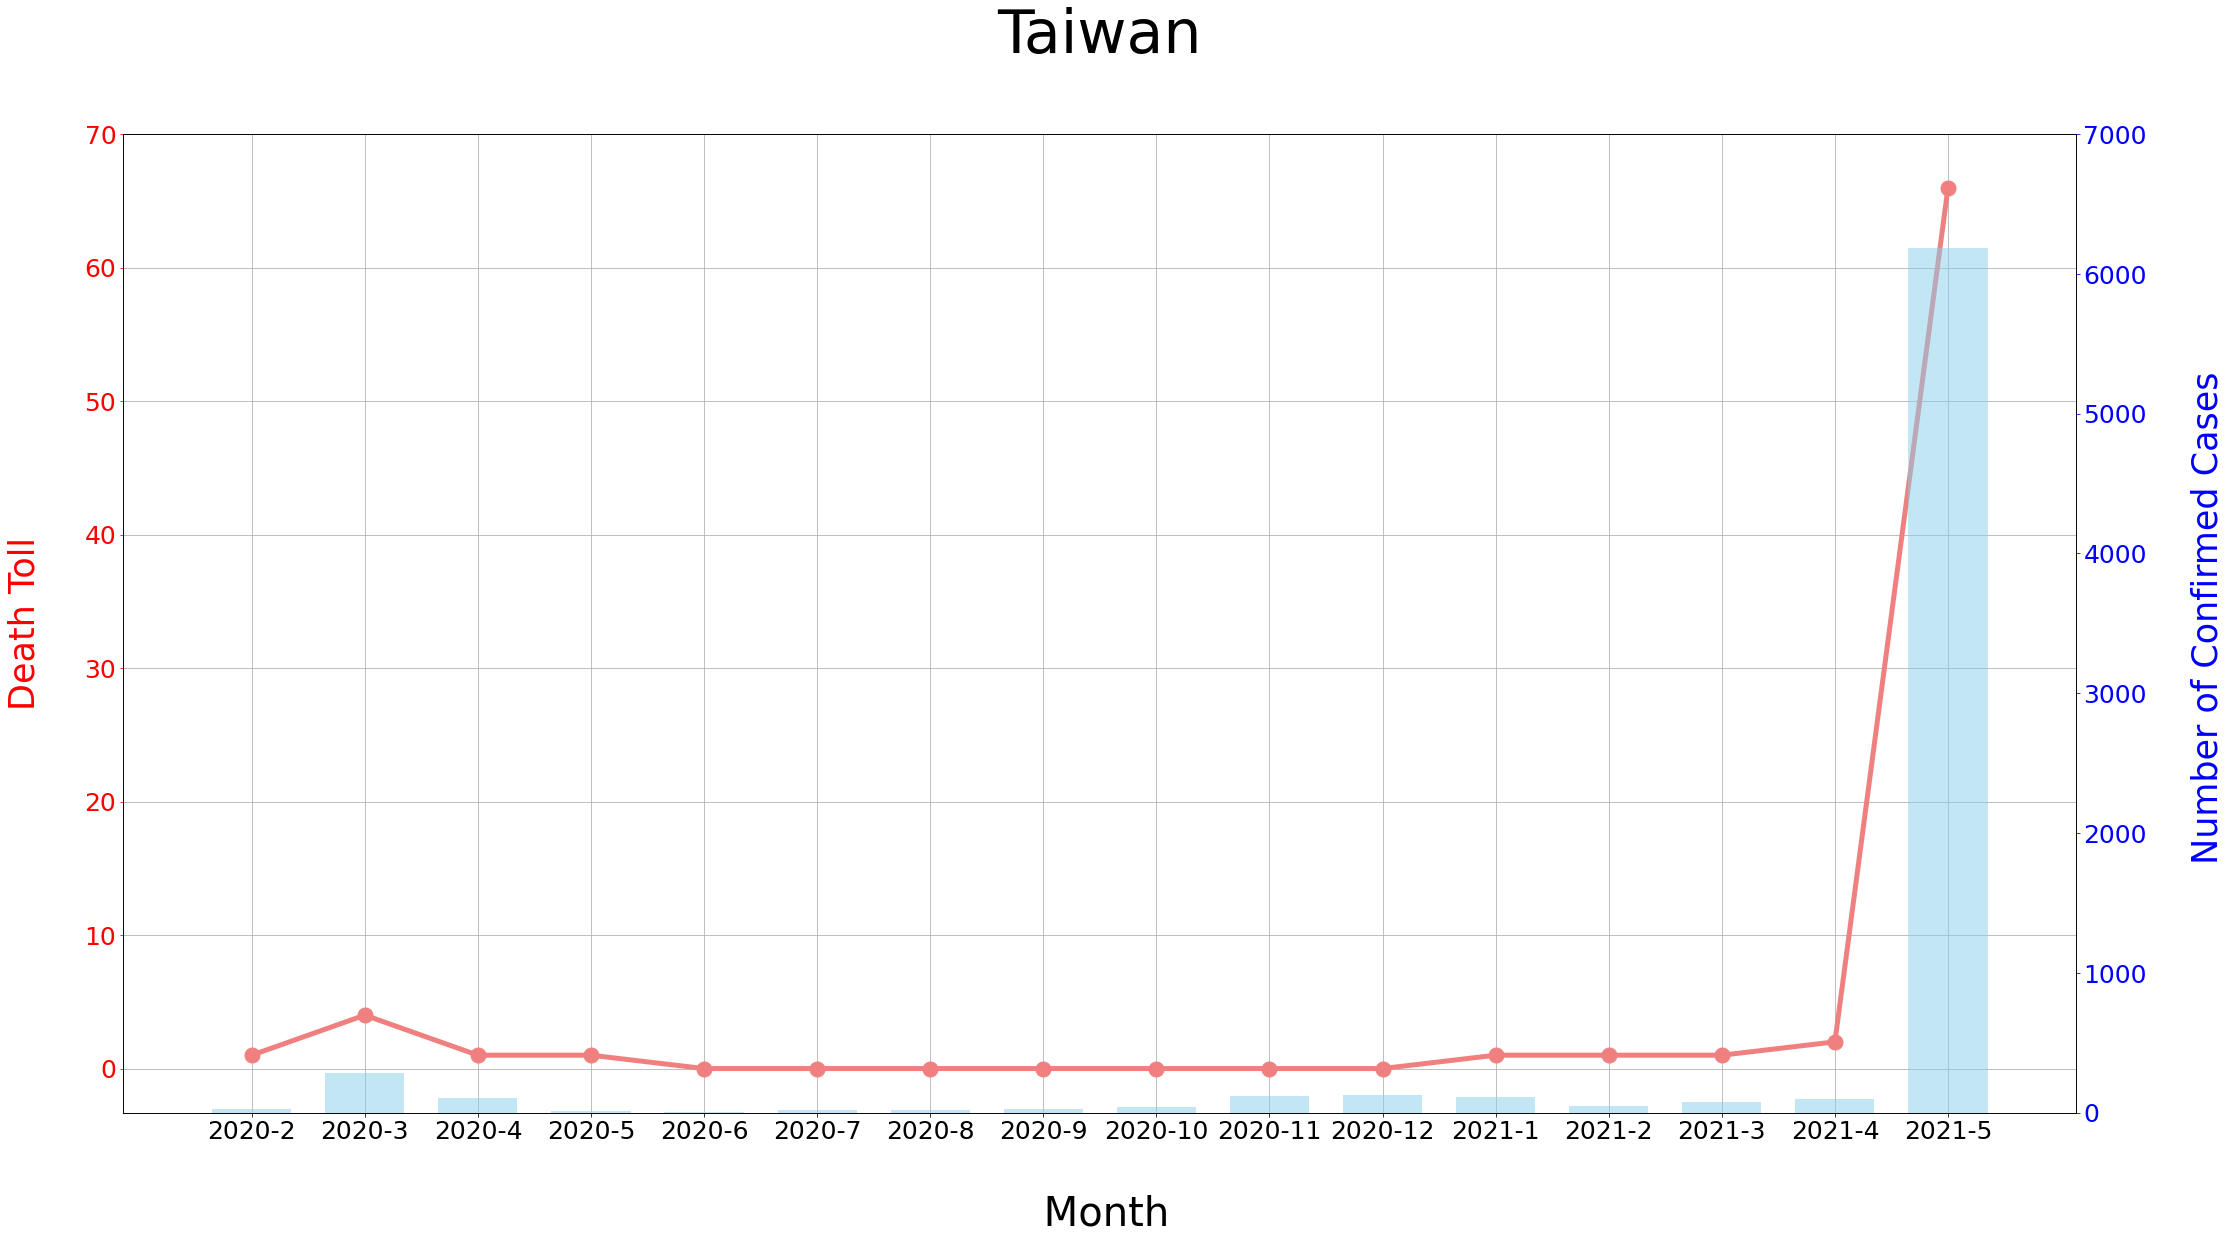

In [42]:
fig, tw_ax1 = plt.subplots()

tw_ax1.set_xlabel('\n Month',size=40)

tw_ax1.plot(str_mounth_list,tw_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
tw_ax1.set_ylabel('Death Toll\n',color='r',size=35)
tw_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (38, 20)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,10,20,30,40,50,60,70])
plt.grid()

tw_ax2 = tw_ax1.twinx()

tw_ax2.bar(str_mounth_list,tw_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
tw_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
tw_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (38, 20)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])

plt.title("Taiwan\n",size=60)

plt.show()

### 新加坡

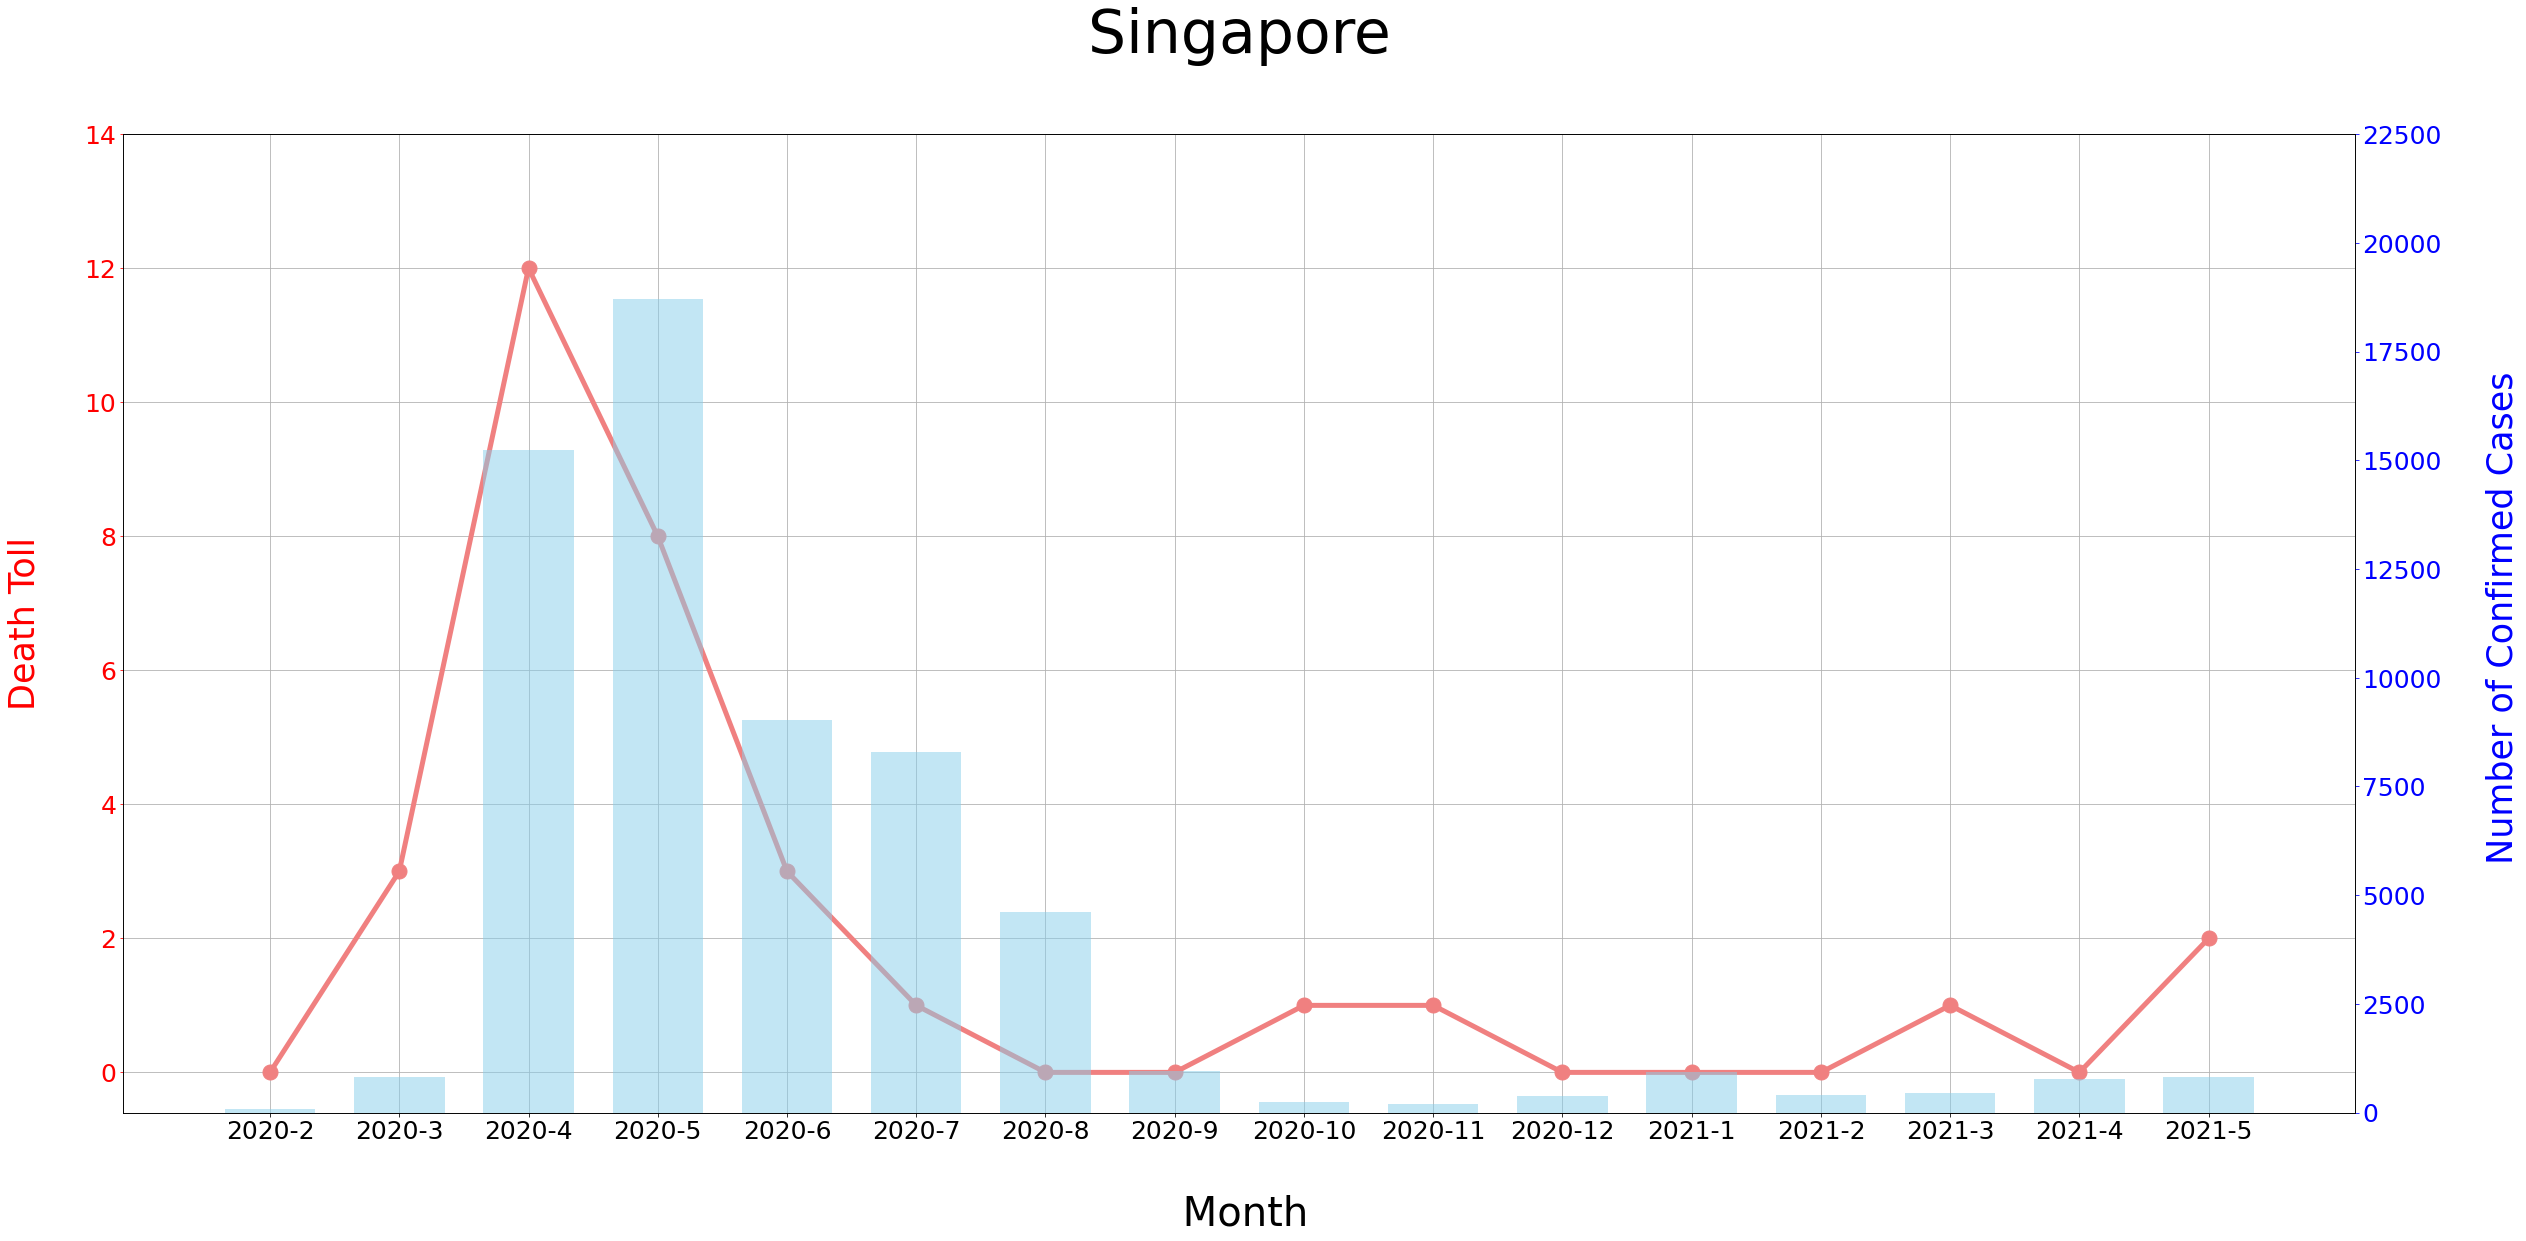

In [10]:
fig, sg_ax1 = plt.subplots()

sg_ax1.set_xlabel('\n Month',size=40)

sg_ax1.plot(str_mounth_list,sg_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
sg_ax1.set_ylabel('Death Toll\n',color='r',size=35)
sg_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,2,4,6,8,10,12,14])
plt.grid()

sg_ax2 = sg_ax1.twinx()

sg_ax2.bar(str_mounth_list,sg_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
sg_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
sg_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500])

plt.title("Singapore\n",size=60)

plt.show()

### 菲律賓

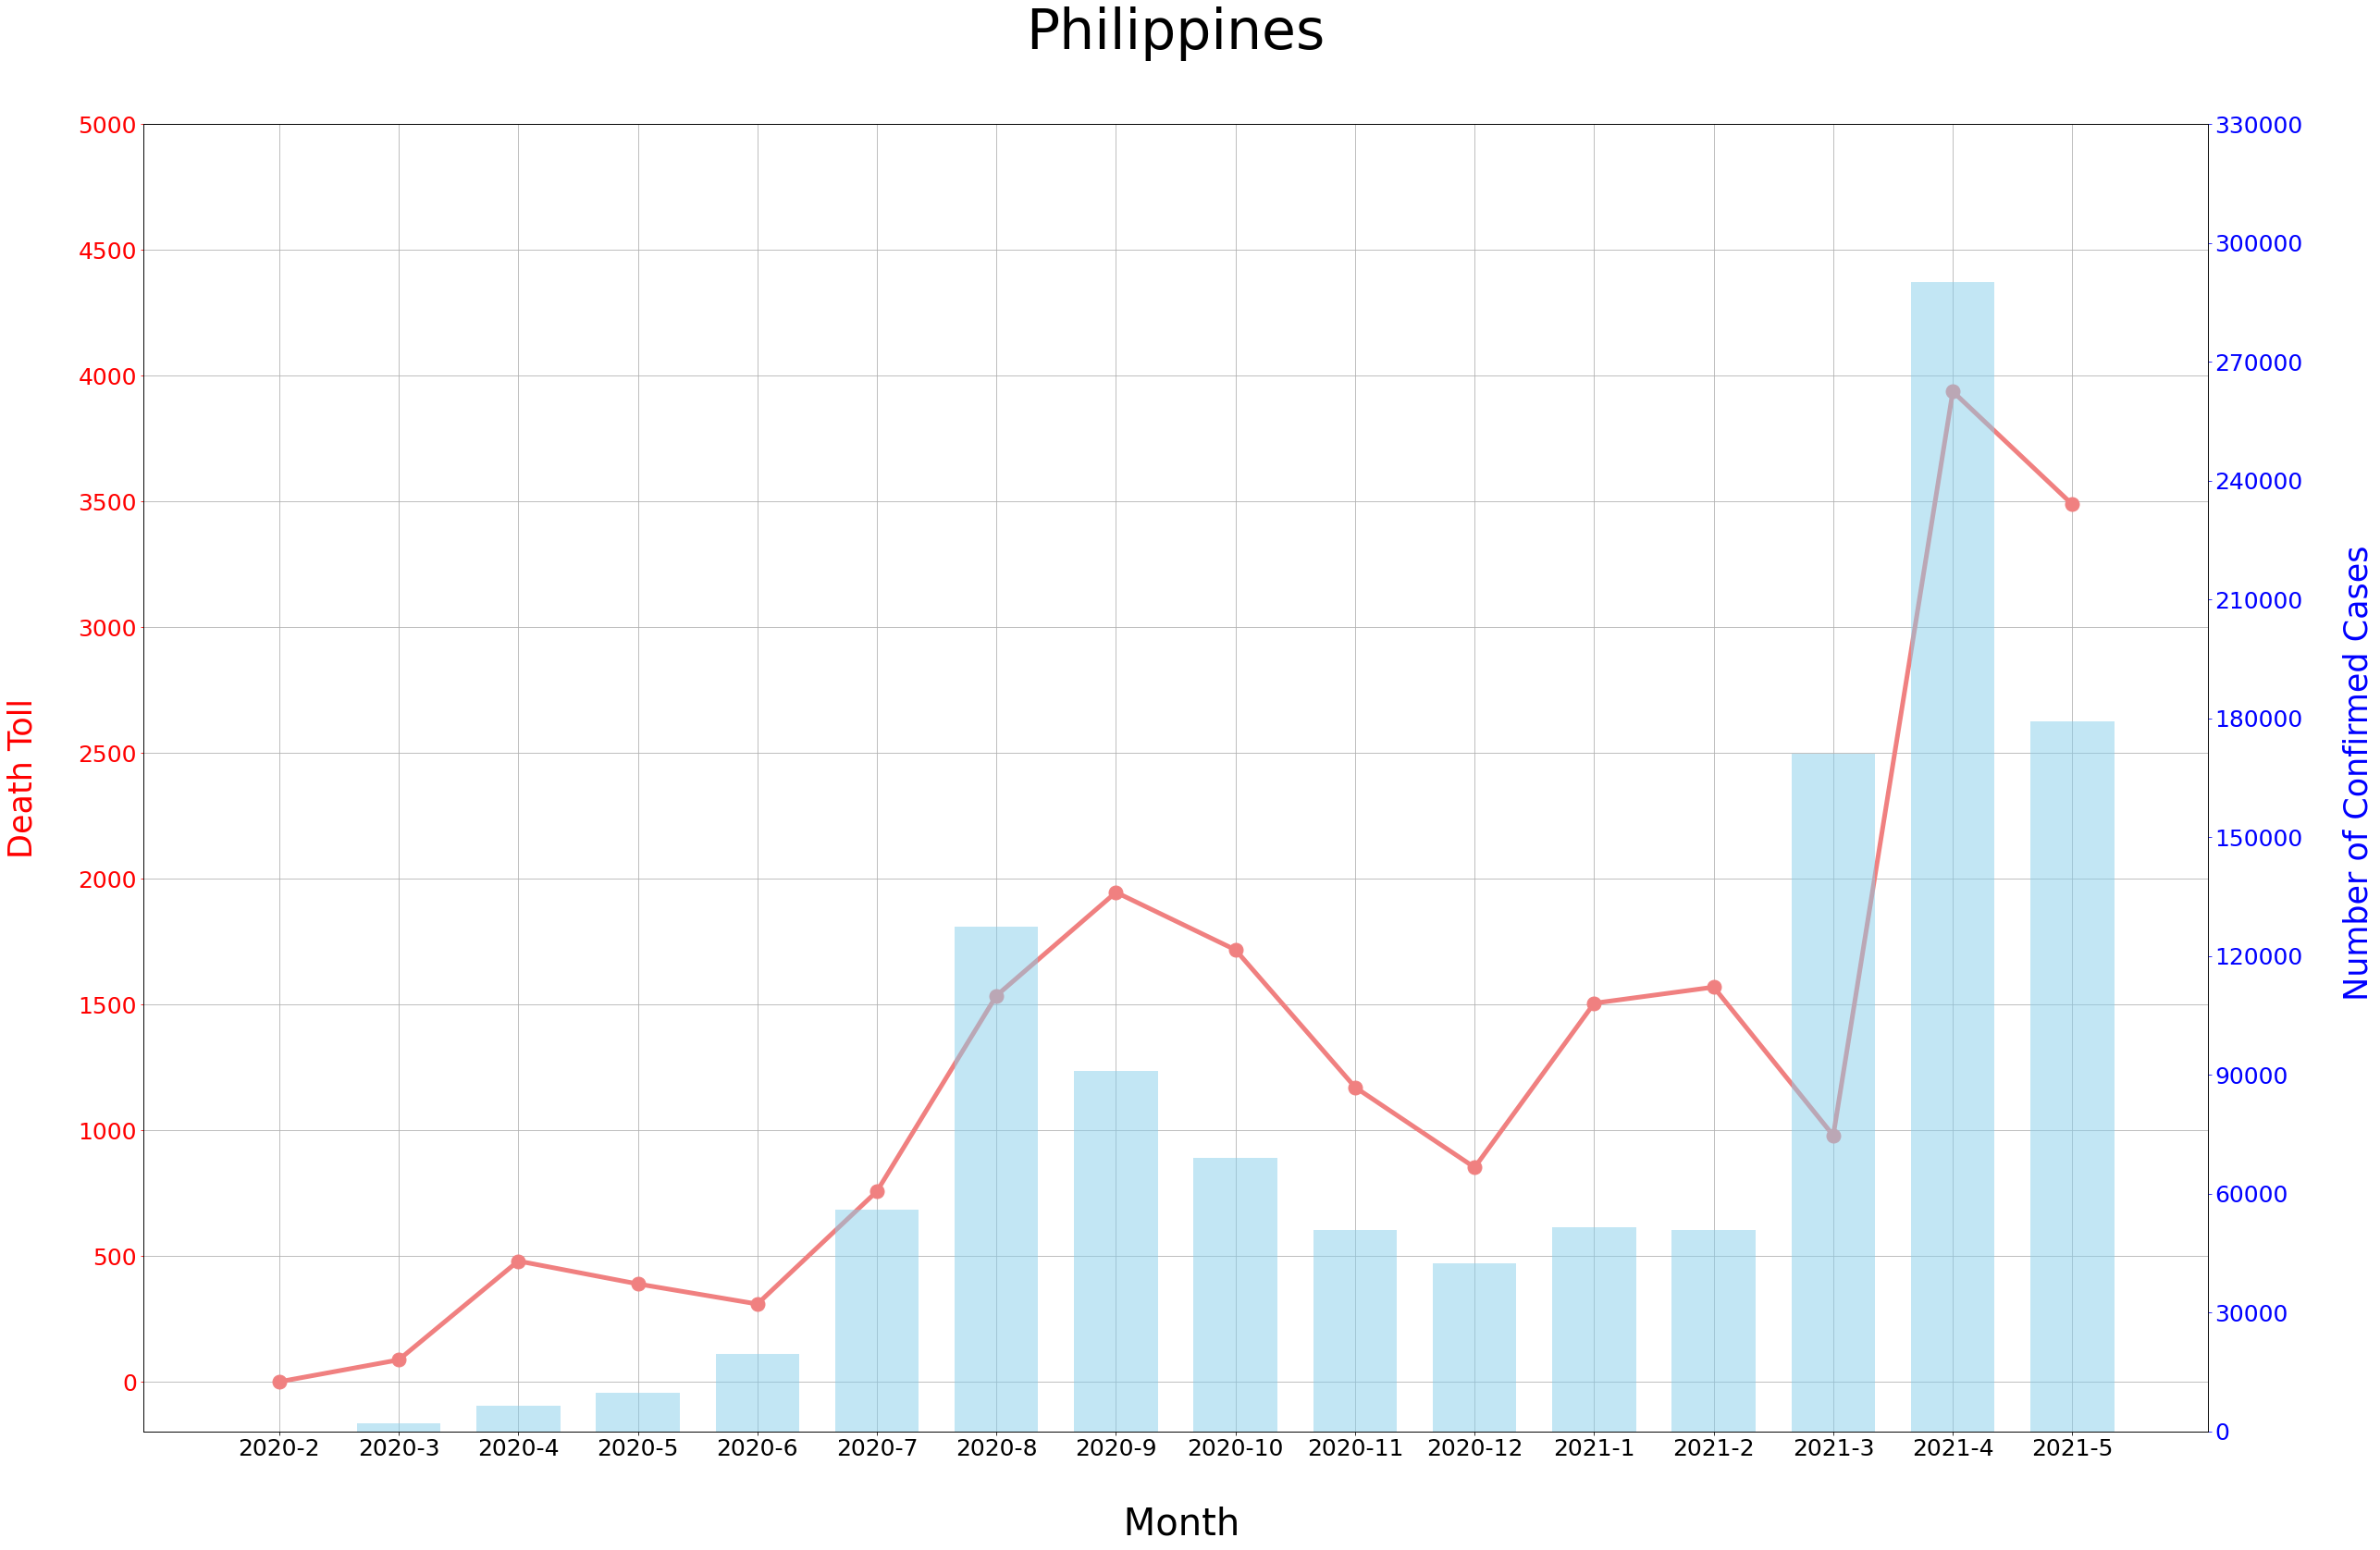

In [11]:
fig, ph_ax1 = plt.subplots()

ph_ax1.set_xlabel('\n Month',size=40)

ph_ax1.plot(str_mounth_list,ph_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
ph_ax1.set_ylabel('Death Toll\n',color='r',size=35)
ph_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.grid()

ph_ax2 = ph_ax1.twinx()

ph_ax2.bar(str_mounth_list,ph_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
ph_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
ph_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,30000,60000,90000,120000,150000,180000,210000,240000,270000,300000,330000])

plt.title("Philippines\n",size=60)

plt.show()

### 馬來西亞

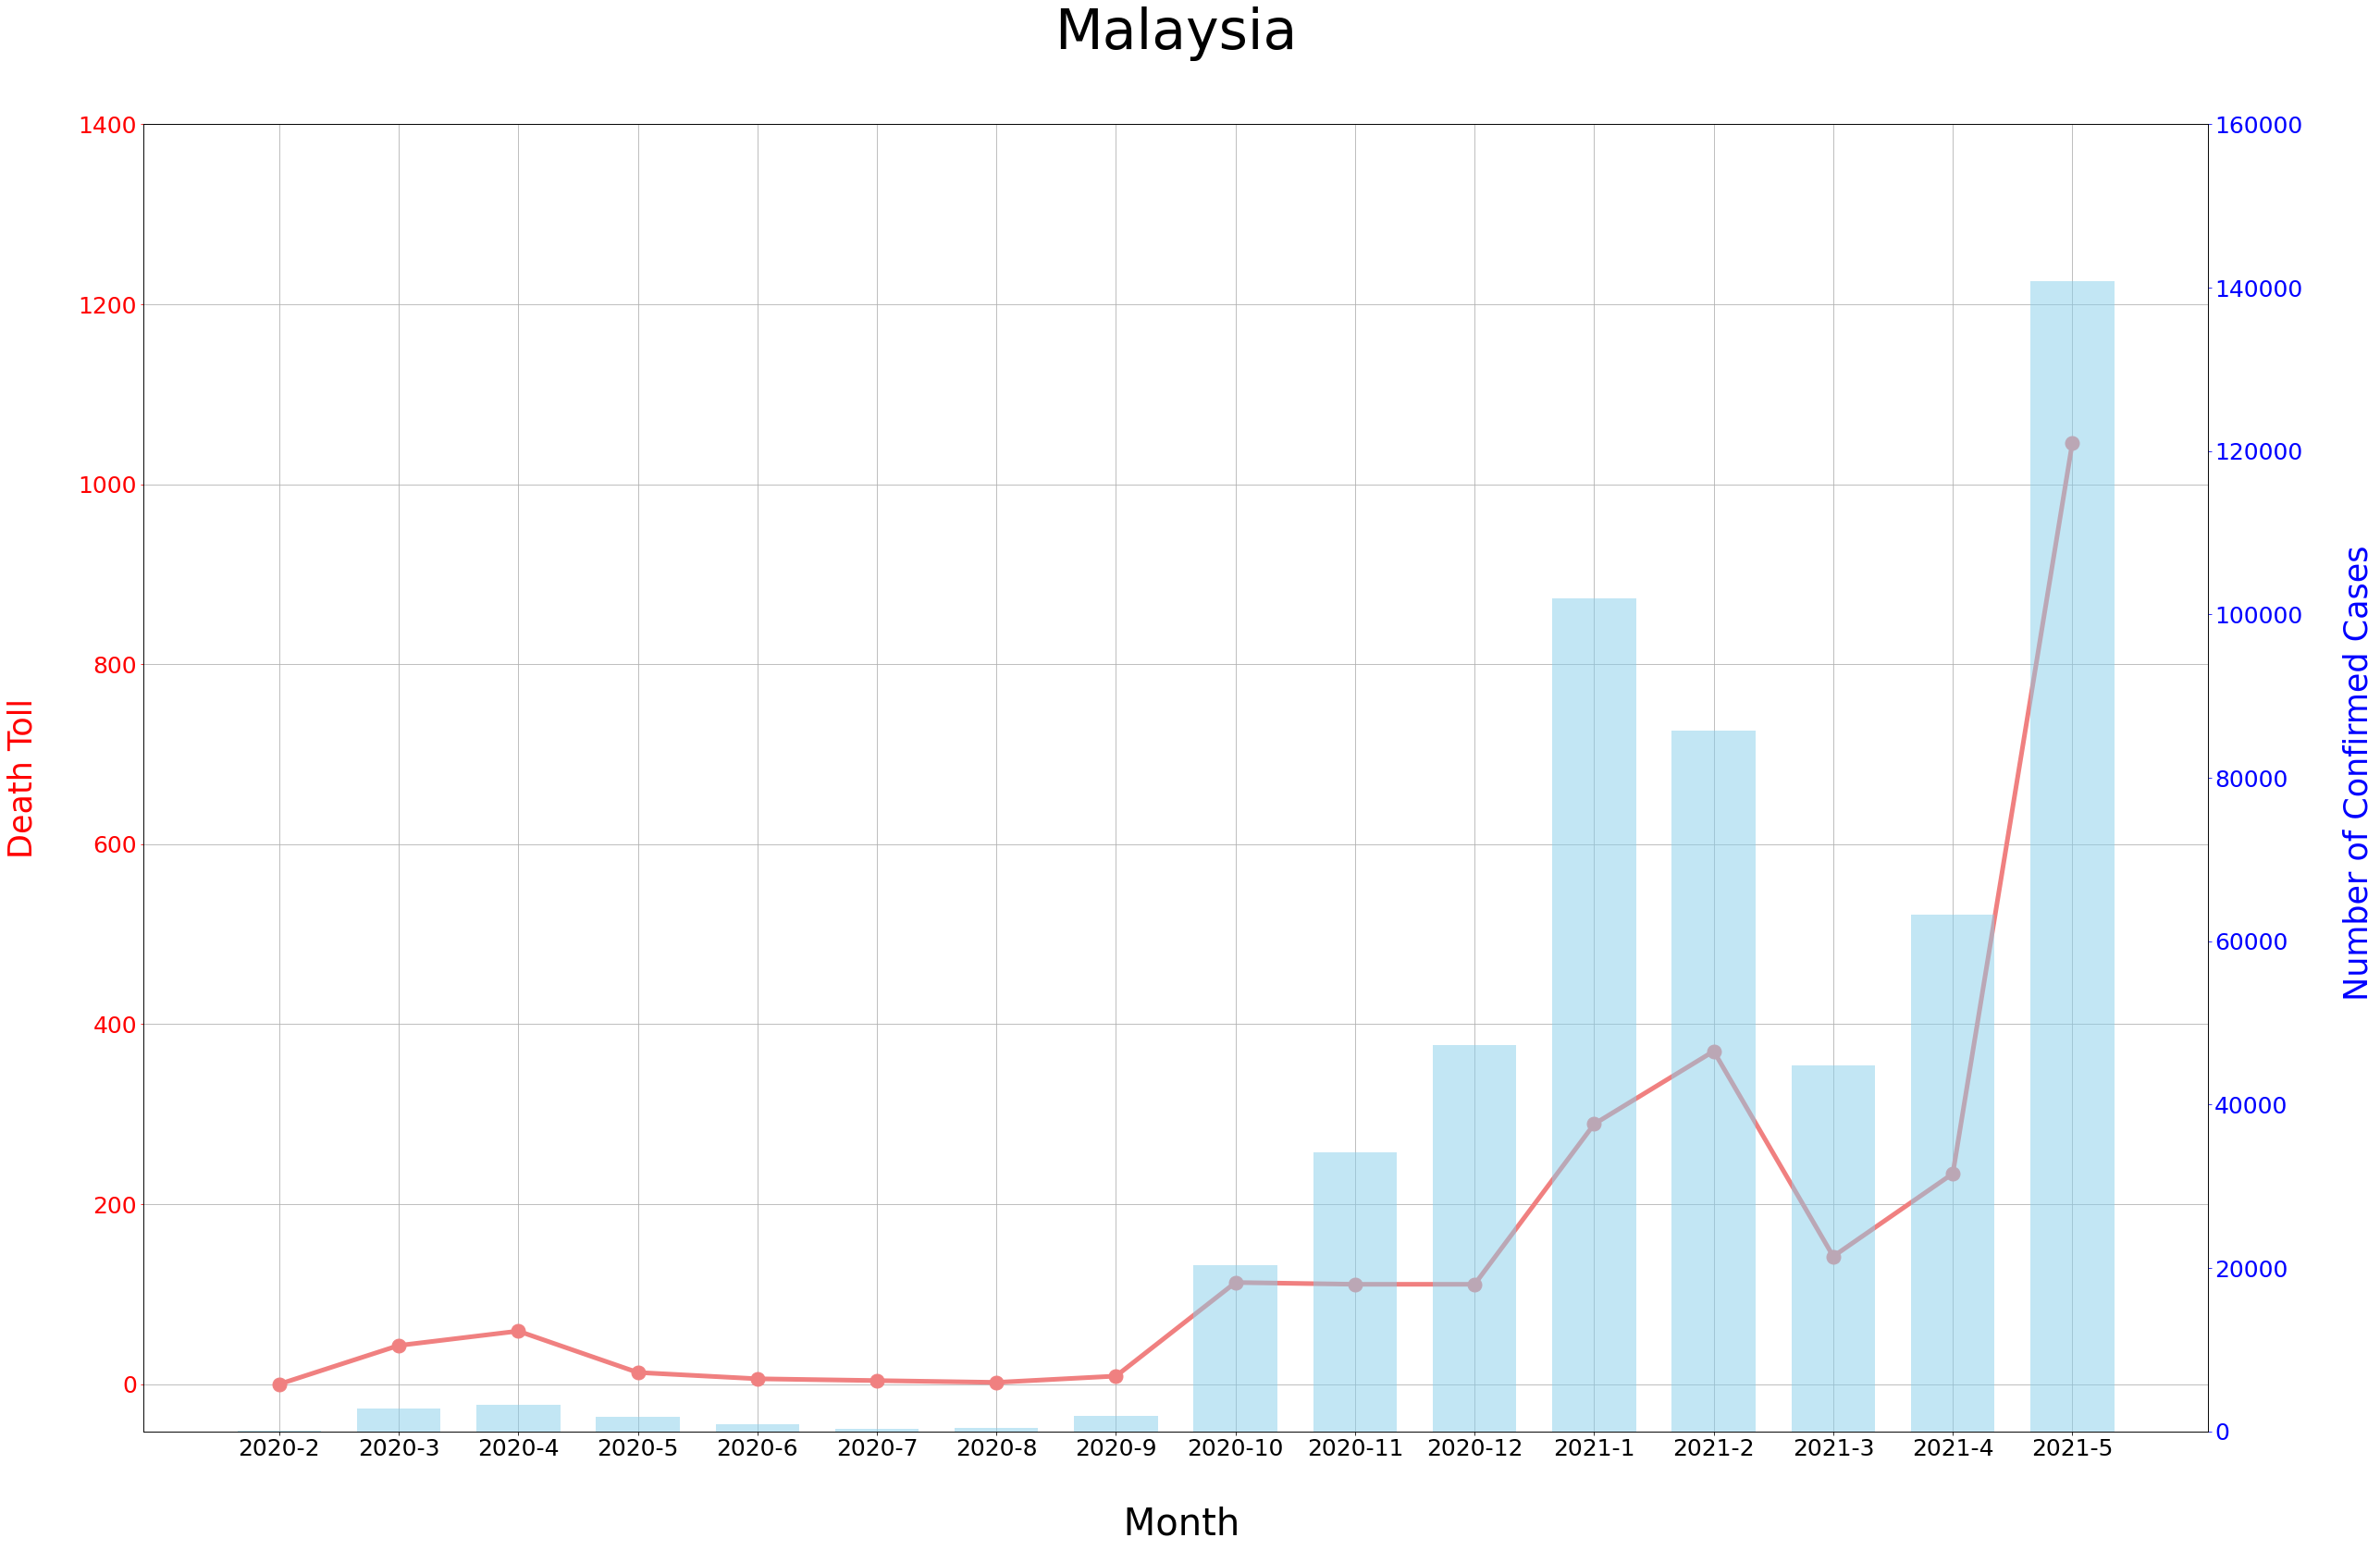

In [12]:
fig, my_ax1 = plt.subplots()

my_ax1.set_xlabel('\n Month',size=40)

my_ax1.plot(str_mounth_list,my_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
my_ax1.set_ylabel('Death Toll\n',color='r',size=35)
my_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,200,400,600,800,1000,1200,1400])
plt.grid()

my_ax2 = my_ax1.twinx()

my_ax2.bar(str_mounth_list,my_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
my_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
my_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,20000,40000,
            60000,80000,100000,
            120000,140000,160000])

plt.title("Malaysia\n",size=60)

plt.show()

### 緬甸

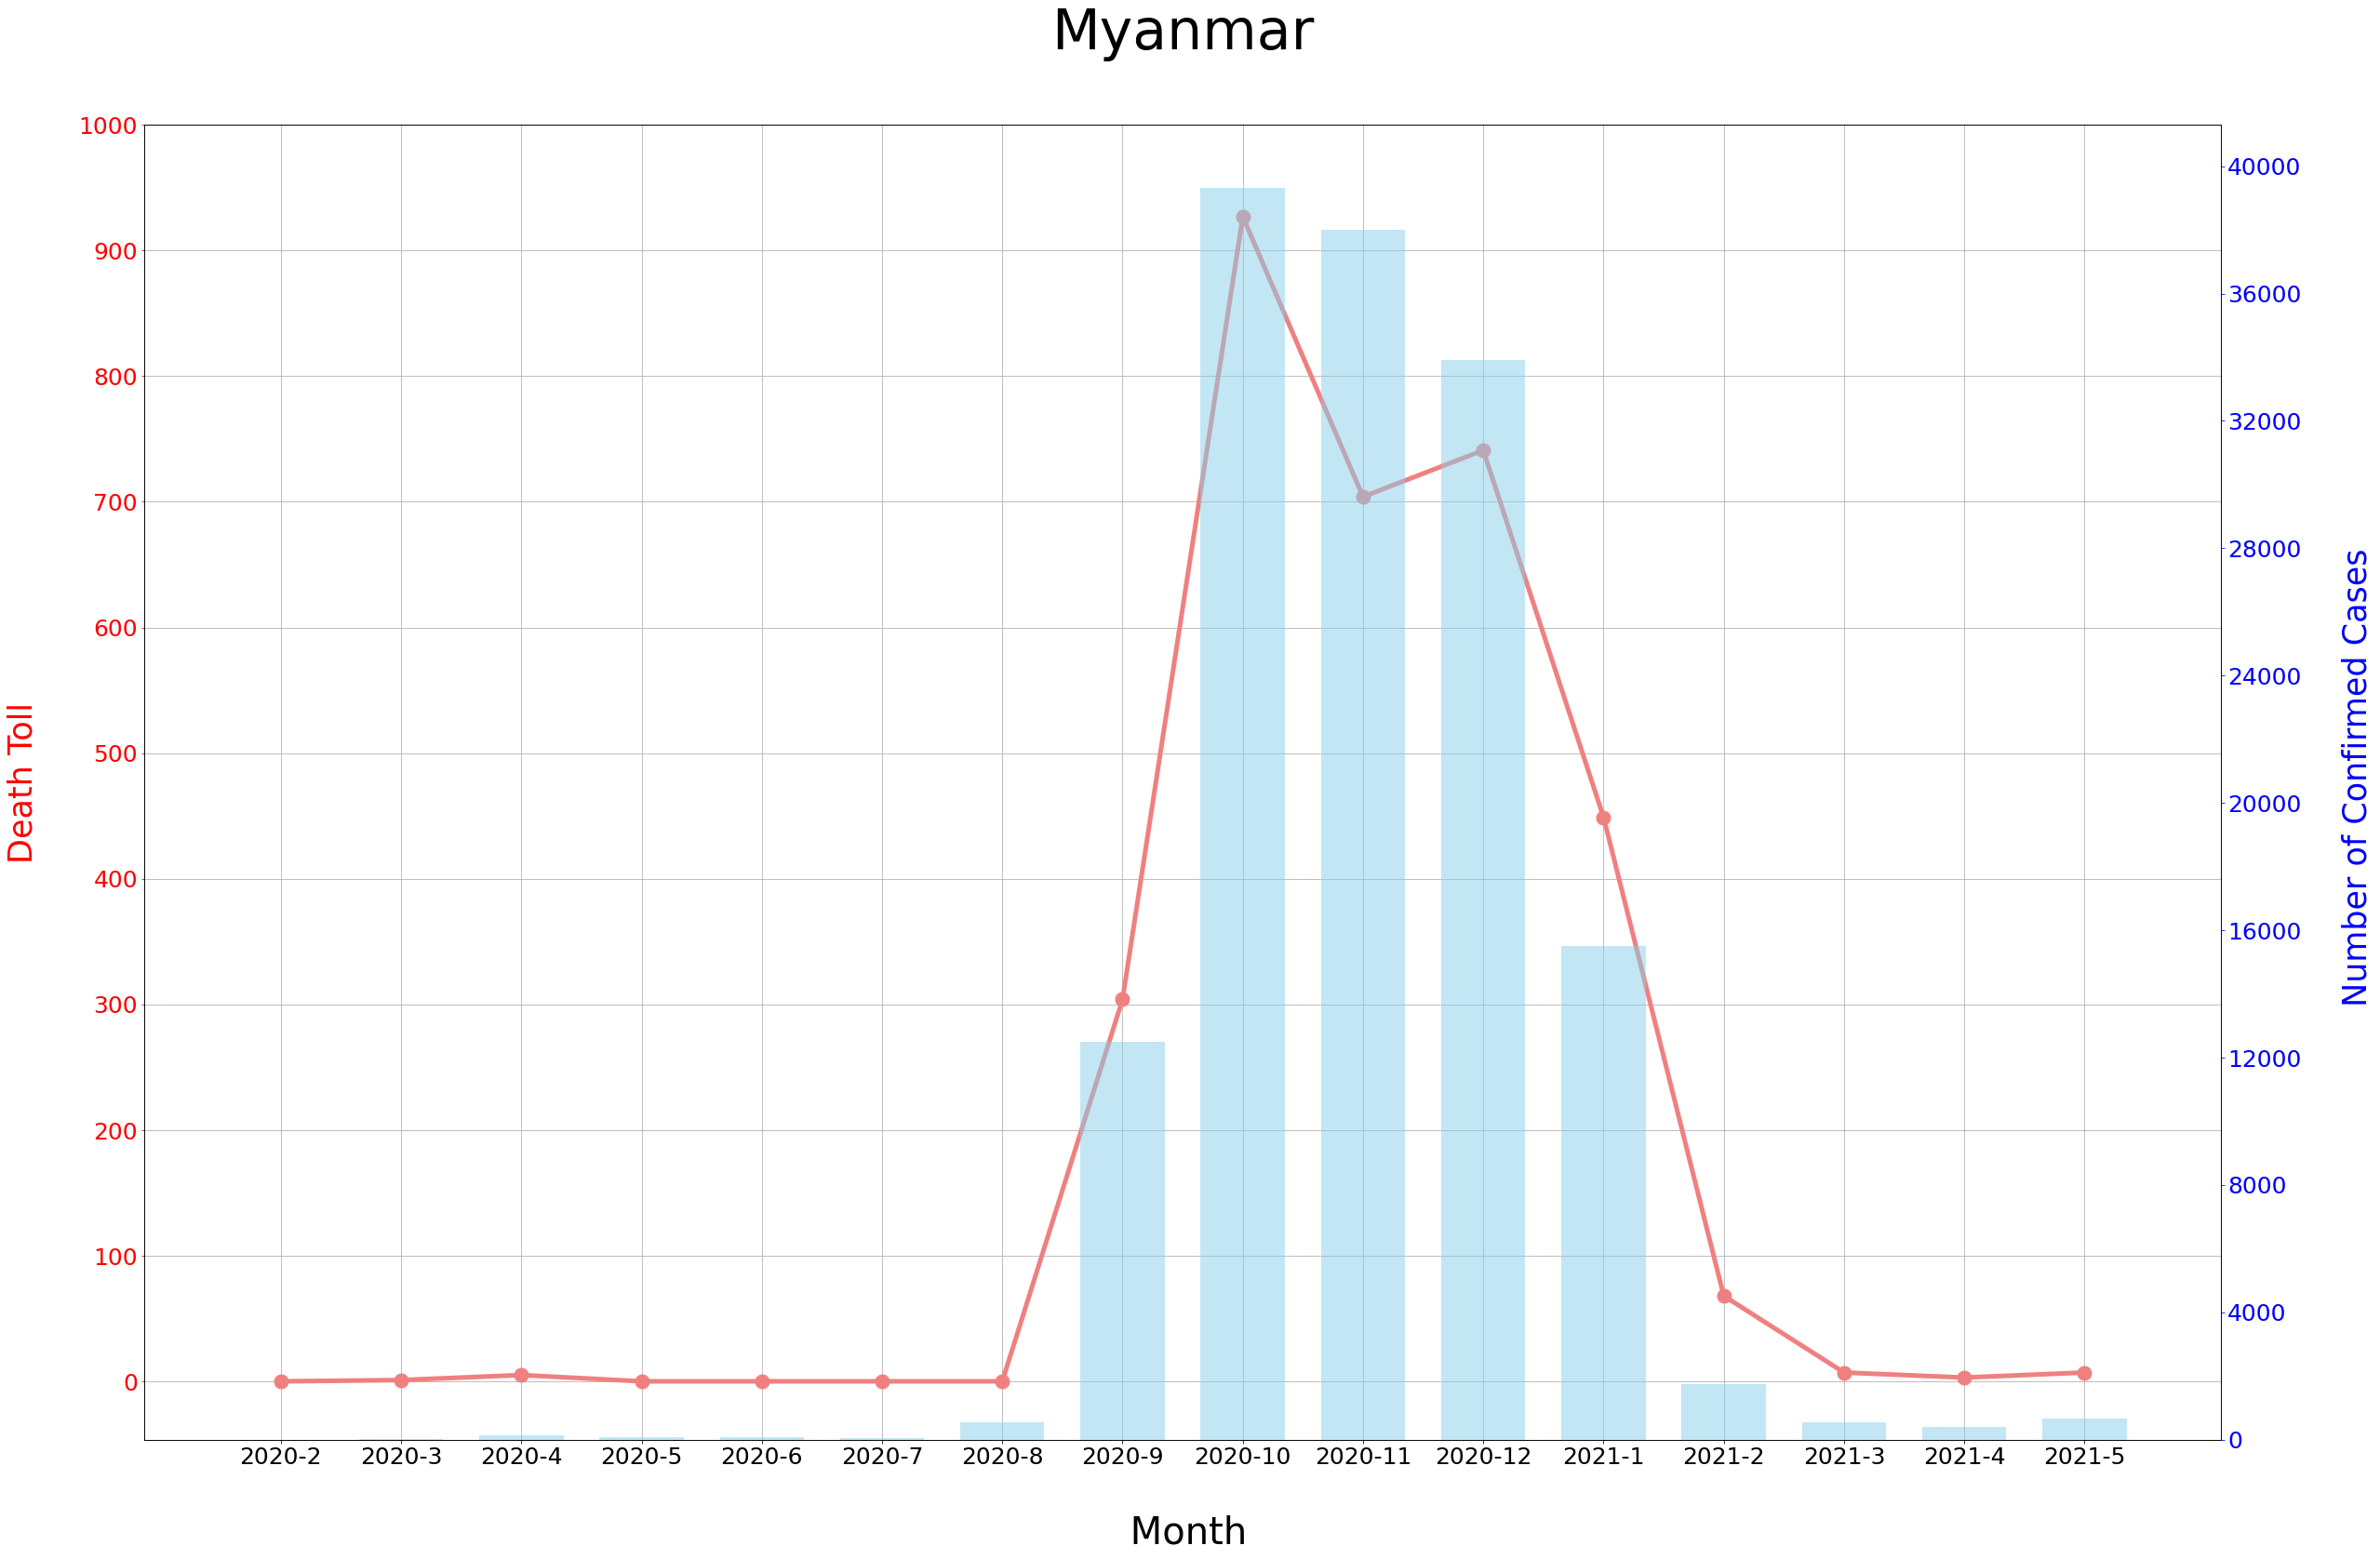

In [13]:
fig, mm_ax1 = plt.subplots()

mm_ax1.set_xlabel('\n Month',size=40)

mm_ax1.plot(str_mounth_list,mm_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
mm_ax1.set_ylabel('Death Toll\n',color='r',size=35)
mm_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.grid()

mm_ax2 = mm_ax1.twinx()

mm_ax2.bar(str_mounth_list,mm_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
mm_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
mm_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,4000,8000,12000,16000,20000,24000,28000,32000,36000,40000])

plt.title("Myanmar\n",size=60)

plt.show()

### 寮國

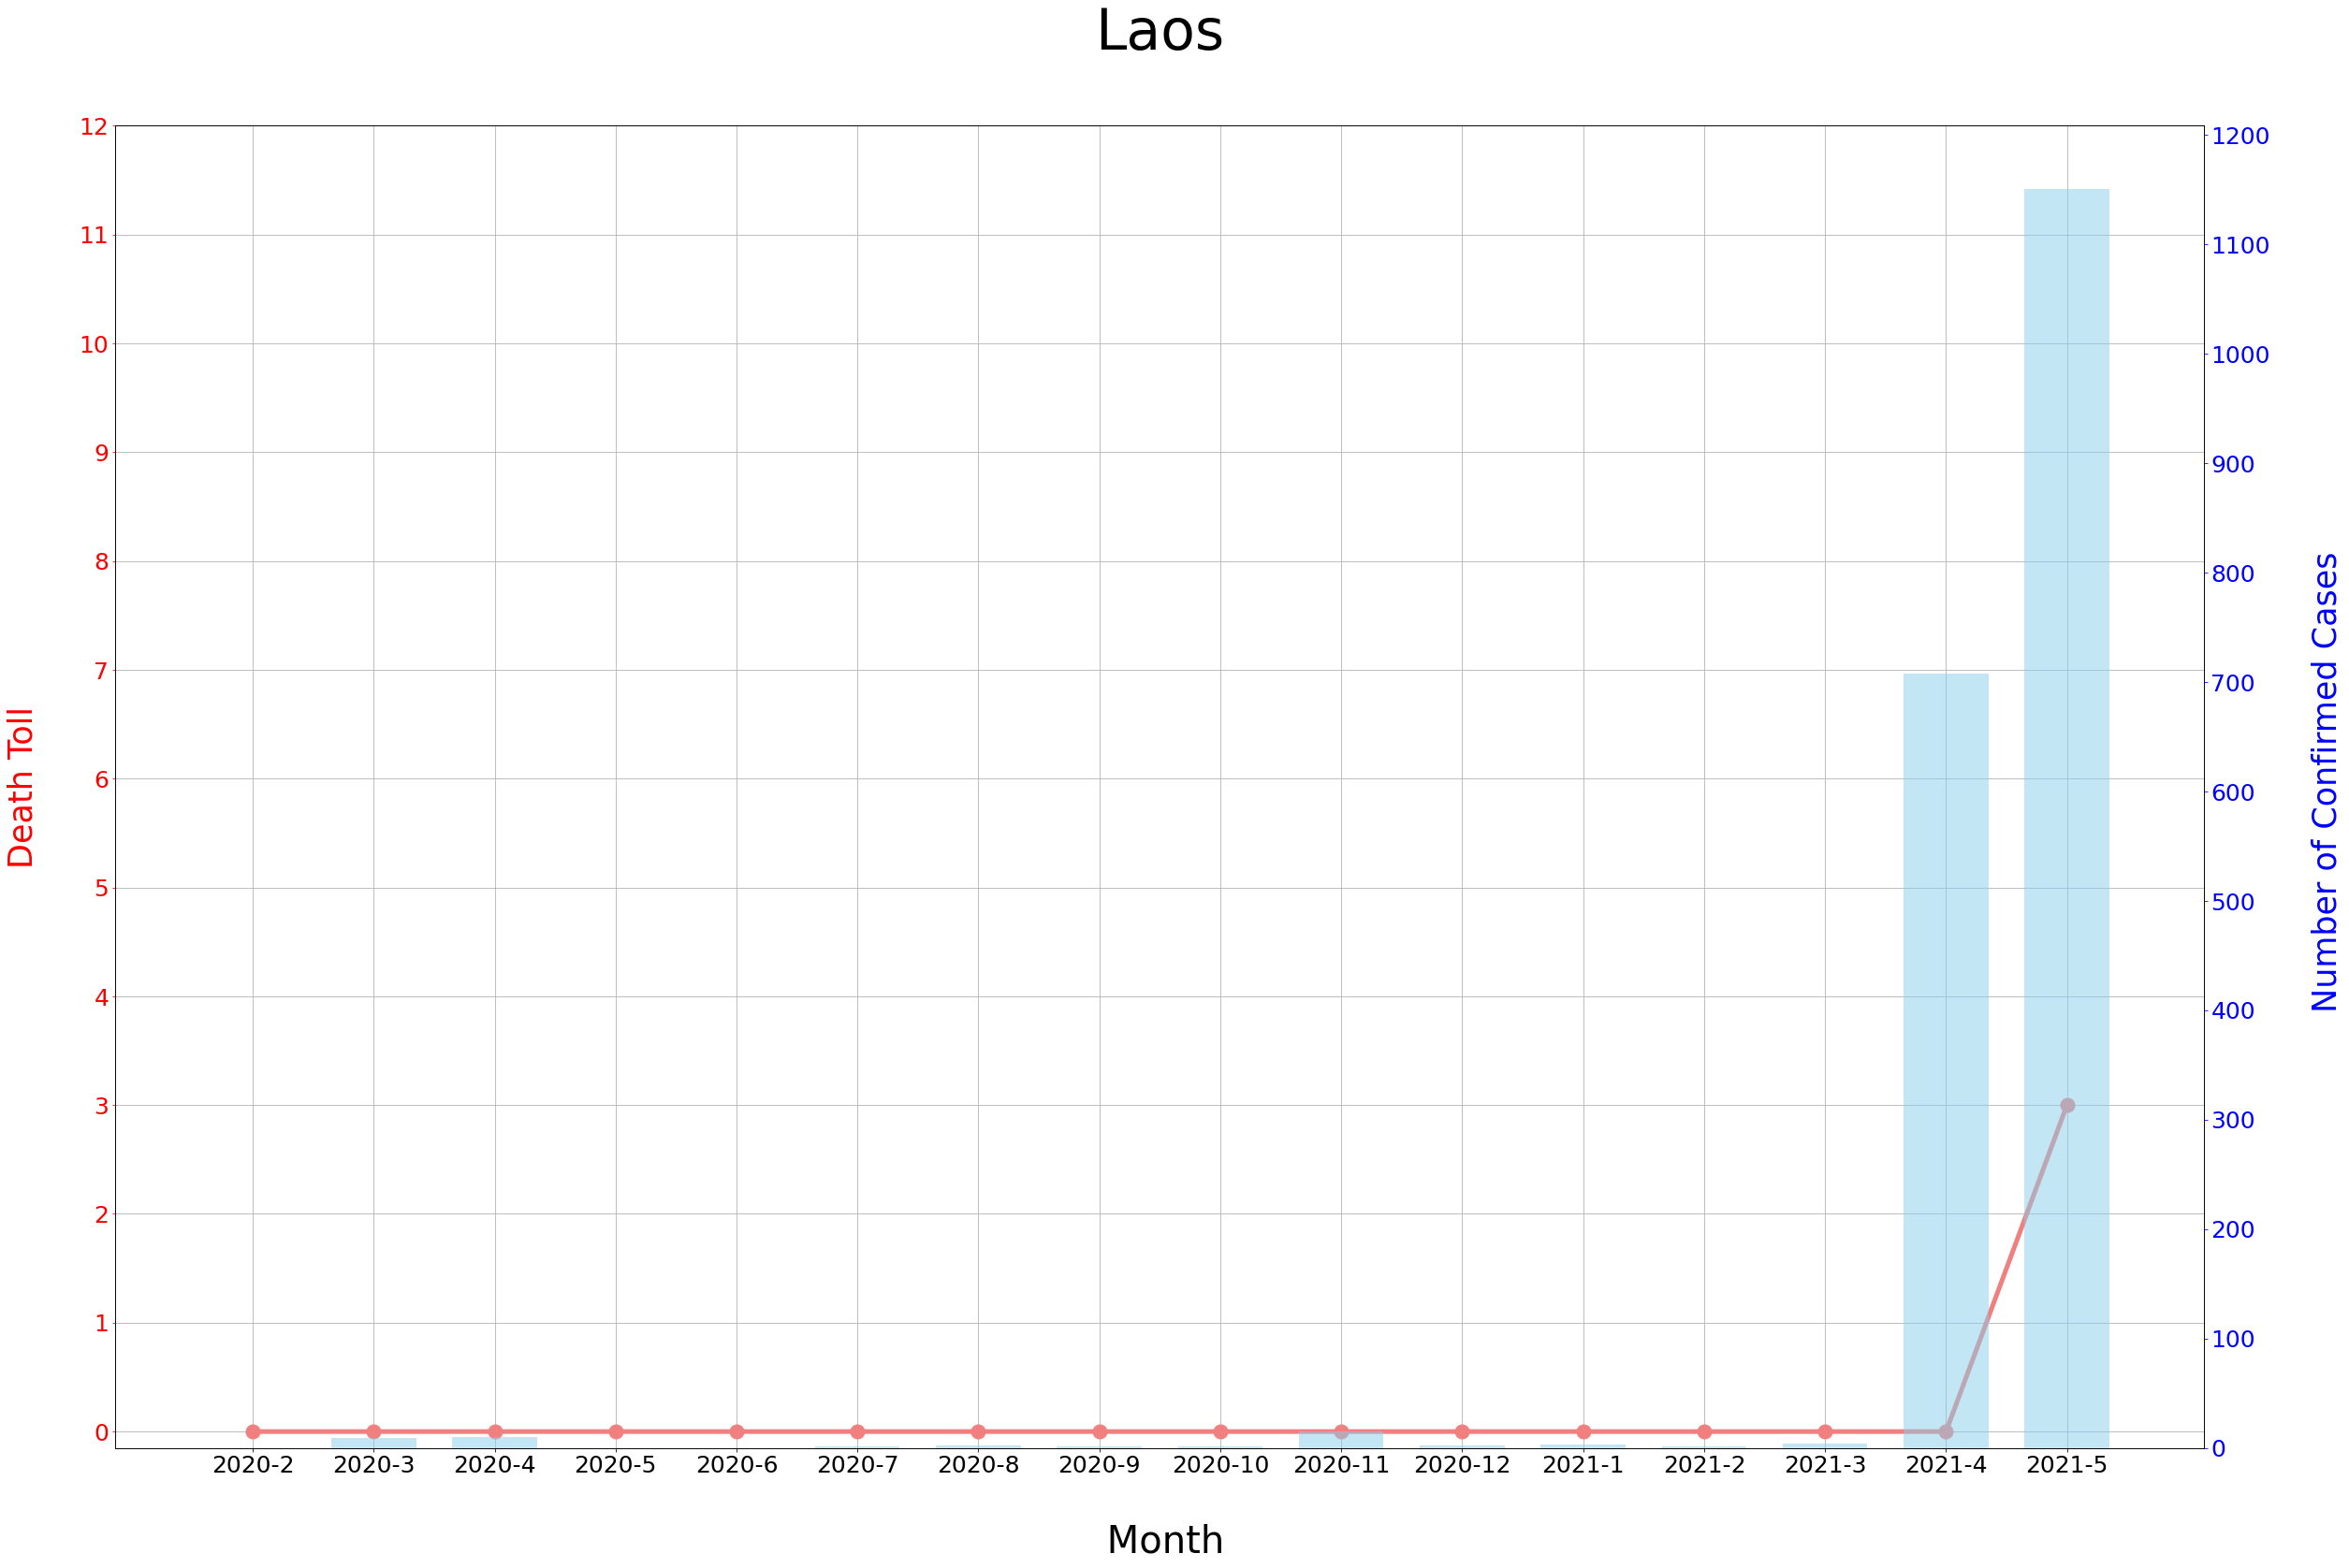

In [14]:
fig, la_ax1 = plt.subplots()

la_ax1.set_xlabel('\n Month',size=40)

la_ax1.plot(str_mounth_list,la_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
la_ax1.set_ylabel('Death Toll\n',color='r',size=35)
la_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()

la_ax2 = la_ax1.twinx()

la_ax2.bar(str_mounth_list,la_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
la_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
la_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,100,200,300,400,500,600,700,800,900,1000,1100,1200])

plt.title("Laos\n",size=60)

plt.show()

### 韓國

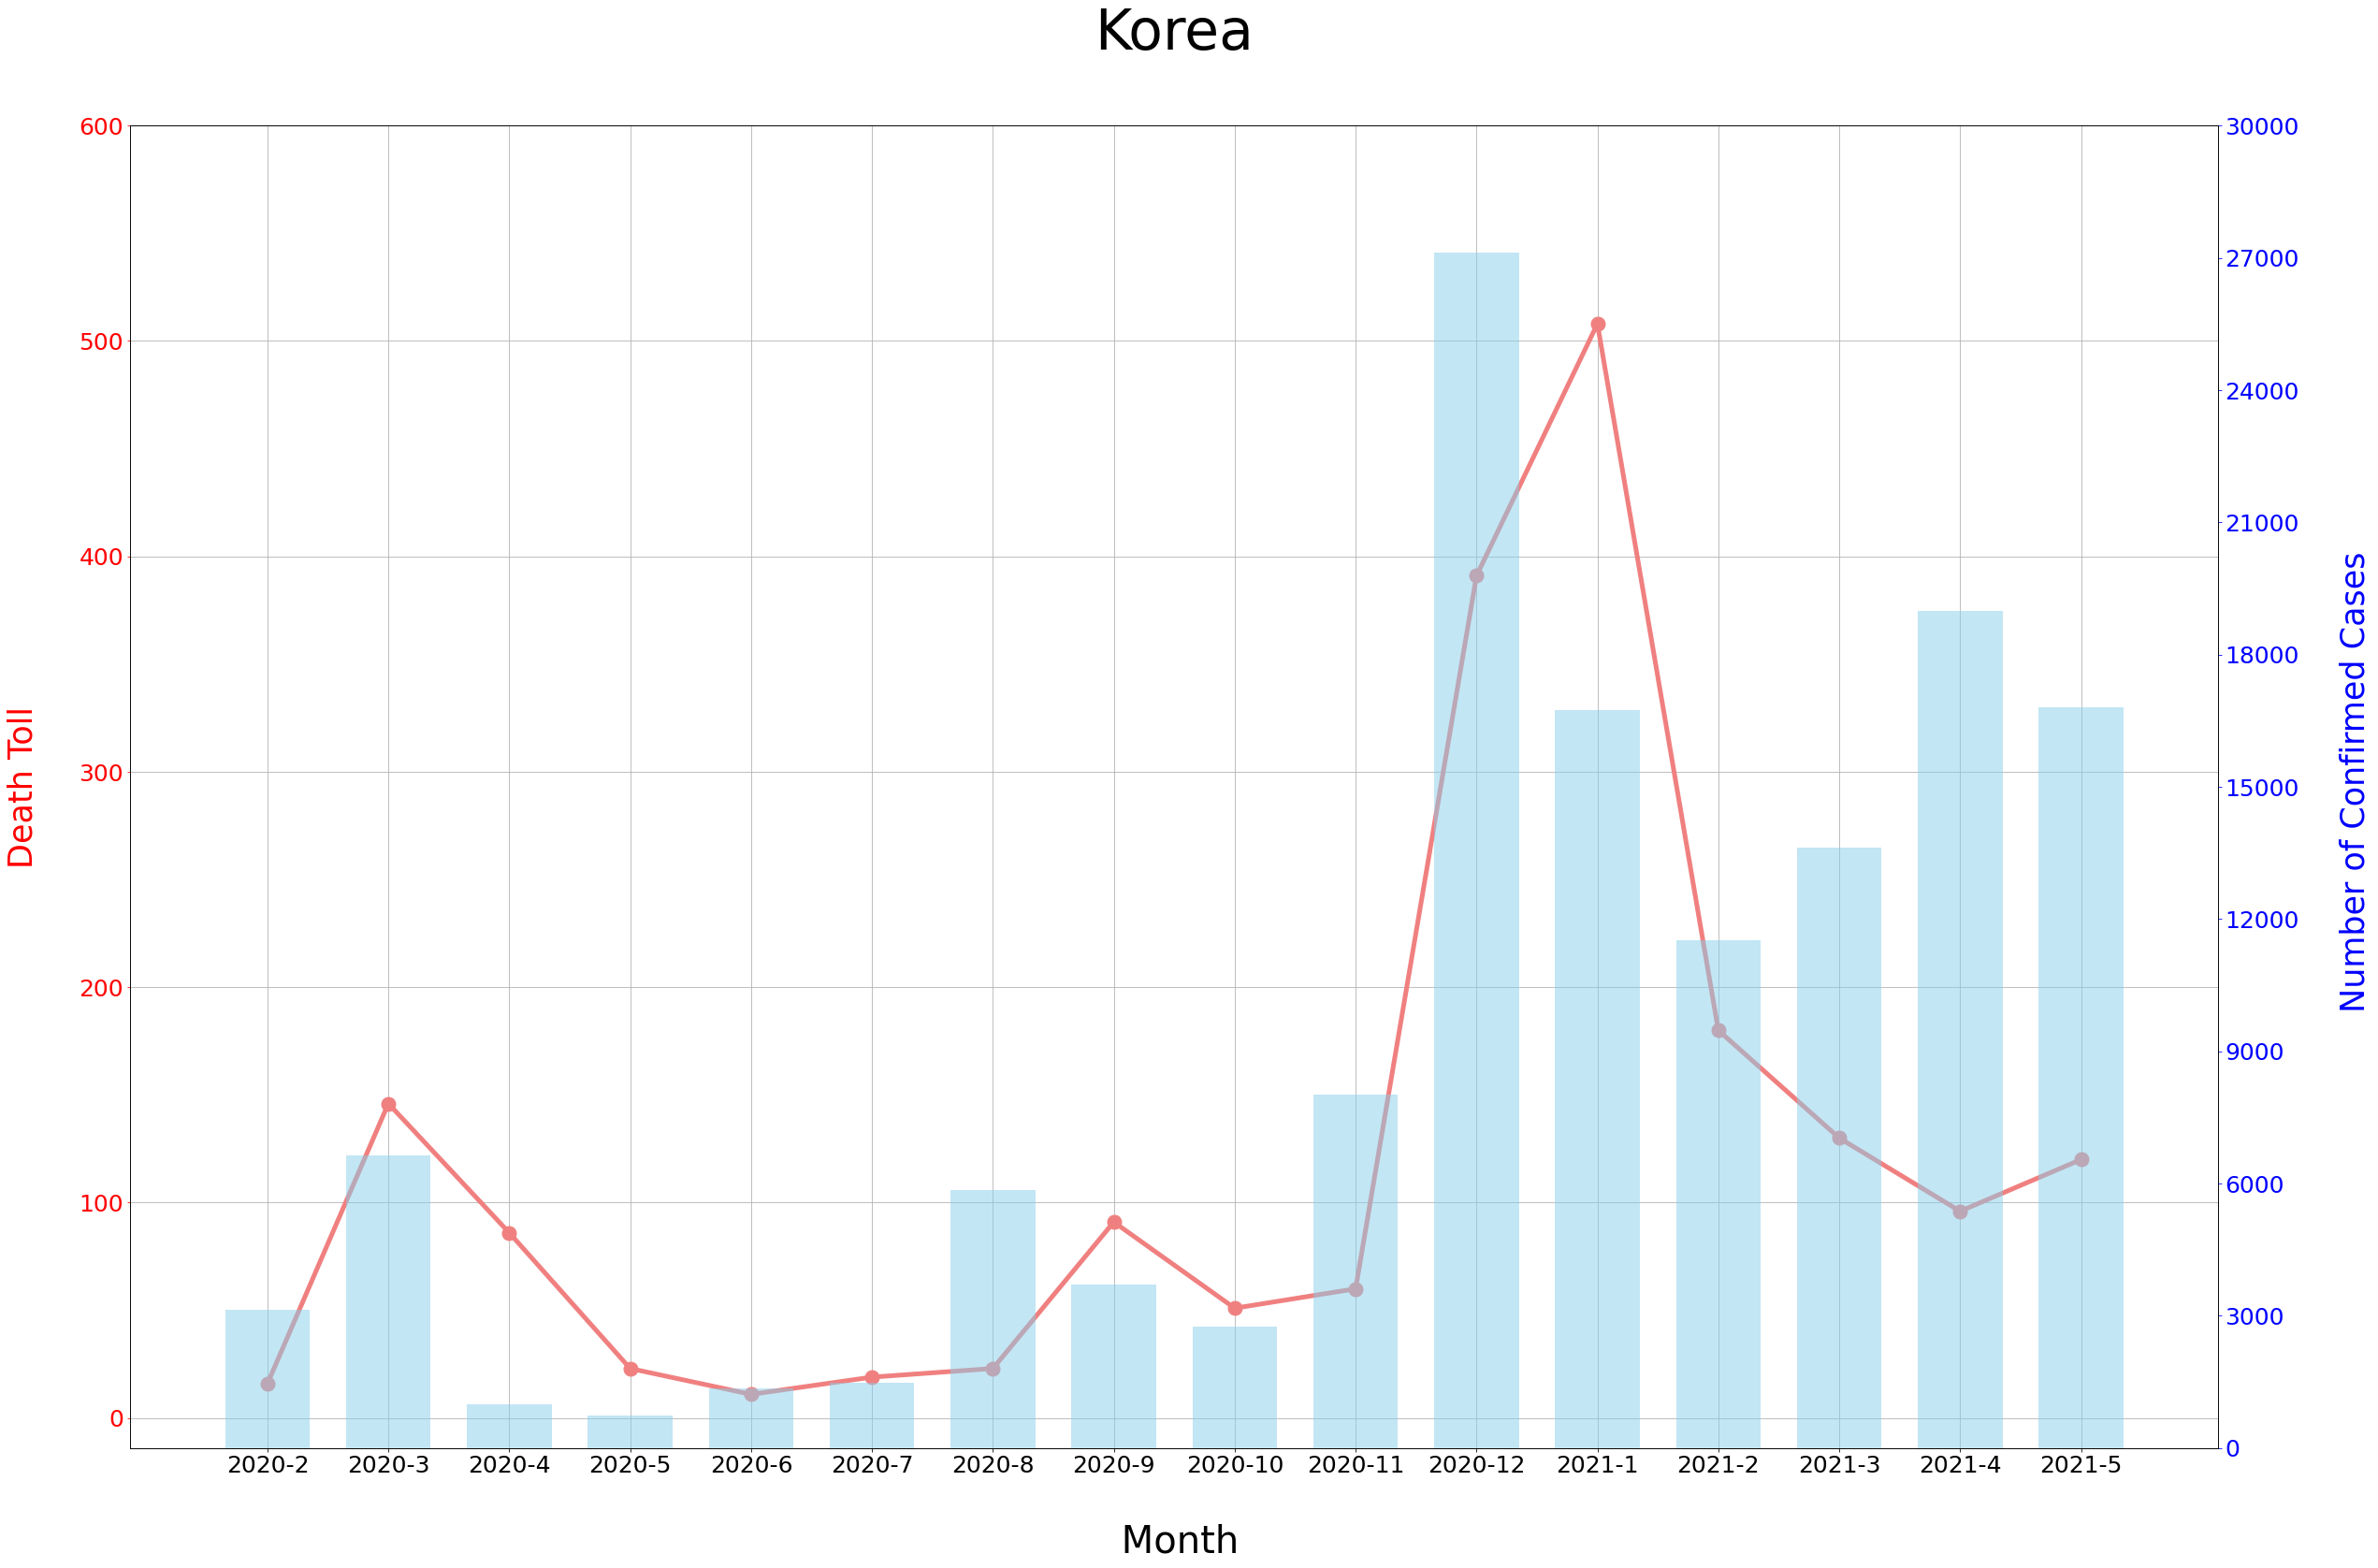

In [15]:
fig, kr_ax1 = plt.subplots()

kr_ax1.set_xlabel('\n Month',size=40)

kr_ax1.plot(str_mounth_list,kr_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
kr_ax1.set_ylabel('Death Toll\n',color='r',size=35)
kr_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,100,200,300,400,500,600])
plt.grid()

kr_ax2 = kr_ax1.twinx()

kr_ax2.bar(str_mounth_list,kr_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
kr_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
kr_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,3000,6000,9000,12000,15000,18000,21000,24000,27000,30000])

plt.title("Korea\n",size=60)

plt.show()

### 柬埔寨

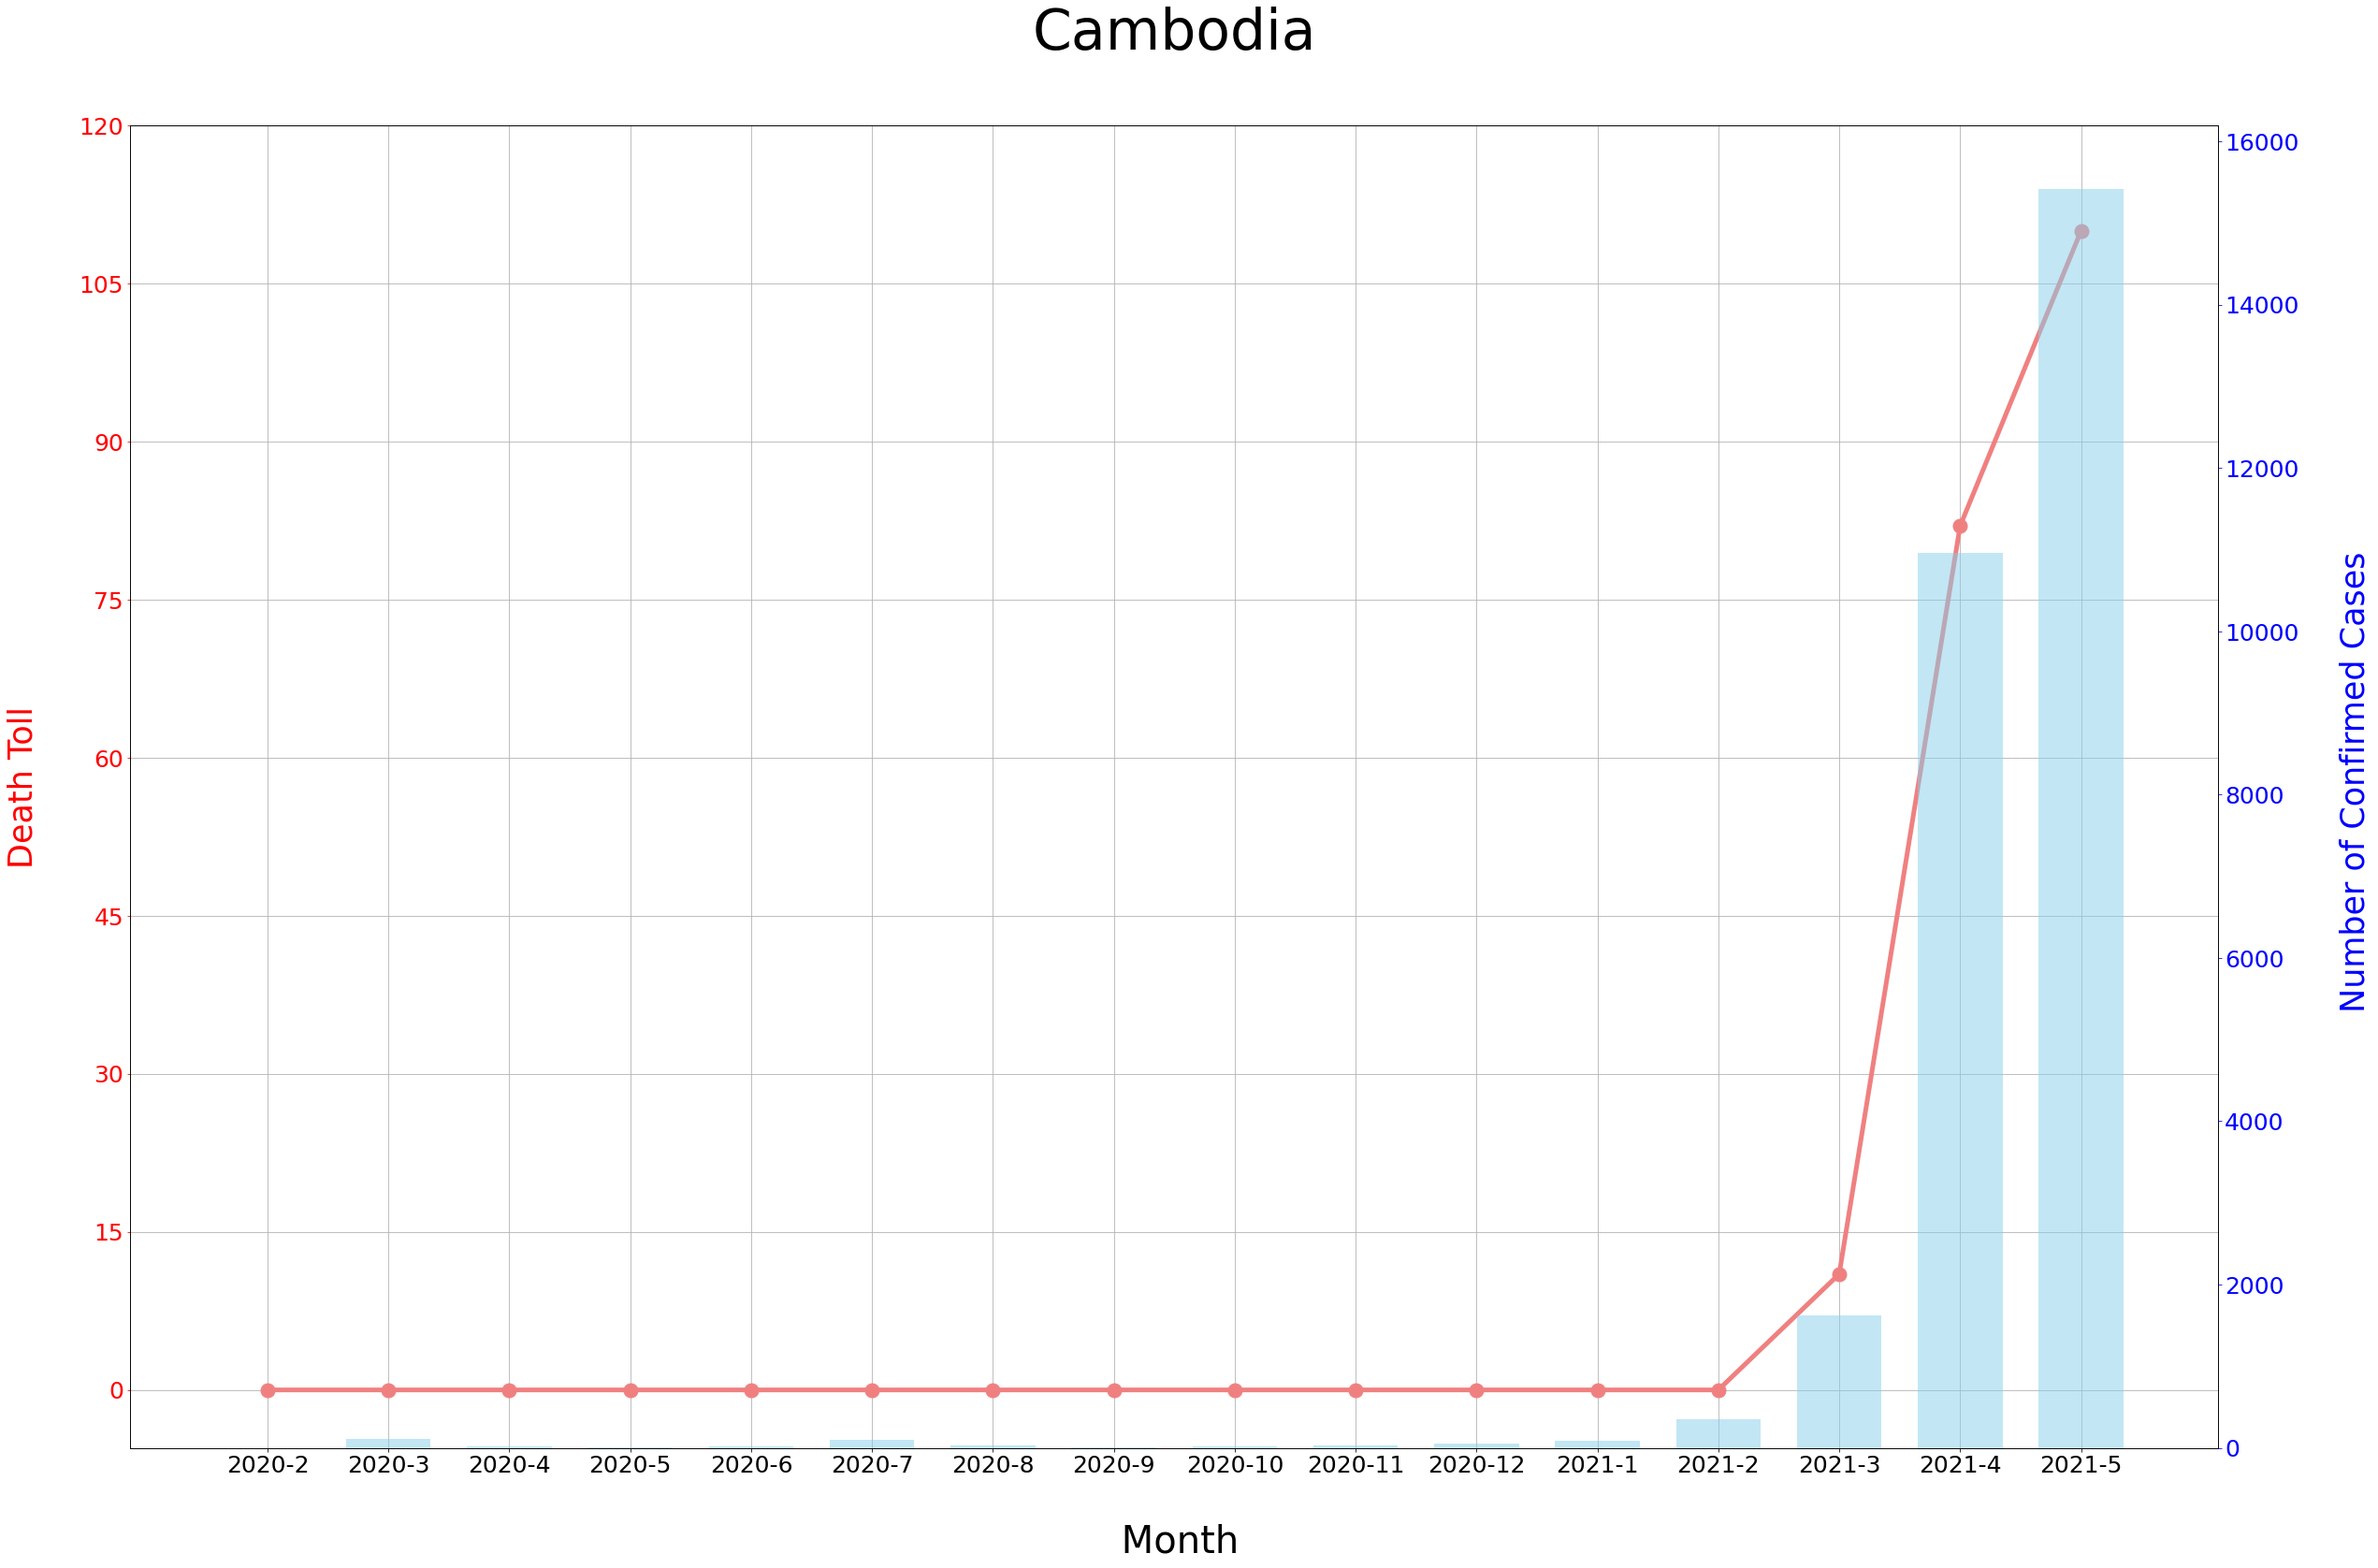

In [16]:
fig, kh_ax1 = plt.subplots()

kh_ax1.set_xlabel('\n Month',size=40)

kh_ax1.plot(str_mounth_list,kh_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
kh_ax1.set_ylabel('Death Toll\n',color='r',size=35)
kh_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,15,30,45,60,75,90,105,120])
plt.grid()

kh_ax2 = kh_ax1.twinx()

kh_ax2.bar(str_mounth_list,kh_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
kh_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
kh_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,2000,4000,
            6000,8000,10000,
            12000,14000,16000])

plt.title("Cambodia\n",size=60)

plt.show()

### 日本

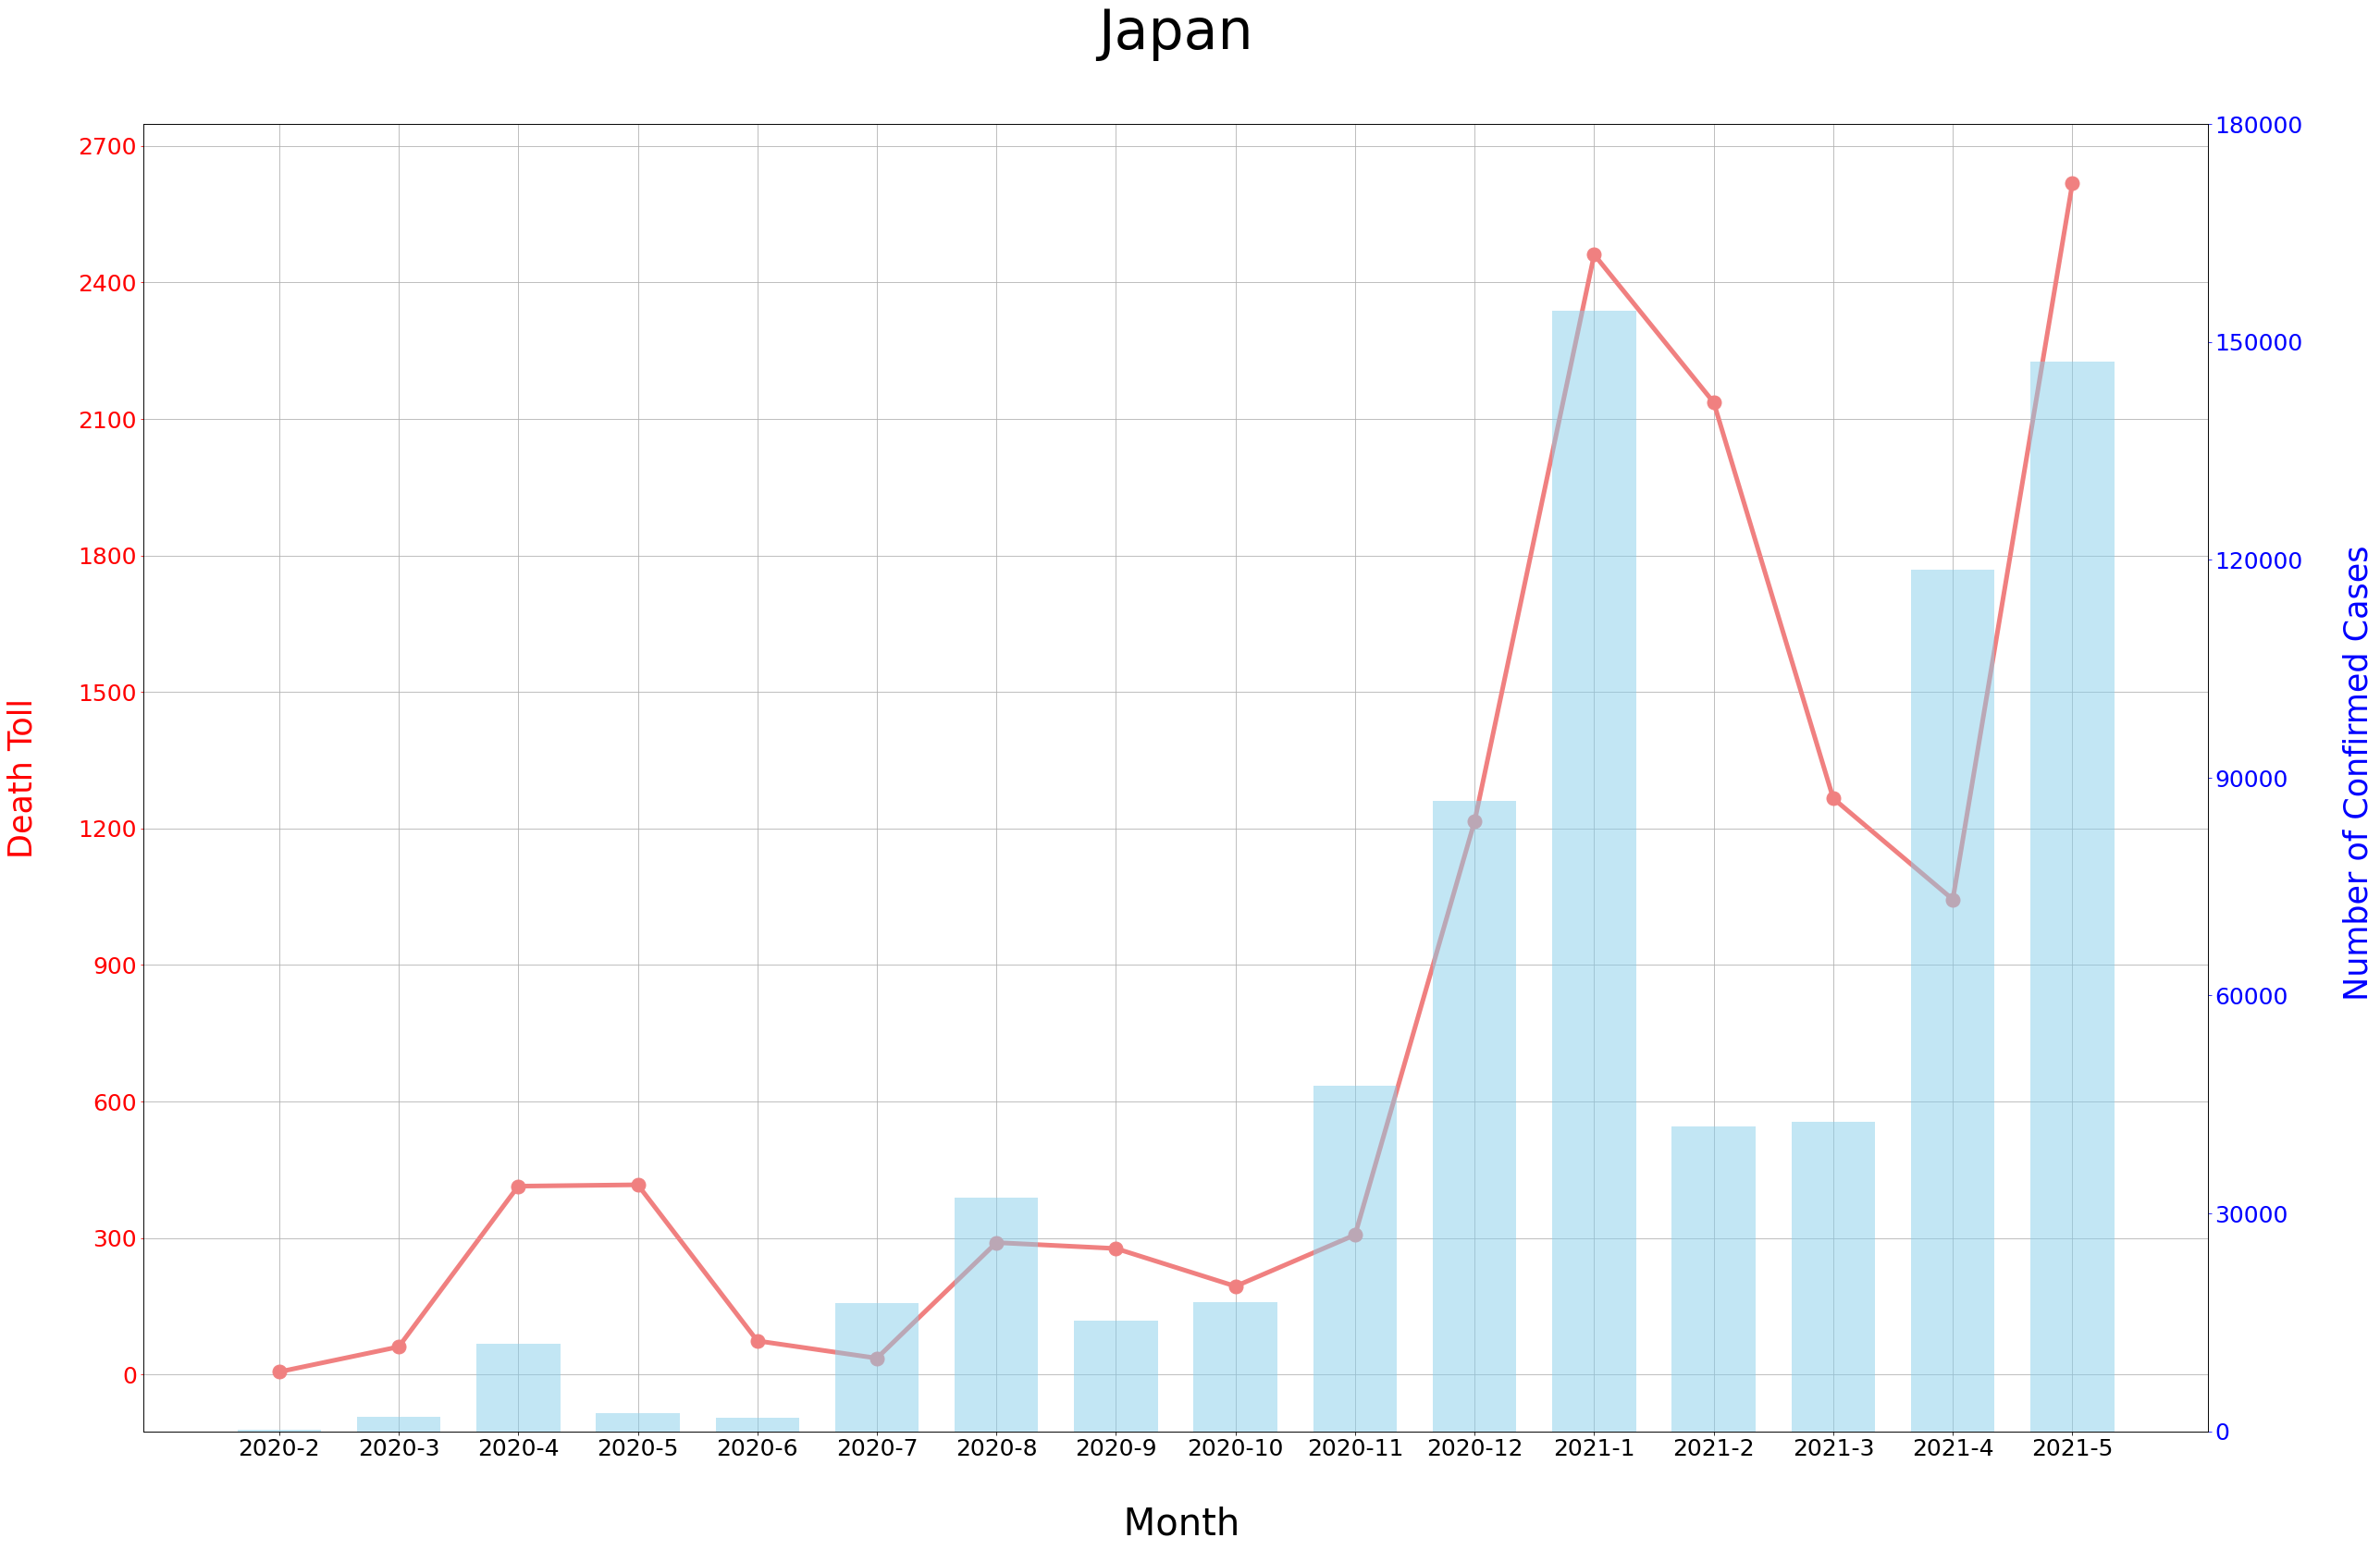

In [17]:
fig, jp_ax1 = plt.subplots()

jp_ax1.set_xlabel('\n Month',size=40)

jp_ax1.plot(str_mounth_list,jp_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
jp_ax1.set_ylabel('Death Toll\n',color='r',size=35)
jp_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,300,600,900,1200,1500,1800,2100,2400,2700])
plt.grid()

jp_ax2 = jp_ax1.twinx()

jp_ax2.bar(str_mounth_list,jp_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
jp_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
jp_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,30000,60000,90000,120000,150000,180000])

plt.title("Japan\n",size=60)

plt.show()

### 印度

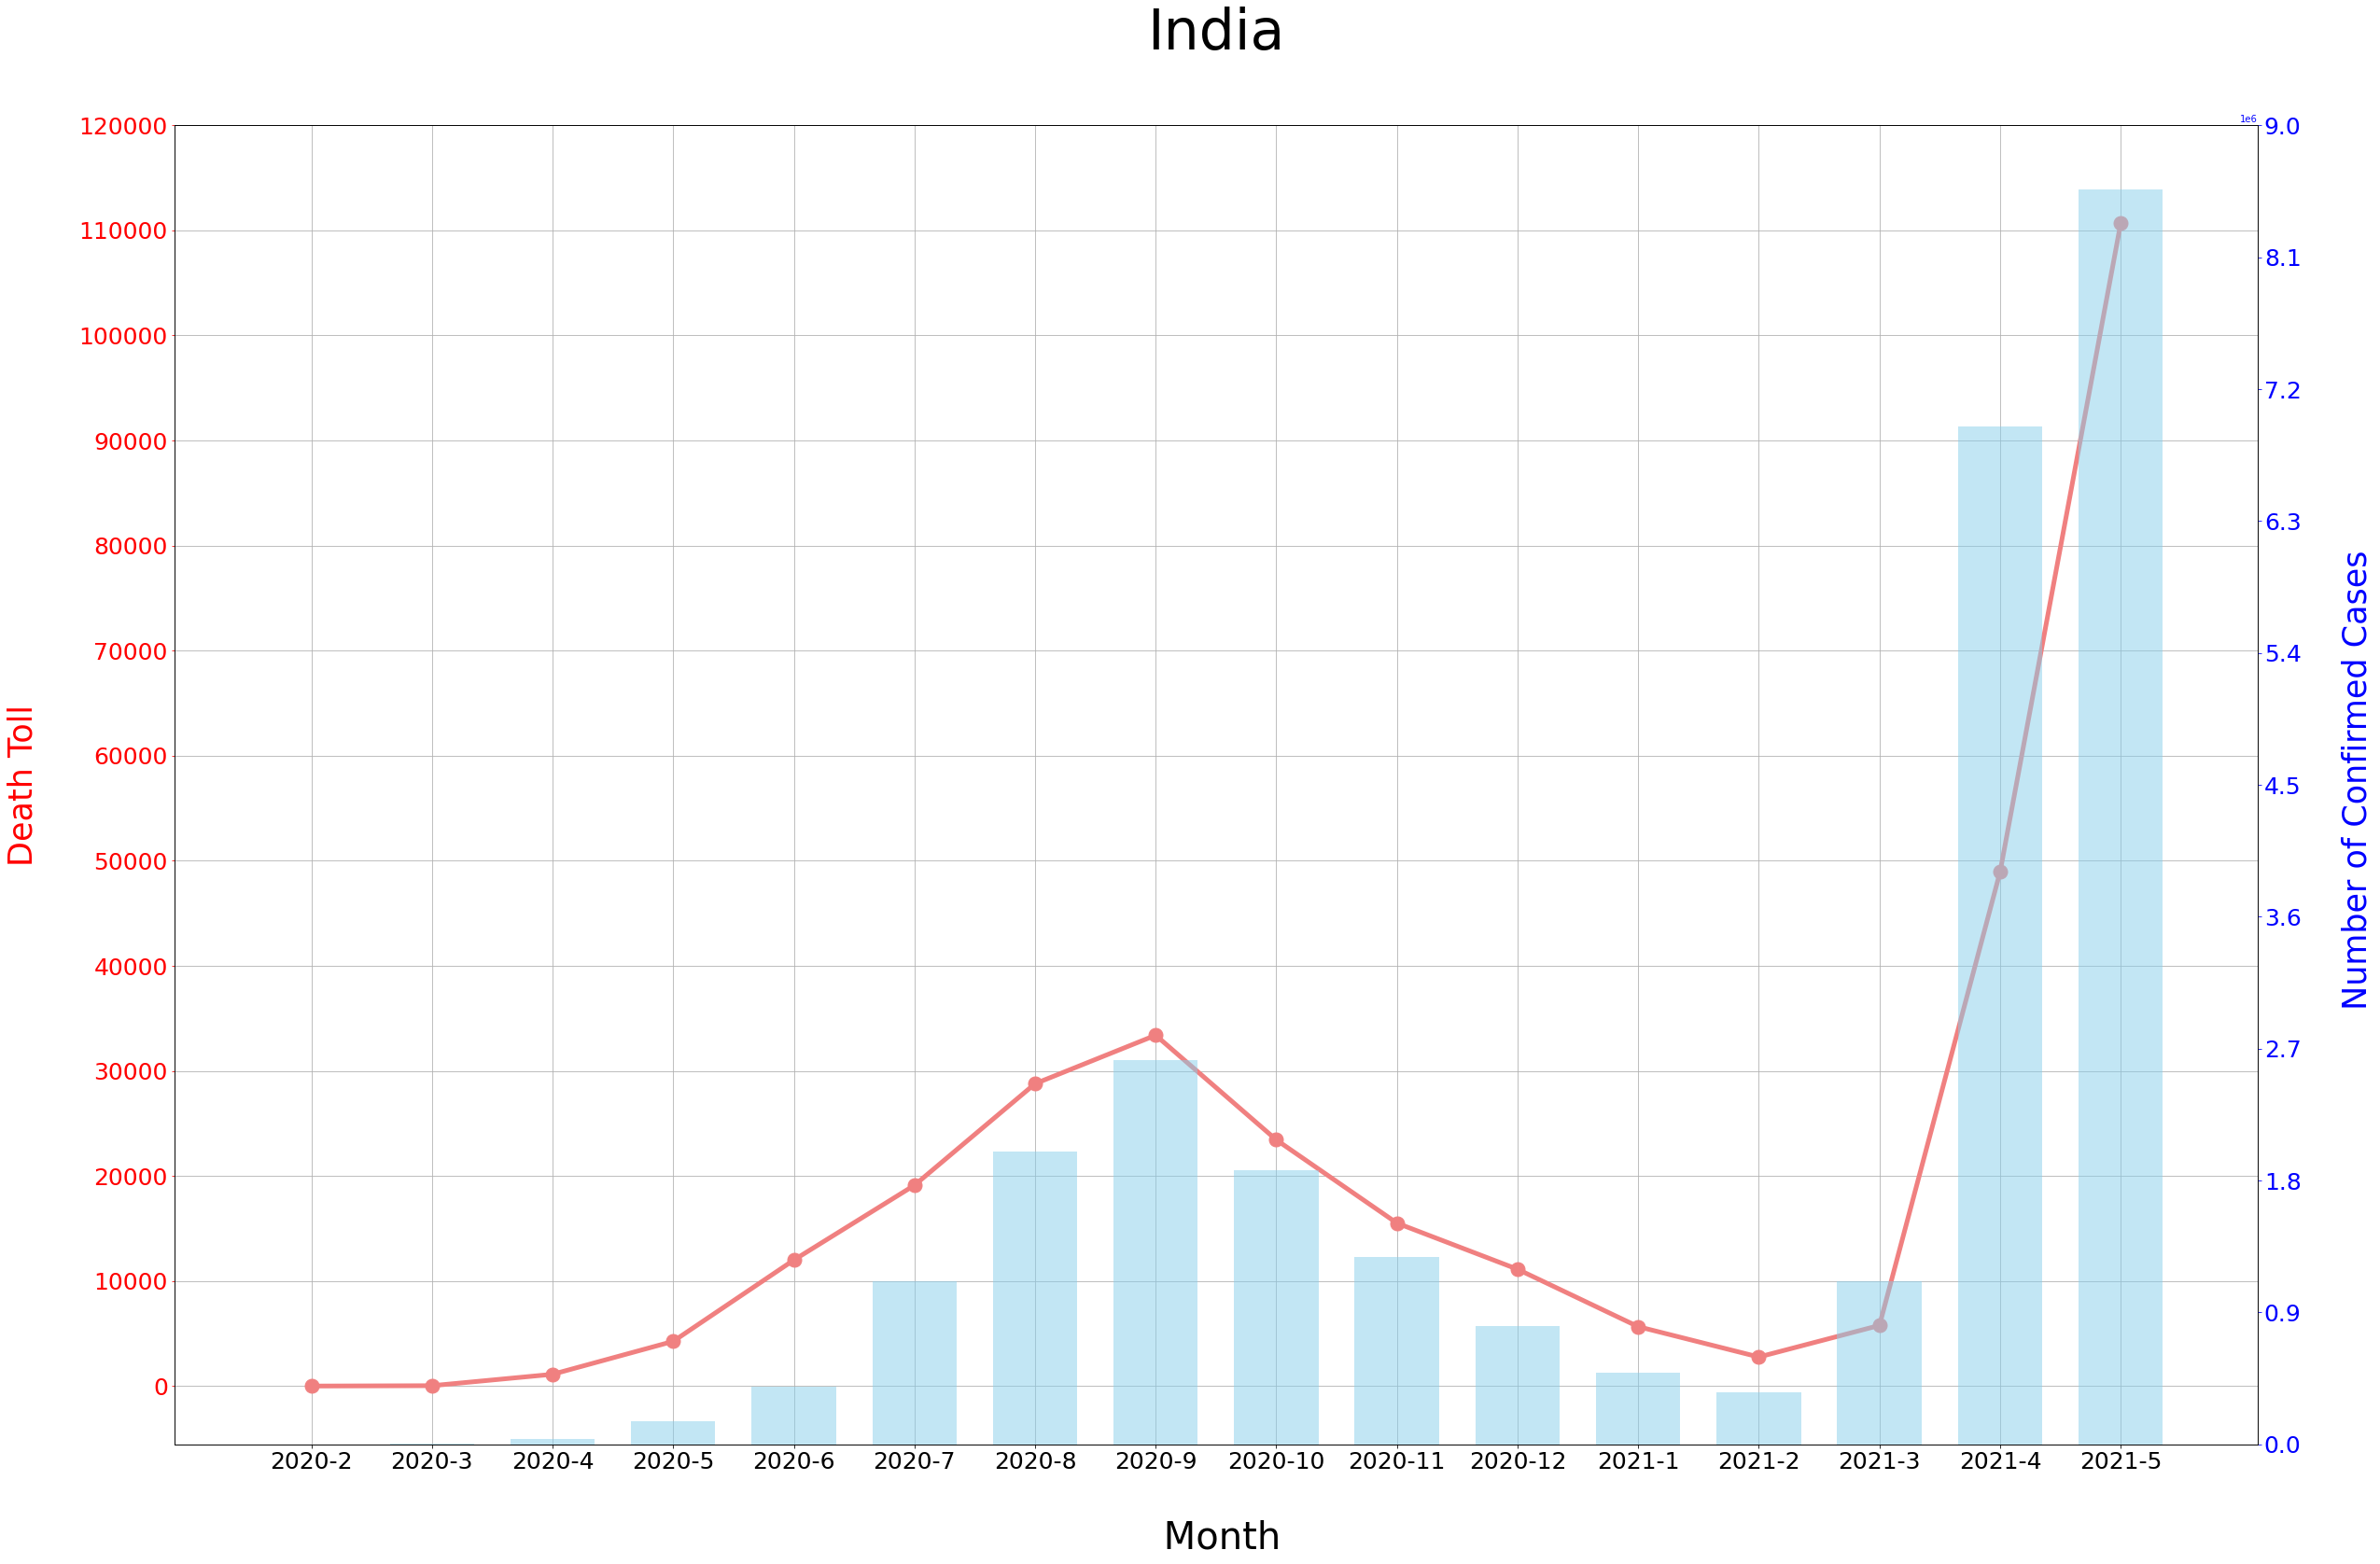

In [18]:
fig, IN_ax1 = plt.subplots()

IN_ax1.set_xlabel('\n Month',size=40)

IN_ax1.plot(str_mounth_list,IN_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
IN_ax1.set_ylabel('Death Toll\n',color='r',size=35)
IN_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (35, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000])
plt.grid()

IN_ax2 = IN_ax1.twinx()

IN_ax2.bar(str_mounth_list,IN_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
IN_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
IN_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (35, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,900000,1800000,2700000,3600000,4500000,5400000,6300000,7200000,8100000,9000000])

plt.title("India\n",size=60)

plt.show()

### 印尼

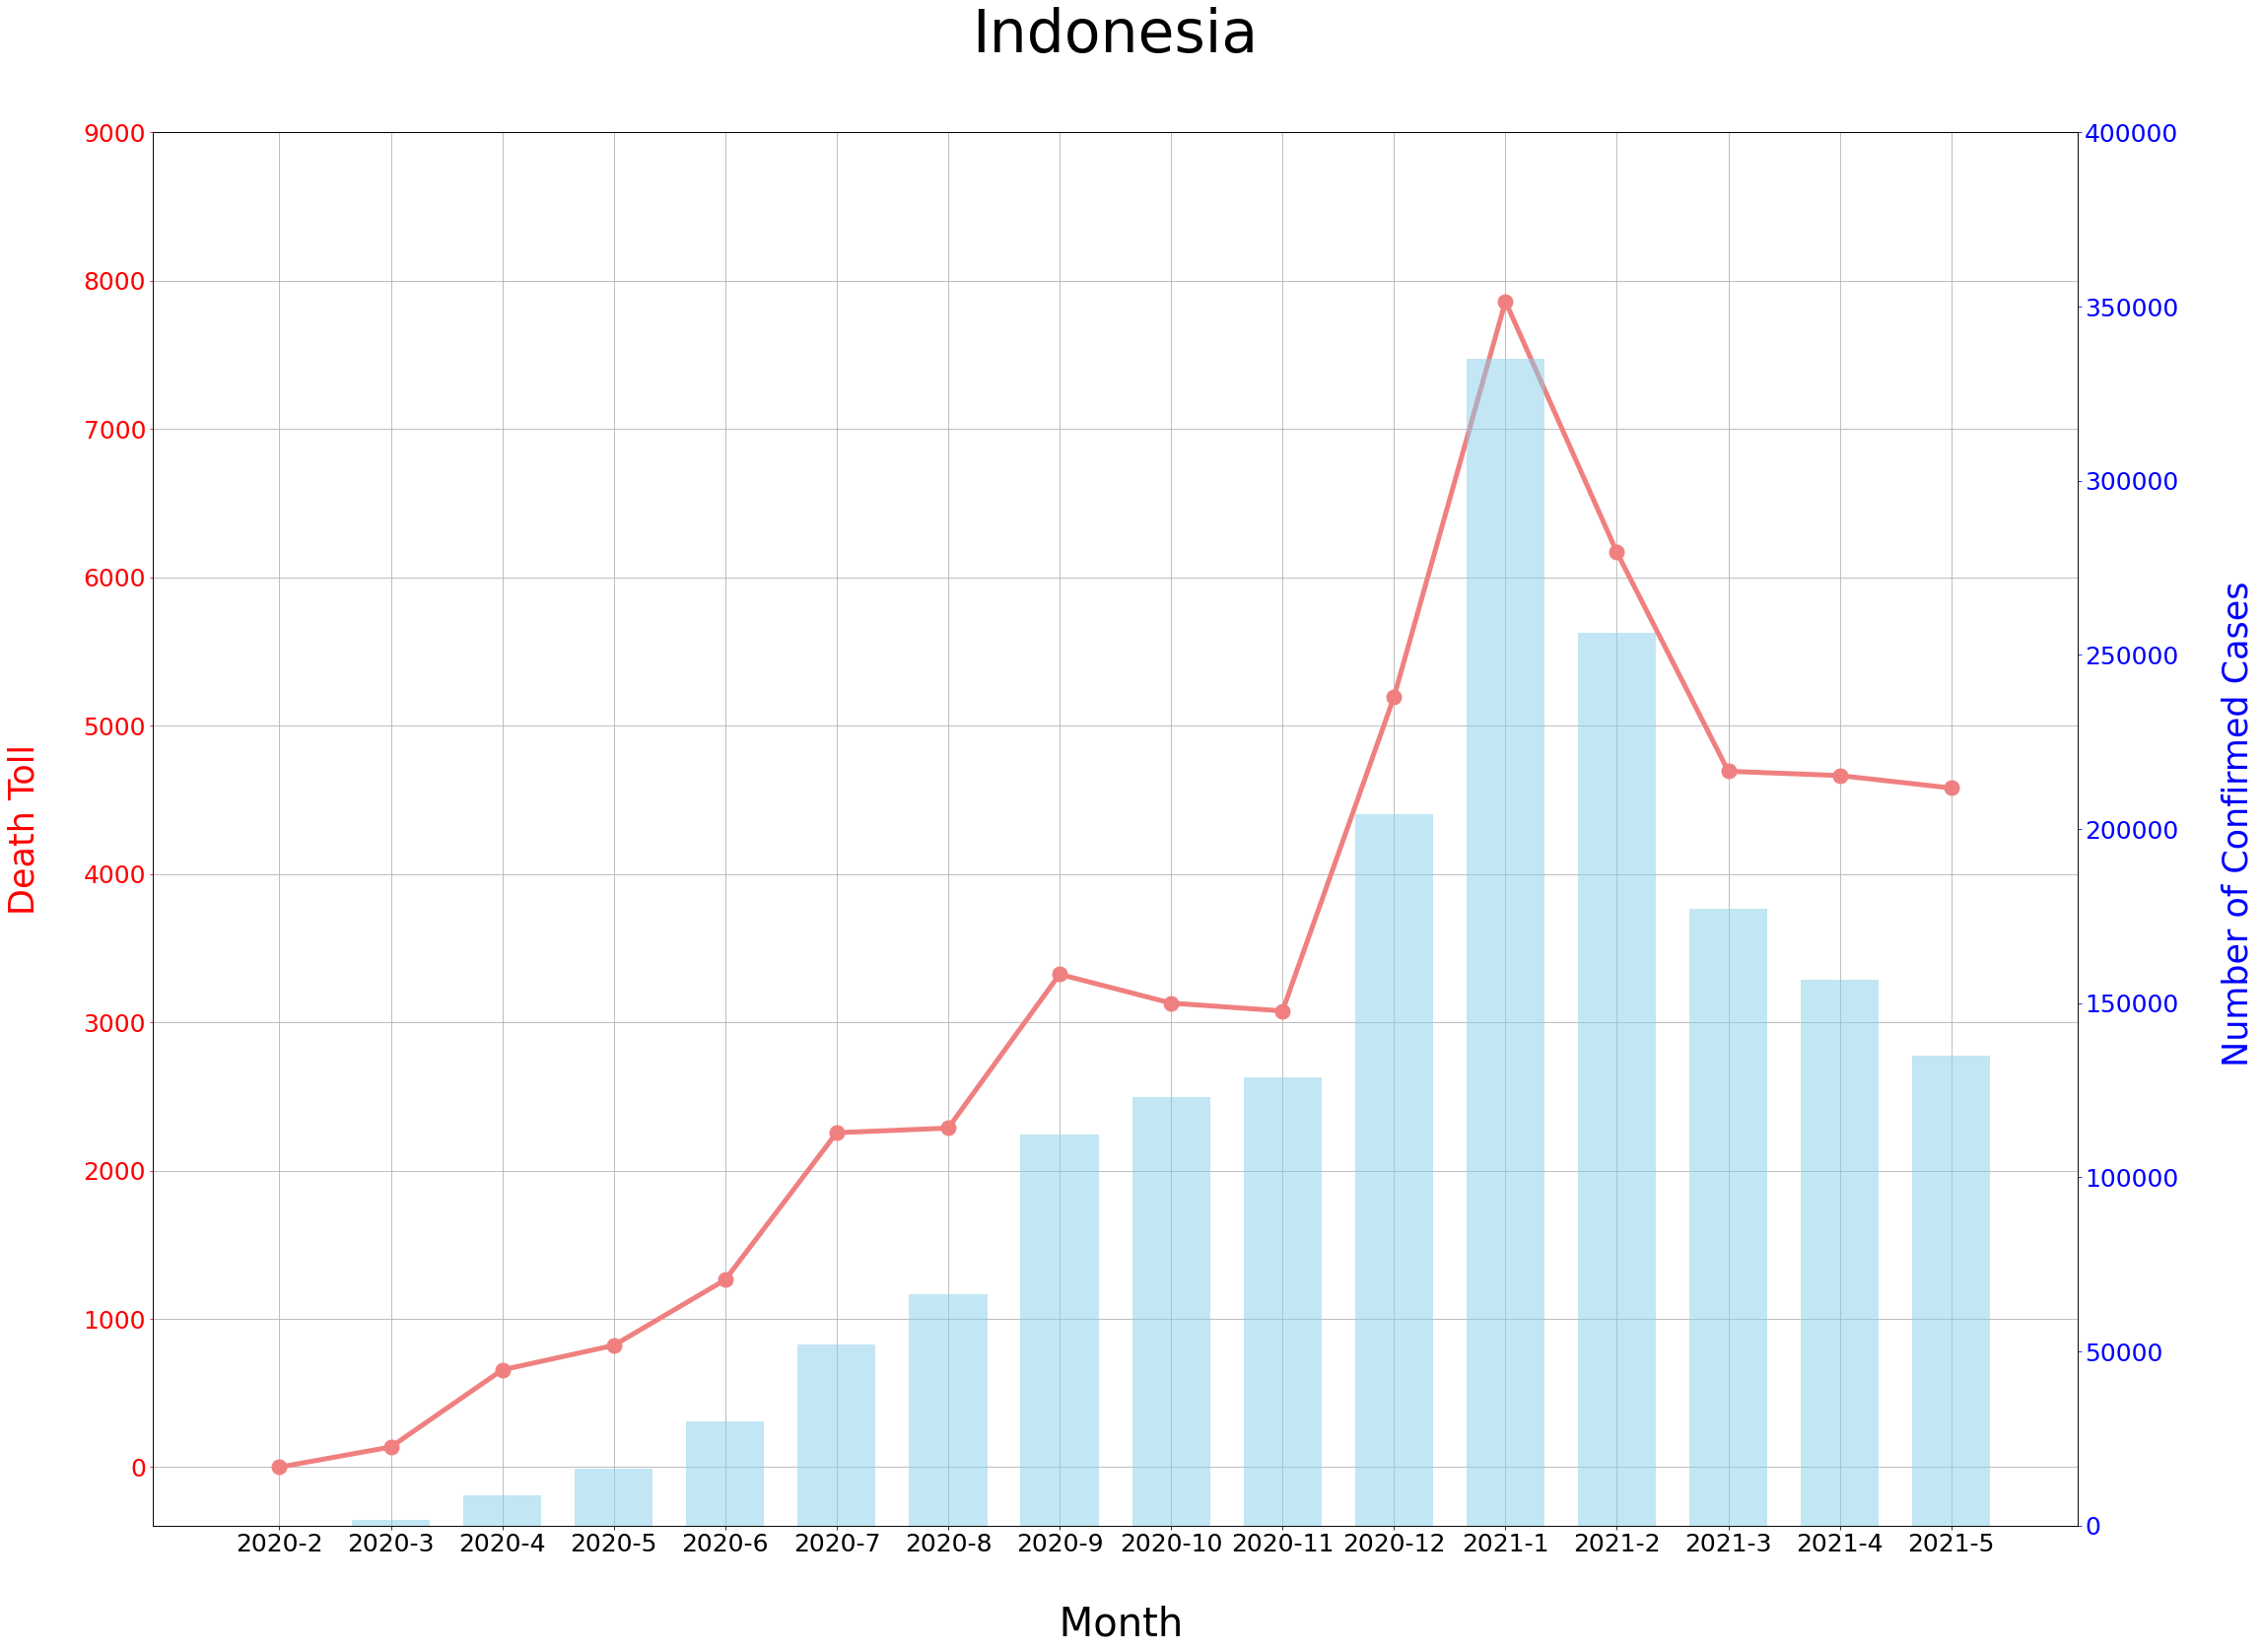

In [19]:
fig, id_ax1 = plt.subplots()

id_ax1.set_xlabel('\n Month',size=40)

id_ax1.plot(str_mounth_list,id_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
id_ax1.set_ylabel('Death Toll\n',color='r',size=35)
id_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000,9000])
plt.grid()

id_ax2 = id_ax1.twinx()

id_ax2.bar(str_mounth_list,id_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
id_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
id_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,50000,100000,150000,200000,250000,300000,350000,400000])

plt.title("Indonesia\n",size=60)

plt.show()

### 中國

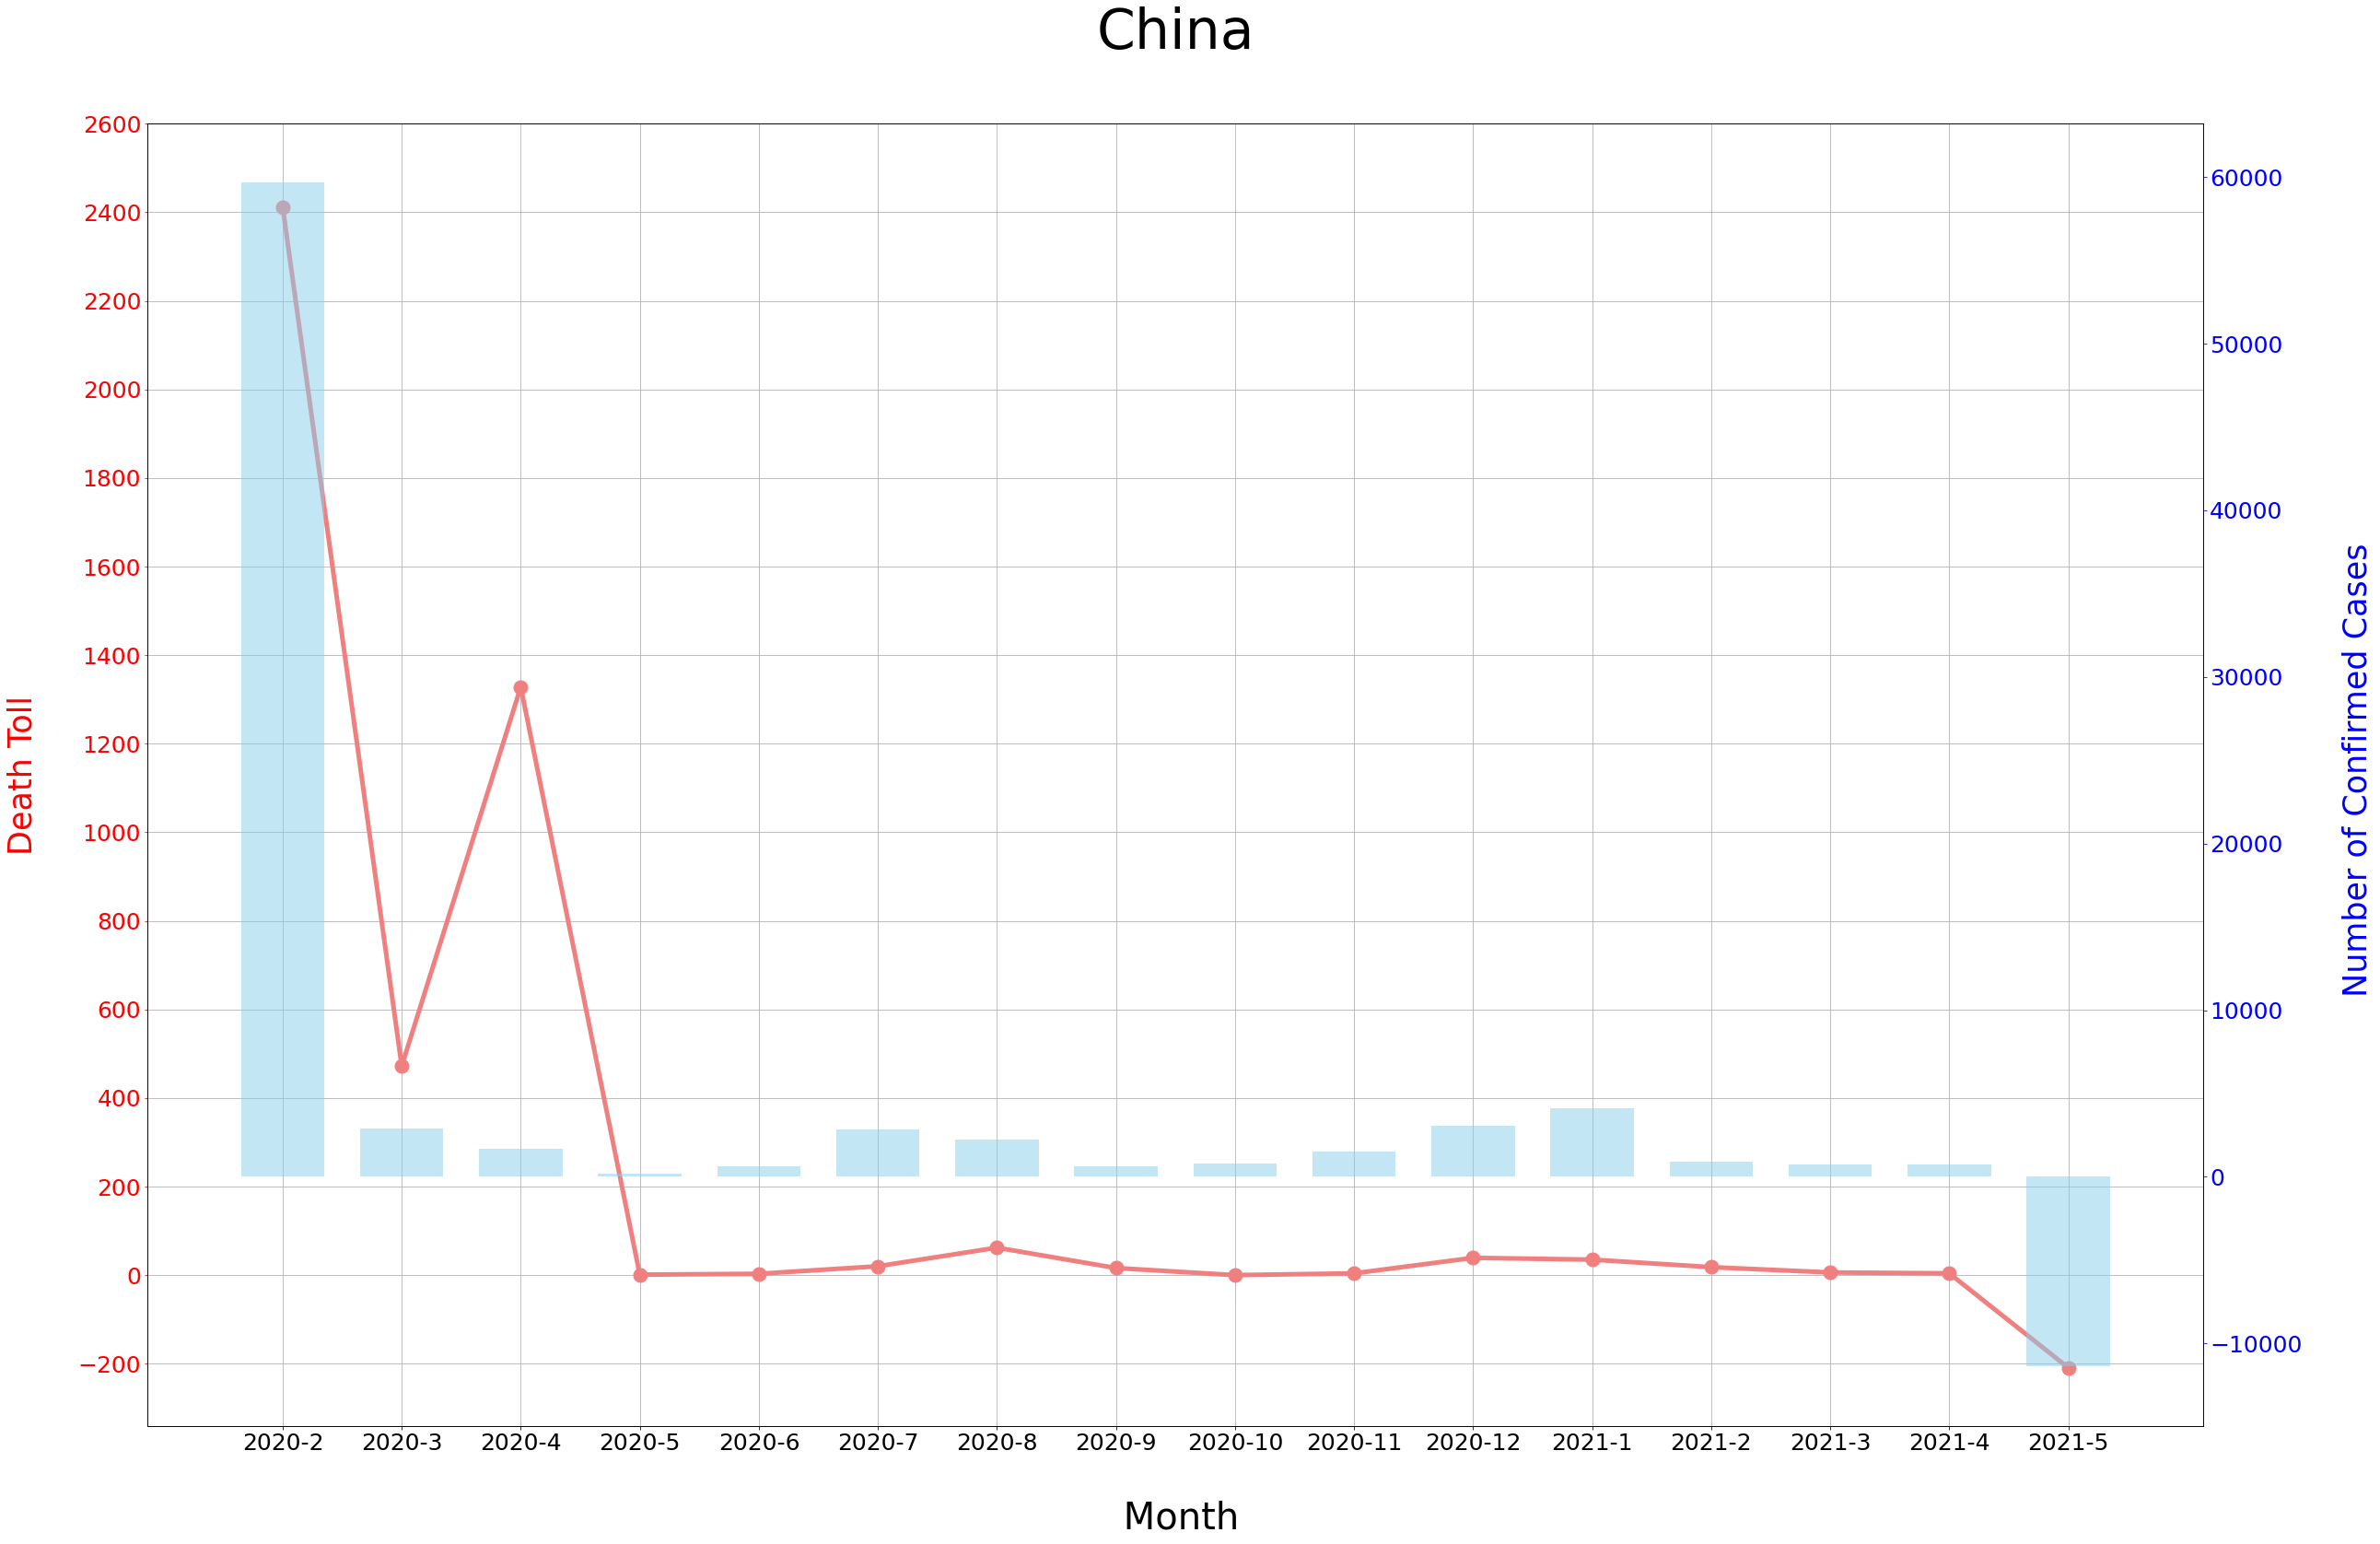

In [20]:
fig, cn_ax1 = plt.subplots()

cn_ax1.set_xlabel('\n Month',size=40)

cn_ax1.plot(str_mounth_list,cn_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
cn_ax1.set_ylabel('Death Toll\n',color='r',size=35)
cn_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([-200,0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600])
plt.grid()

cn_ax2 = cn_ax1.twinx()

cn_ax2.bar(str_mounth_list,cn_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
cn_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
cn_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([-10000,0,10000,20000,30000,40000,50000,60000])

plt.title("China\n",size=60)

plt.show()

### 香港

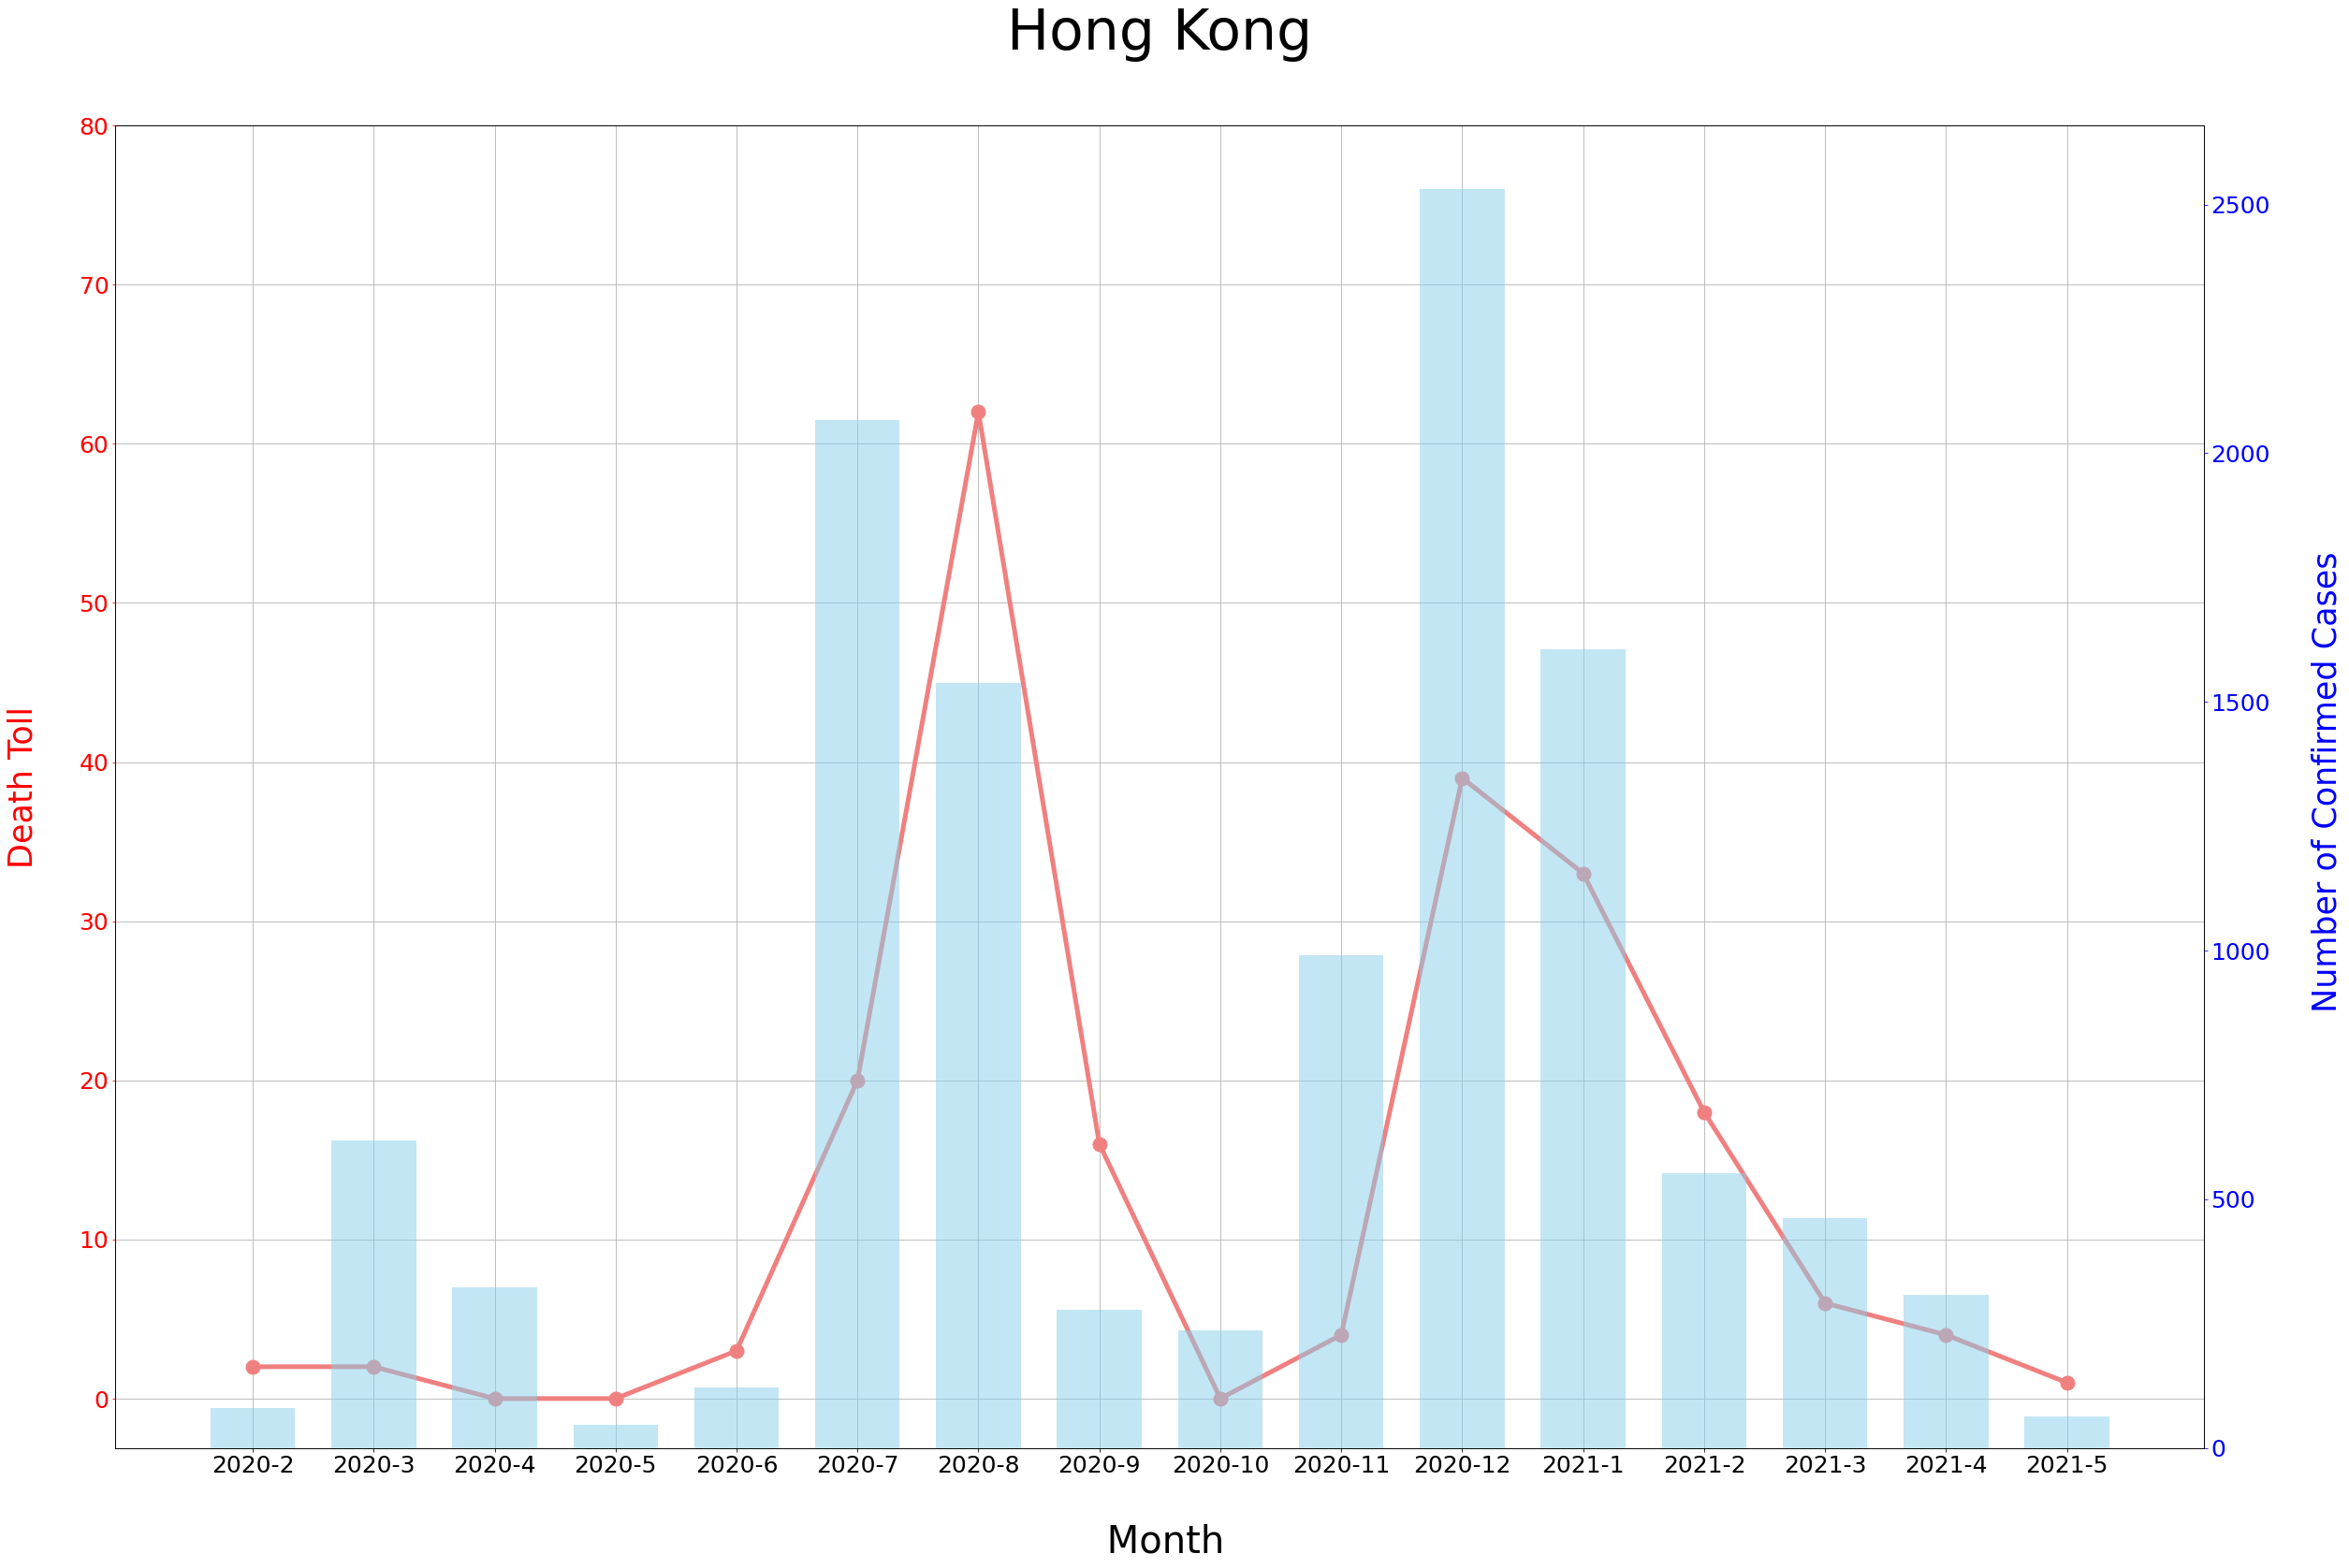

In [21]:
fig, cn_ax1 = plt.subplots()

cn_ax1.set_xlabel('\n Month',size=40)

cn_ax1.plot(str_mounth_list,hk_monthly_dead,marker='o',color='lightcoral',linewidth=5, markersize=15)
cn_ax1.set_ylabel('Death Toll\n',color='r',size=35)
cn_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,10,20,30,40,50,60,70,80])
plt.grid()

cn_ax2 = cn_ax1.twinx()

cn_ax2.bar(str_mounth_list,hk_monthly_conf,color='skyblue',width=0.7,alpha=0.5)
cn_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=35)
cn_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (40, 26)
plt.tick_params(axis='both', labelsize=25)

plt.yticks([0,500,1000,1500,2000,2500])

plt.title("Hong Kong\n",size=60)

plt.show()

### 接著我們將這些國家資料整合成一個資料表，並製作折線圖，方便比較各國之數據

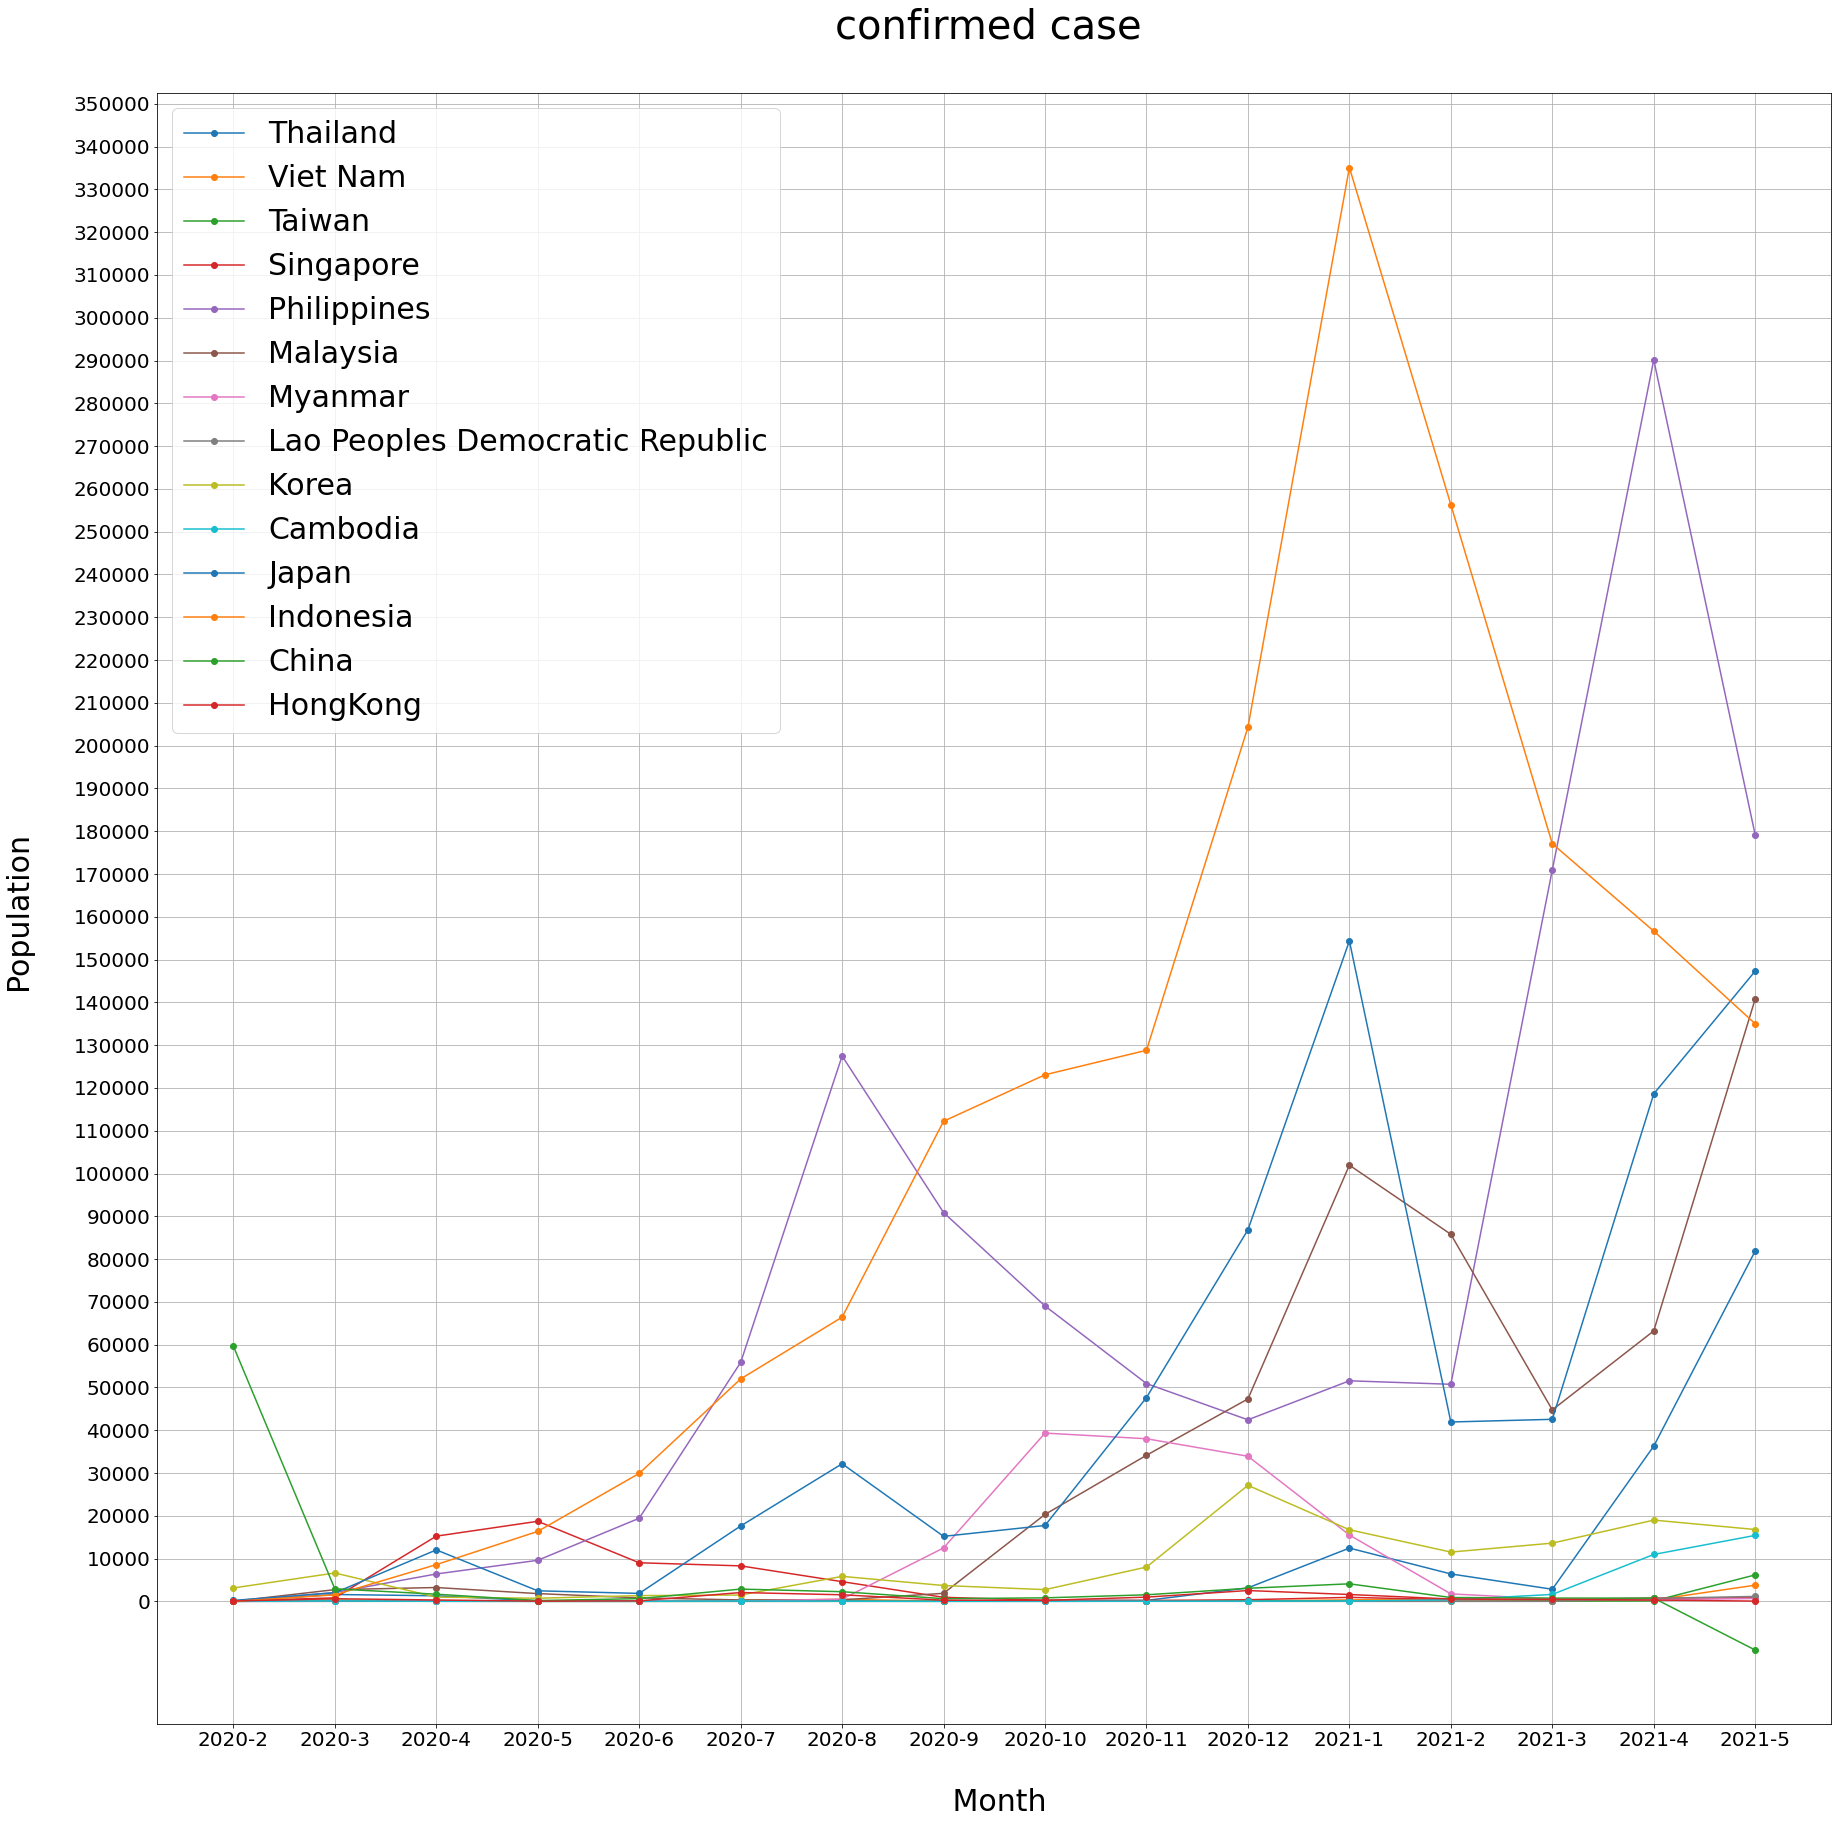

In [22]:
x = str_mounth_list

y_th = th_monthly_conf
y_vn = vn_monthly_conf
y_tw = tw_monthly_conf
y_sg = sg_monthly_conf
y_ph = ph_monthly_conf
y_my = my_monthly_conf
y_mm = mm_monthly_conf
y_la = la_monthly_conf
y_kr = kr_monthly_conf
y_kh = kh_monthly_conf
y_jp = jp_monthly_conf
y_IN = IN_monthly_conf
y_id = id_monthly_conf
y_cn = cn_monthly_conf
y_hk = hk_monthly_conf

plt.rcParams["figure.figsize"] = (30, 30)
plt.tick_params(axis='both', labelsize=20)

Data_th, = plt.plot(x,y_th,marker='o',label='Thailand')
Data_vn, = plt.plot(x,y_vn,marker='o',label='Viet Nam')
Data_tw, = plt.plot(x,y_tw,marker='o',label='Taiwan')
Data_sg, = plt.plot(x,y_sg,marker='o',label='Singapore')
Data_ph, = plt.plot(x,y_ph,marker='o',label='Philippines')
Data_my, = plt.plot(x,y_my,marker='o',label='Malaysia')
Data_mm, = plt.plot(x,y_mm,marker='o',label='Myanmar')
Data_la, = plt.plot(x,y_la,marker='o',label='Lao Peoples Democratic Republic')
Data_kr, = plt.plot(x,y_kr,marker='o',label='Korea')
Data_kh, = plt.plot(x,y_kh,marker='o',label='Cambodia')
Data_jp, = plt.plot(x,y_jp,marker='o',label='Japan')
#Data_IN, = plt.plot(x,y_IN,label='India')
Data_id, = plt.plot(x,y_id,marker='o',label='Indonesia')
Data_cn, = plt.plot(x,y_cn,marker='o',label='China')
Data_hk, = plt.plot(x,y_hk,marker='o',label='HongKong')

plt.legend(handles=[Data_th, Data_vn, Data_tw, Data_sg, Data_ph, Data_my, Data_mm, Data_la, Data_kr, Data_kh, Data_jp,Data_id,Data_cn,Data_hk],fontsize=30)
plt.title('confirmed case \n',size=40)
plt.xlabel('\n Month',size=30)
plt.ylabel('Population \n',size=30)

plt.yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
           ,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000
           ,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000
           ,310000,320000,330000,340000,350000])
plt.grid()
plt.show() #顯示繪製的圖形

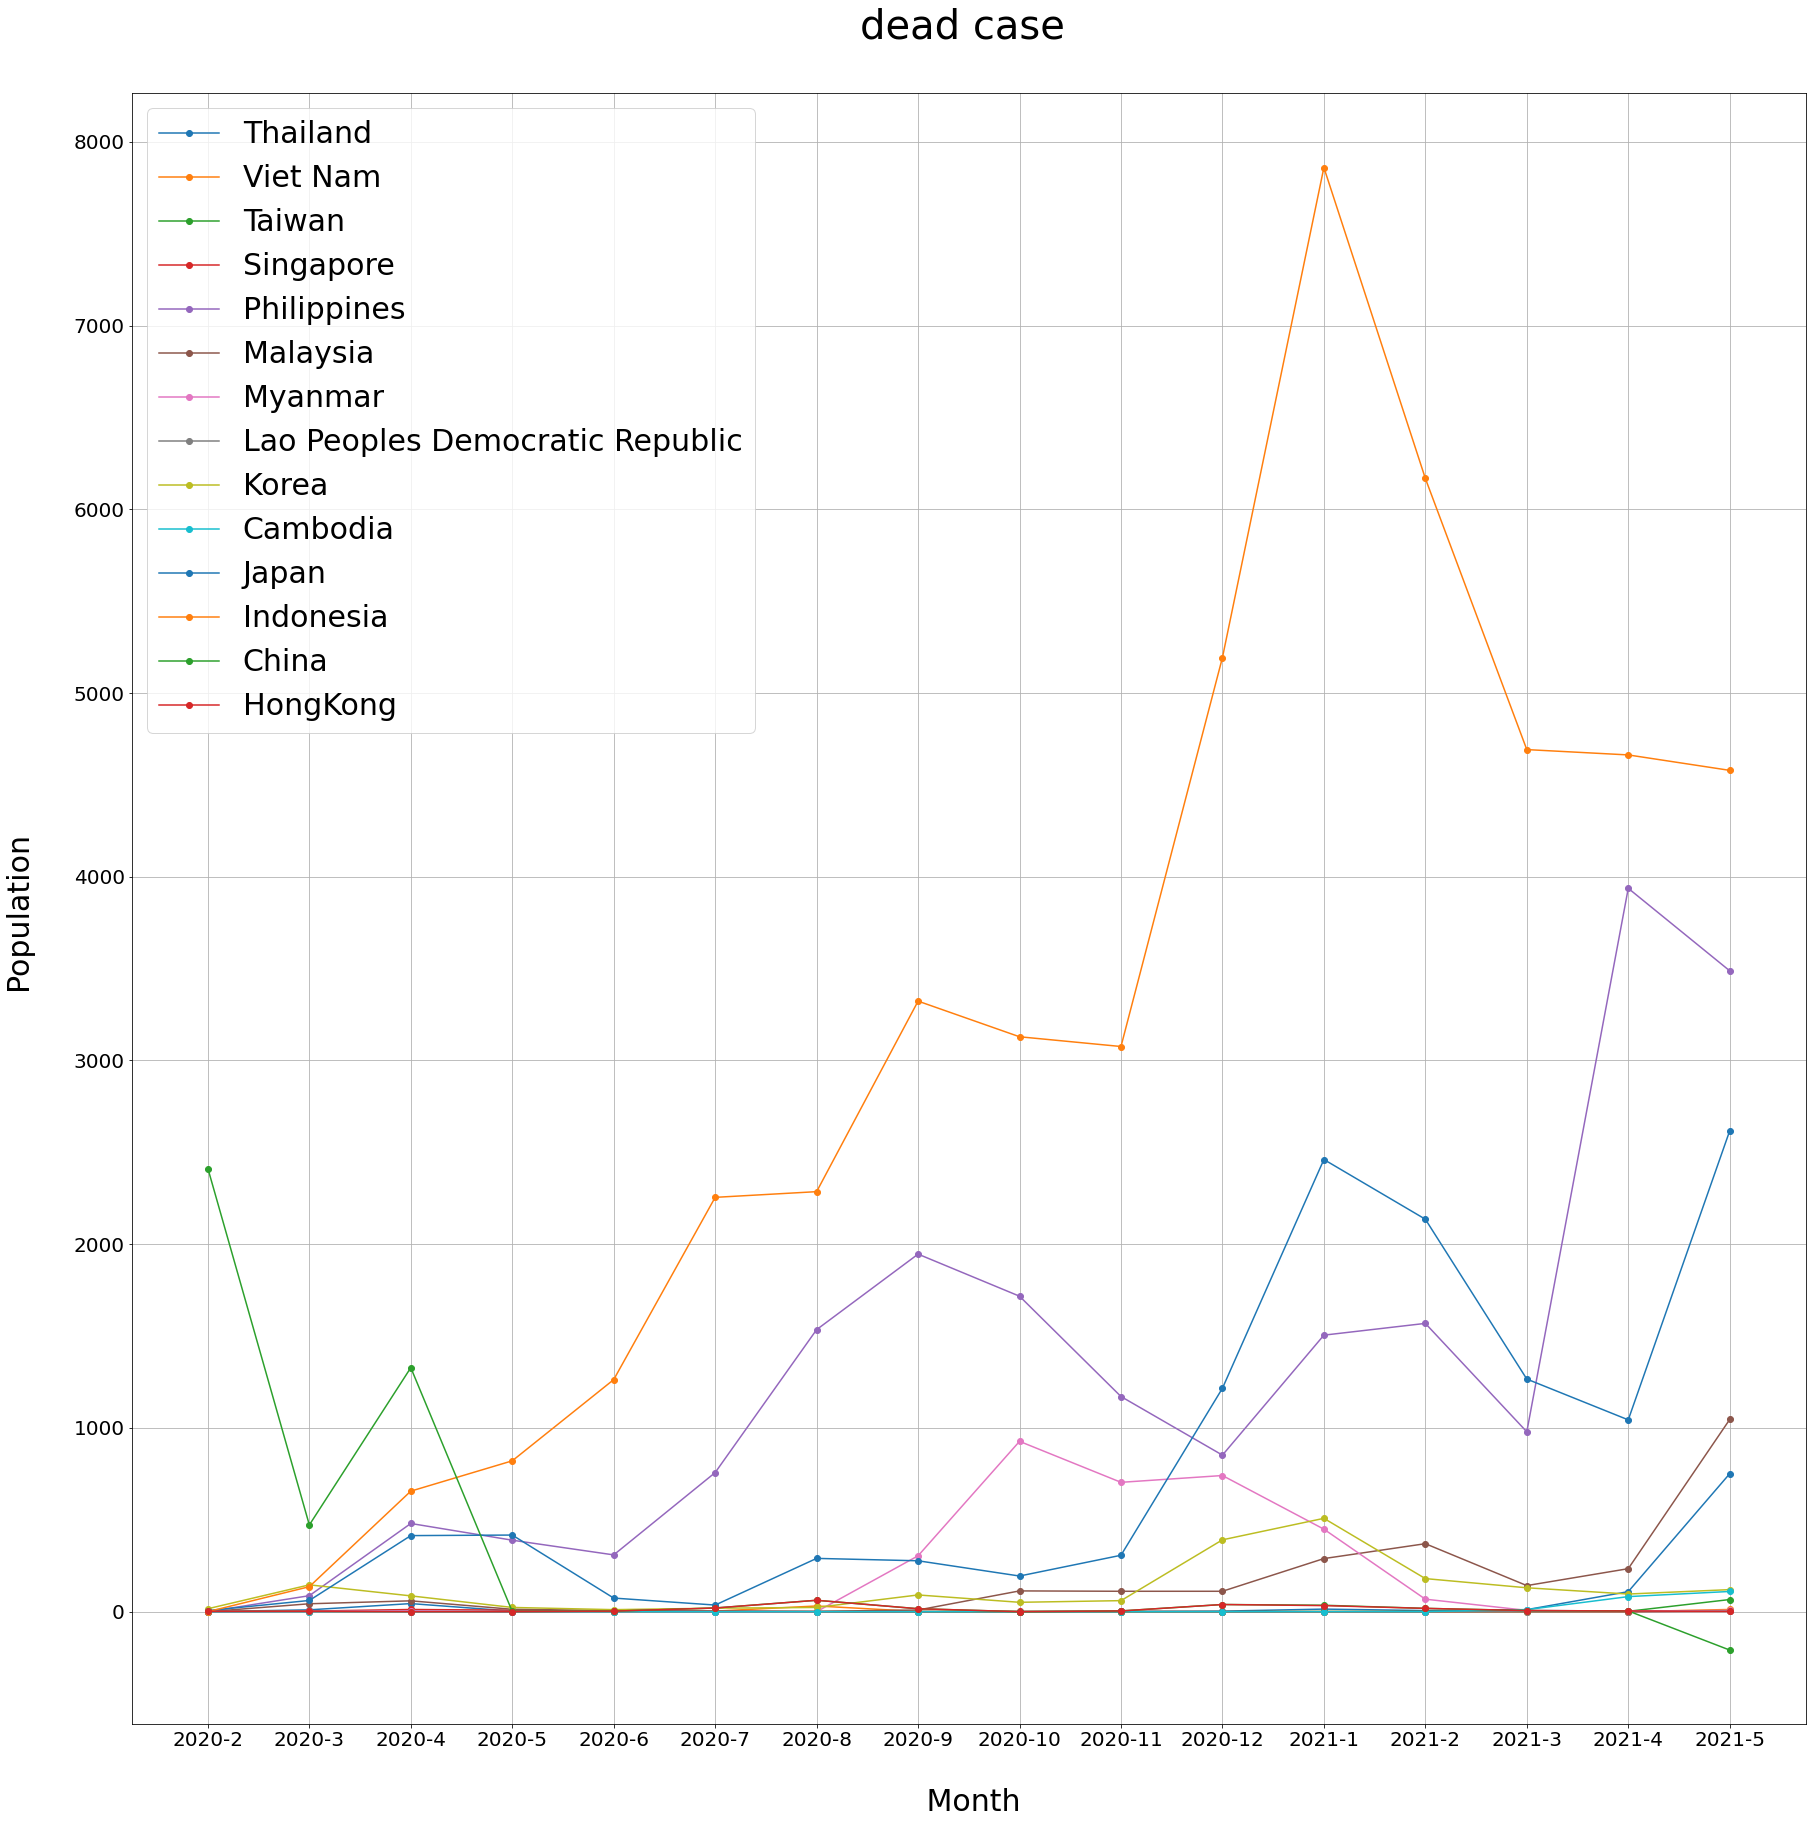

In [23]:
x = str_mounth_list

y_th = th_monthly_dead
y_vn = vn_monthly_dead
y_tw = tw_monthly_dead
y_sg = sg_monthly_dead
y_ph = ph_monthly_dead
y_my = my_monthly_dead
y_mm = mm_monthly_dead
y_la = la_monthly_dead
y_kr = kr_monthly_dead
y_kh = kh_monthly_dead
y_jp = jp_monthly_dead
y_IN = IN_monthly_dead
y_id = id_monthly_dead
y_cn = cn_monthly_dead
y_hk = hk_monthly_dead

plt.rcParams["figure.figsize"] = (30, 30)
plt.tick_params(axis='both', labelsize=20)

Data_th, = plt.plot(x,y_th,marker='o',label='Thailand')
Data_vn, = plt.plot(x,y_vn,marker='o',label='Viet Nam')
Data_tw, = plt.plot(x,y_tw,marker='o',label='Taiwan')
Data_sg, = plt.plot(x,y_sg,marker='o',label='Singapore')
Data_ph, = plt.plot(x,y_ph,marker='o',label='Philippines')
Data_my, = plt.plot(x,y_my,marker='o',label='Malaysia')
Data_mm, = plt.plot(x,y_mm,marker='o',label='Myanmar')
Data_la, = plt.plot(x,y_la,marker='o',label='Lao Peoples Democratic Republic')
Data_kr, = plt.plot(x,y_kr,marker='o',label='Korea')
Data_kh, = plt.plot(x,y_kh,marker='o',label='Cambodia')
Data_jp, = plt.plot(x,y_jp,marker='o',label='Japan')
#Data_IN, = plt.plot(x,y_IN,label='India')
Data_id, = plt.plot(x,y_id,marker='o',label='Indonesia')
Data_cn, = plt.plot(x,y_cn,marker='o',label='China')
Data_hk, = plt.plot(x,y_hk,marker='o',label='HongKong')

plt.legend(handles=[Data_th, Data_vn, Data_tw, Data_sg, Data_ph, Data_my, Data_mm, Data_la, Data_kr, Data_kh, Data_jp,Data_id,Data_cn,Data_hk],fontsize=30)
plt.title('dead case \n',size=40)
plt.xlabel('\n Month',size=30)
plt.ylabel('Population \n',size=30)
plt.grid()
plt.show() #顯示繪製的圖形

## 結論

## 2. 台灣地區每日施打疫苗人數與患者成長數比較

### 先將台灣關於 COVID-19 的相關資料載入，把所需用到的確診患者人數與施打疫苗人數兩個表格調出來做整理，並製作成圖表以方便觀看

#### (請各位將上述說明之程式及圖表放在這邊)

In [24]:
# 接種數
TW_vacc = pd.read_csv('csse_covid_19_daily_reports_vaccine_city_c.csv',thousands = ',',encoding='utf-8')
# 確診數
TW_con = pd.read_csv('covidtable_taiwan_cdc2.csv')

### 日期處理

In [25]:
# 手動區間
d1 = [['2021-05-31', '2021-05-30', '2021-05-28', '2021-05-27', '2021-05-26', '2021-05-25', '2021-05-24', '2021-05-23', '2021-05-21', '2021-05-20', '2021-05-19', '2021-05-18']
, ['2021-05-14', '2021-05-07', '2021-05-02']
, ['2021-04-30', '2021-04-16']
, ['2021-04-15', '2021-04-14', '2021-04-07', '2021-04-05', '2021-04-04', '2021-04-03', '2021-04-02']
, ['2021-03-24', '2021-03-23', '2021-03-22', '2021-03-21']]
dur1 = ['2021-05-16', '2021-05-01', '2021-04-16', '2021-04-01', '2021-03-20']

interval_March_to_May = ["0320-0331", "0401-0415", "0416-0430", "0501-0515", "0516-0531"]

### 使用函數

In [26]:
# 接種數資料
def transf_data(sm):
    sm_data = list()
    for i in range(5):
        rslt = 0
        for d in d1[i]:
            if d in list(sm.日期):
                rslt += int(sm.loc[sm.日期 == d].新增接種人數)
        sm_data.append(rslt)
    return sm_data

In [27]:
# 確診數資料
def m_conf(sm):
    daily = list()
    rslt = list() # 最後要回傳的東西
    d2 = pd.unique(sm.個案研判日)
    for d in list(d2):
            daily.append(len(sm.loc[sm.個案研判日 == d]))
    
    i = 0
    tmp = 0
    for d in dur1:
        if i < (len(d2)):
            while d2[i] != d:
                tmp += daily[i]
                i+=1
                if i >= (len(d2)) : break
        rslt.append(tmp)
        tmp = 0
    return rslt

### Read 要使用的資料

In [28]:
# 接種數資料
select_df = pd.DataFrame(TW_vacc)
tp_vacc = select_df.loc[select_df.縣市別 == '臺北市']
ntp_vacc = select_df.loc[select_df.縣市別 == '新北市']
ty_vacc = select_df.loc[select_df.縣市別 == '桃園市']
tc_vacc = select_df.loc[select_df.縣市別 == '臺中市']
tn_vacc = select_df.loc[select_df.縣市別 == '臺南市']
ks_vacc = select_df.loc[select_df.縣市別 == '高雄市']

# 確診數資料
TW_con_in = TW_con.loc[TW_con.個案研判日 > '2021-03-01'] # 因為它有這之前的資料，先做出區間
tc_conf = TW_con_in.loc[TW_con_in.縣市 == '台中市']
ty_conf = TW_con_in.loc[TW_con_in.縣市 == '桃園市']
tn_conf = TW_con_in.loc[TW_con_in.縣市 == '台南市']
ks_conf = TW_con_in.loc[TW_con_in.縣市 == '高雄市']
ntp_conf = TW_con_in.loc[TW_con_in.縣市 == '新北市']
tp_conf = TW_con_in.loc[TW_con_in.縣市 == '台北市']

### 算出來的數值

In [29]:
# 臺北市
tp_vacc_data = transf_data(tp_vacc)
tp_conf_data = m_conf(tp_conf)
# 桃園市
ty_vacc_data = transf_data(ty_vacc)
ty_conf_data = m_conf(ty_conf)
# 新北市
ntp_vacc_data = transf_data(ntp_vacc)
ntp_conf_data = m_conf(ntp_conf)
# 臺中市
tc_vacc_data = transf_data(tc_vacc)
tc_conf_data = m_conf(tc_conf)
# 臺南市
tn_vacc_data = transf_data(tn_vacc)
tn_conf_data = m_conf(tn_conf)
# 高雄市
ks_vacc_data = transf_data(ks_vacc)
ks_conf_data = m_conf(ks_conf)

tp_vacc_data.reverse()
ty_vacc_data.reverse()
ntp_vacc_data.reverse()
tc_vacc_data.reverse()
tn_vacc_data.reverse()
ks_vacc_data.reverse()
tp_conf_data.reverse()
ty_conf_data.reverse()
ntp_conf_data.reverse()
tc_conf_data.reverse()
tn_conf_data.reverse()
ks_conf_data.reverse()

# 以上都是必要的資料處理程式 #

### 台北

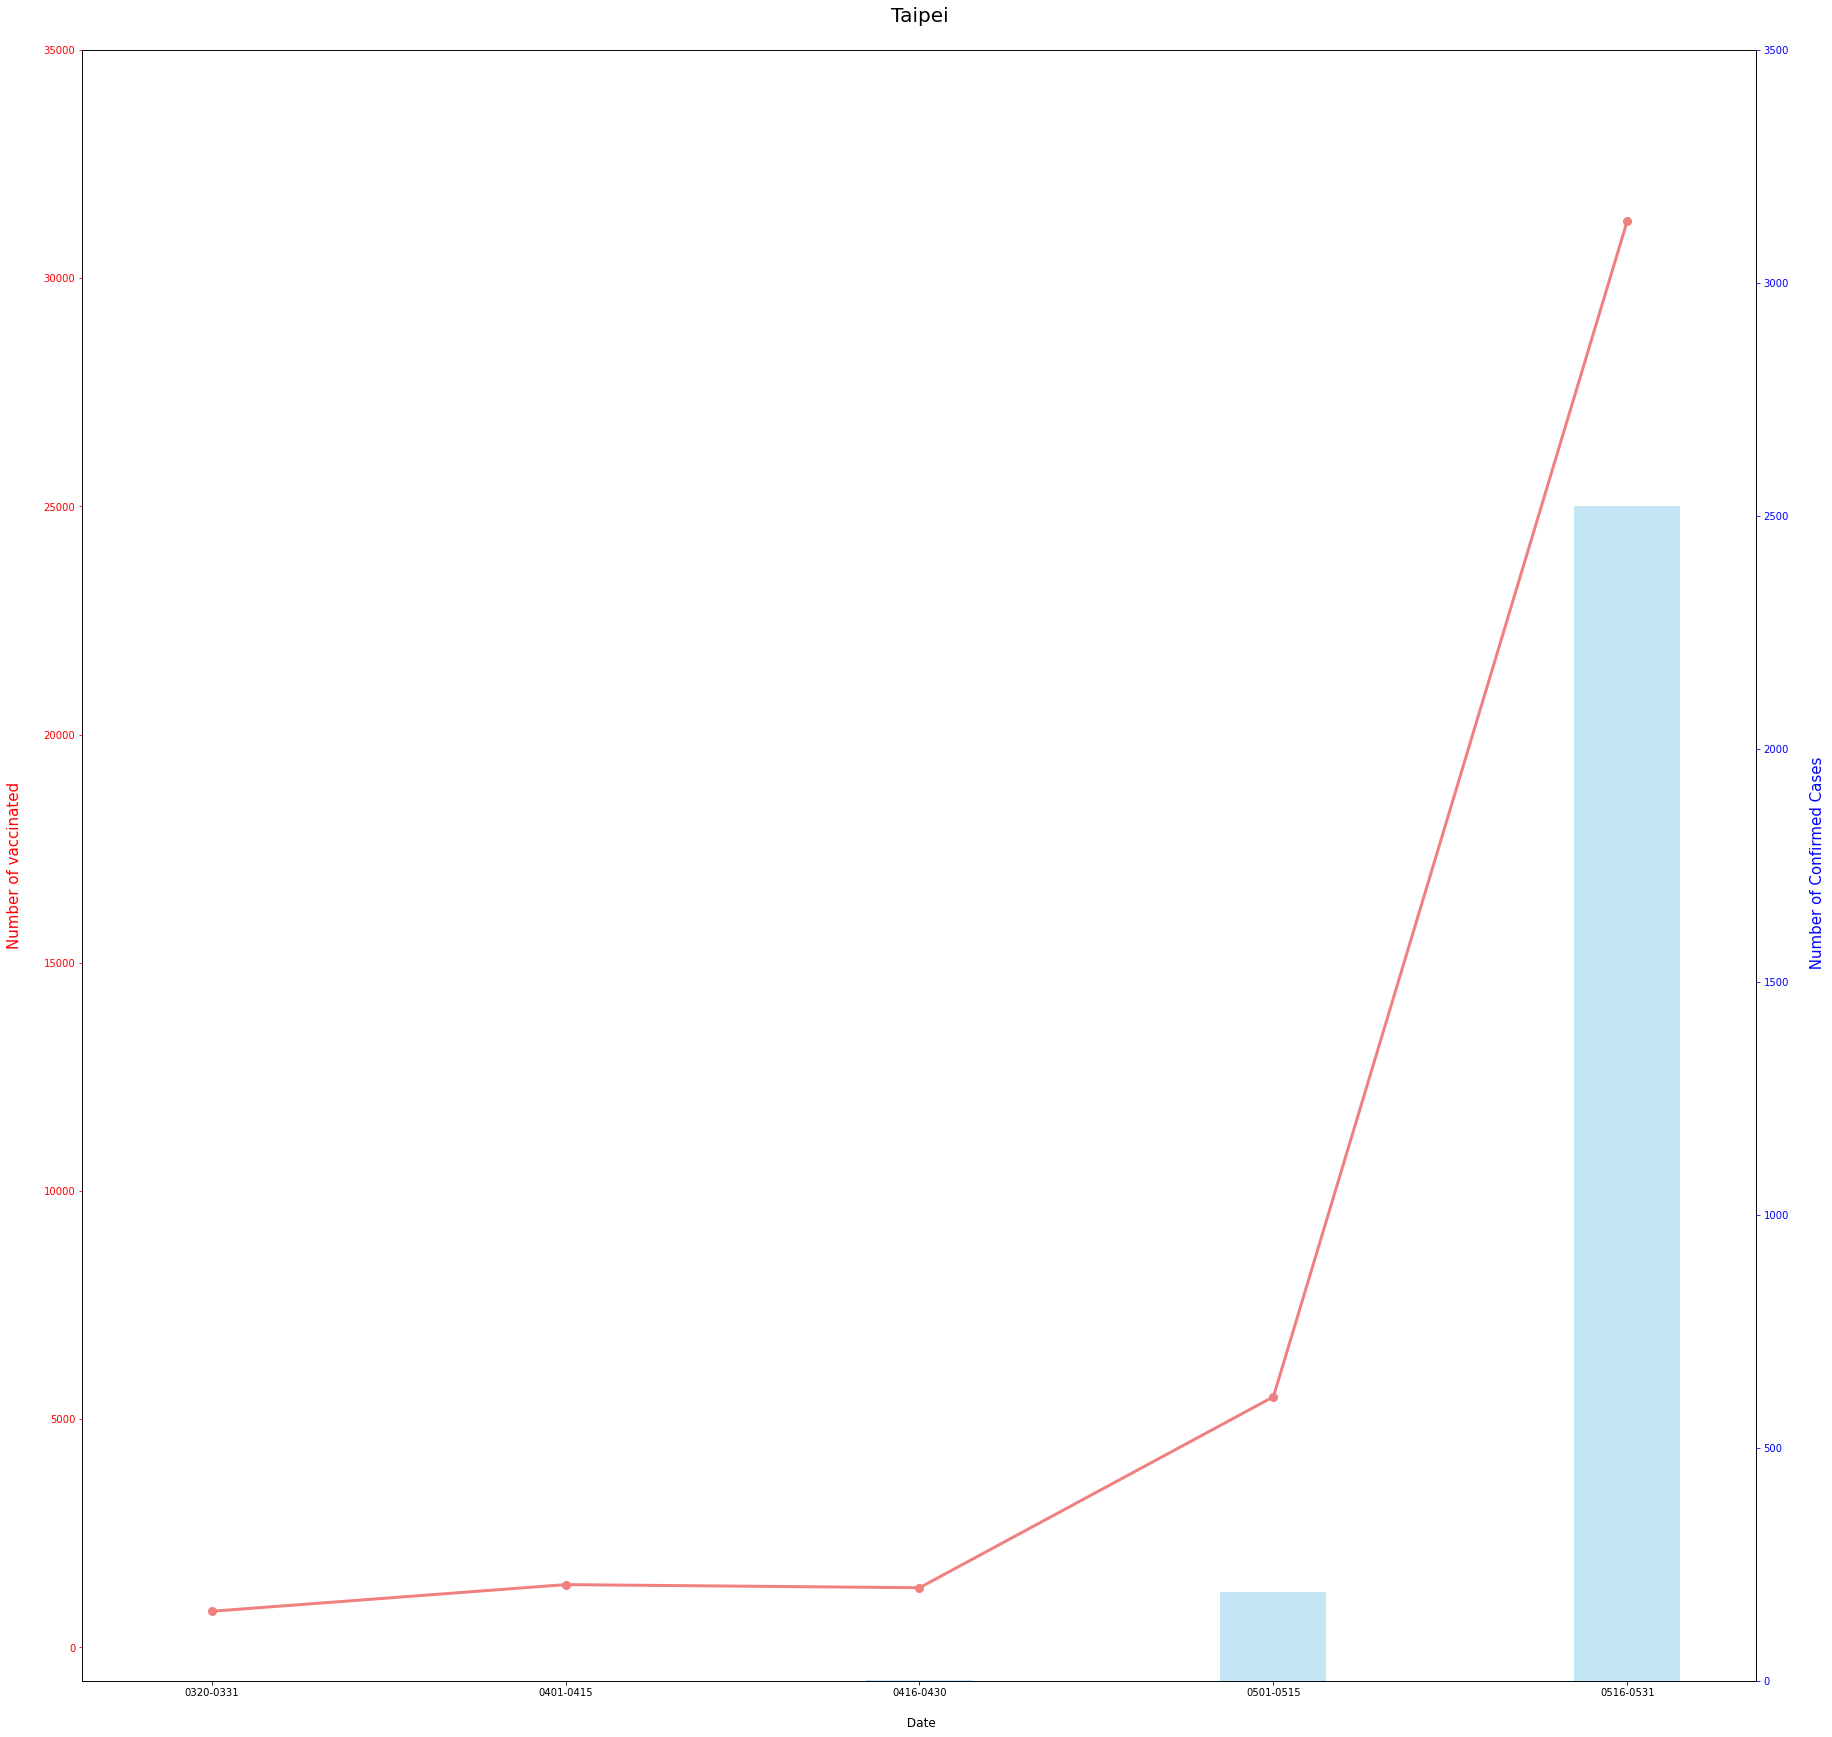

In [30]:
fig, tp_ax1 = plt.subplots()

tp_ax1.set_xlabel('\n Date',size=12)

tp_ax1.plot(interval_March_to_May,tp_vacc_data,marker='o',color='lightcoral',linewidth=3, markersize=8)
tp_ax1.set_ylabel('Number of vaccinated\n',color='r',size=15)
tp_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,5000,10000,15000,20000,25000,30000,35000])

tp_ax2 = tp_ax1.twinx()

tp_ax2.bar(interval_March_to_May,tp_conf_data,color='skyblue',width=0.3,alpha=0.5)
tp_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=15)
tp_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,500,1000,1500,2000,2500,3000,3500])

plt.title("Taipei\n",size=20)

plt.show()

### 桃園

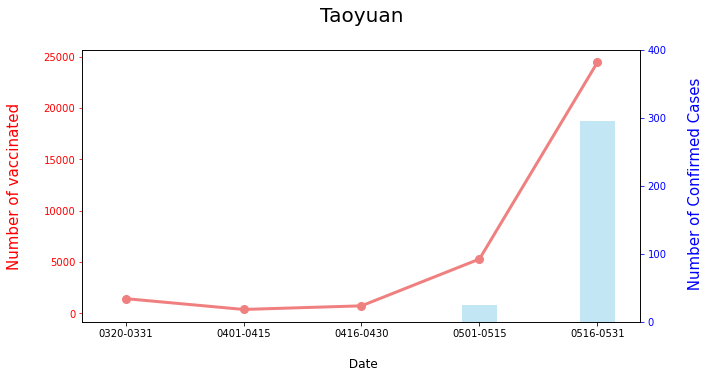

In [31]:
fig, ty_ax1 = plt.subplots()

ty_ax1.set_xlabel('\n Date',size=12)

ty_ax1.plot(interval_March_to_May,ty_vacc_data,marker='o',color='lightcoral',linewidth=3, markersize=8)
ty_ax1.set_ylabel('Number of vaccinated\n',color='r',size=15)
ty_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,5000,10000,15000,20000,25000])

ty_ax2 = ty_ax1.twinx()

ty_ax2.bar(interval_March_to_May,ty_conf_data,color='skyblue',width=0.3,alpha=0.5)
ty_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=15)
ty_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,100,200,300,400])

plt.title("Taoyuan\n",size=20)

plt.show()

### 新北

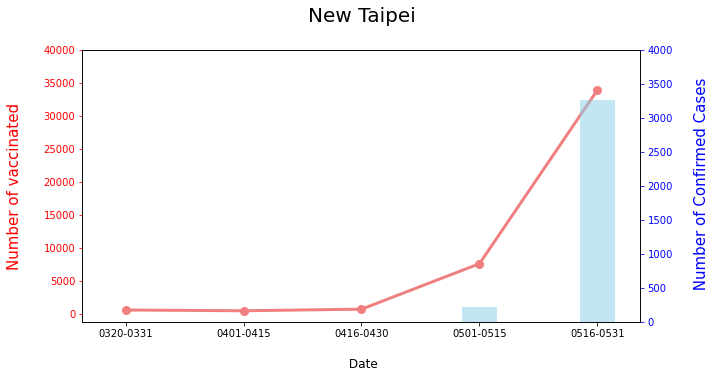

In [32]:
fig, ntp_ax1 = plt.subplots()

ntp_ax1.set_xlabel('\n Date',size=12)

ntp_ax1.plot(interval_March_to_May,ntp_vacc_data,marker='o',color='lightcoral',linewidth=3, markersize=8)
ntp_ax1.set_ylabel('Number of vaccinated\n',color='r',size=15)
ntp_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,5000,10000,15000,20000,25000,30000,35000,40000])

ntp_ax2 = ntp_ax1.twinx()

ntp_ax2.bar(interval_March_to_May,ntp_conf_data,color='skyblue',width=0.3,alpha=0.5)
ntp_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=15)
ntp_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000])

plt.title("New Taipei\n",size=20)

plt.show()

### 台中

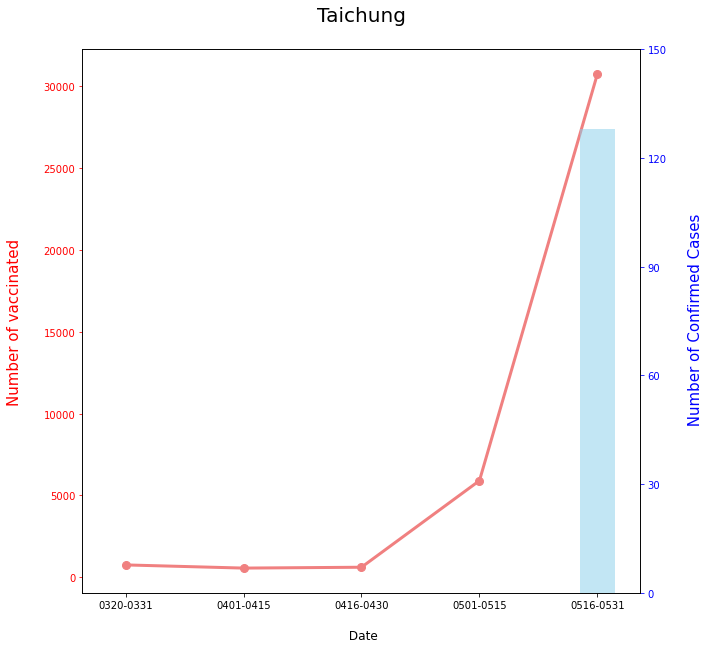

In [33]:
fig, tc_ax1 = plt.subplots()

tc_ax1.set_xlabel('\n Date',size=12)

tc_ax1.plot(interval_March_to_May,tc_vacc_data,marker='o',color='lightcoral',linewidth=3, markersize=8)
tc_ax1.set_ylabel('Number of vaccinated\n',color='r',size=15)
tc_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,5000,10000,15000,20000,25000,30000])

tc_ax2 = tc_ax1.twinx()

tc_ax2.bar(interval_March_to_May,tc_conf_data,color='skyblue',width=0.3,alpha=0.5)
tc_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=15)
tc_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,30,60,90,120,150])

plt.title("Taichung\n",size=20)

plt.show()

### 台南

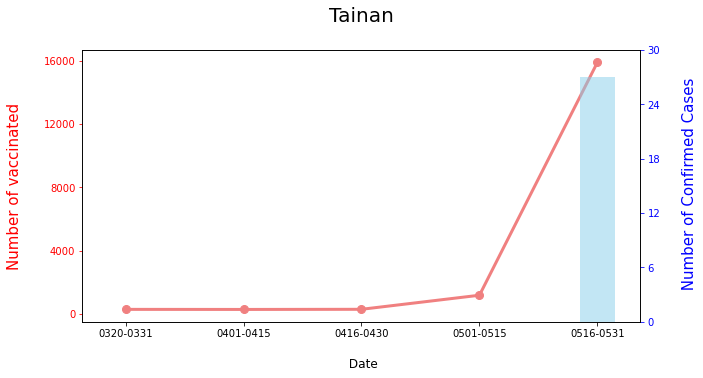

In [34]:
fig, tn_ax1 = plt.subplots()

tn_ax1.set_xlabel('\n Date',size=12)

tn_ax1.plot(interval_March_to_May,tn_vacc_data,marker='o',color='lightcoral',linewidth=3, markersize=8)
tn_ax1.set_ylabel('Number of vaccinated\n',color='r',size=15)
tn_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,4000,8000,12000,16000])

tn_ax2 = tn_ax1.twinx()

tn_ax2.bar(interval_March_to_May,tn_conf_data,color='skyblue',width=0.3,alpha=0.5)
tn_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=15)
tn_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,6,12,18,24,30])

plt.title("Tainan\n",size=20)

plt.show()

### 高雄

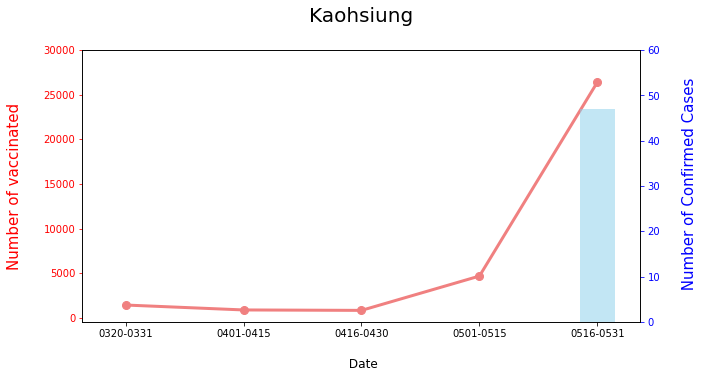

In [35]:
fig, ks_ax1 = plt.subplots()

ks_ax1.set_xlabel('\n Date',size=12)

ks_ax1.plot(interval_March_to_May,ks_vacc_data,marker='o',color='lightcoral',linewidth=3, markersize=8)
ks_ax1.set_ylabel('Number of vaccinated\n',color='r',size=15)
ks_ax1.tick_params('y', colors='r')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,5000,10000,15000,20000,25000,30000])

ks_ax2 = ks_ax1.twinx()

ks_ax2.bar(interval_March_to_May,ks_conf_data,color='skyblue',width=0.3,alpha=0.5)
ks_ax2.set_ylabel('\n Number of Confirmed Cases',color='b',size=15)
ks_ax2.tick_params('y', colors='b')

plt.rcParams["figure.figsize"] = (10,5)
plt.tick_params(axis='both', labelsize=10)

plt.yticks([0,10,20,30,40,50,60])

plt.title("Kaohsiung\n",size=20)

plt.show()

In [36]:
print(ks_vacc_data)
print(ks_conf_data)

[1433, 882, 833, 4678, 26408]
[0, 0, 0, 0, 47]


In [37]:
print(tp_vacc_data)
print(ty_vacc_data)
print(ntp_vacc_data)
print(tc_vacc_data)
print(tn_vacc_data)
print(ks_vacc_data)

[791, 1375, 1307, 5490, 31258]
[1432, 378, 730, 5293, 24473]
[572, 456, 696, 7593, 33927]
[755, 561, 613, 5901, 30744]
[292, 287, 296, 1185, 15902]
[1433, 882, 833, 4678, 26408]


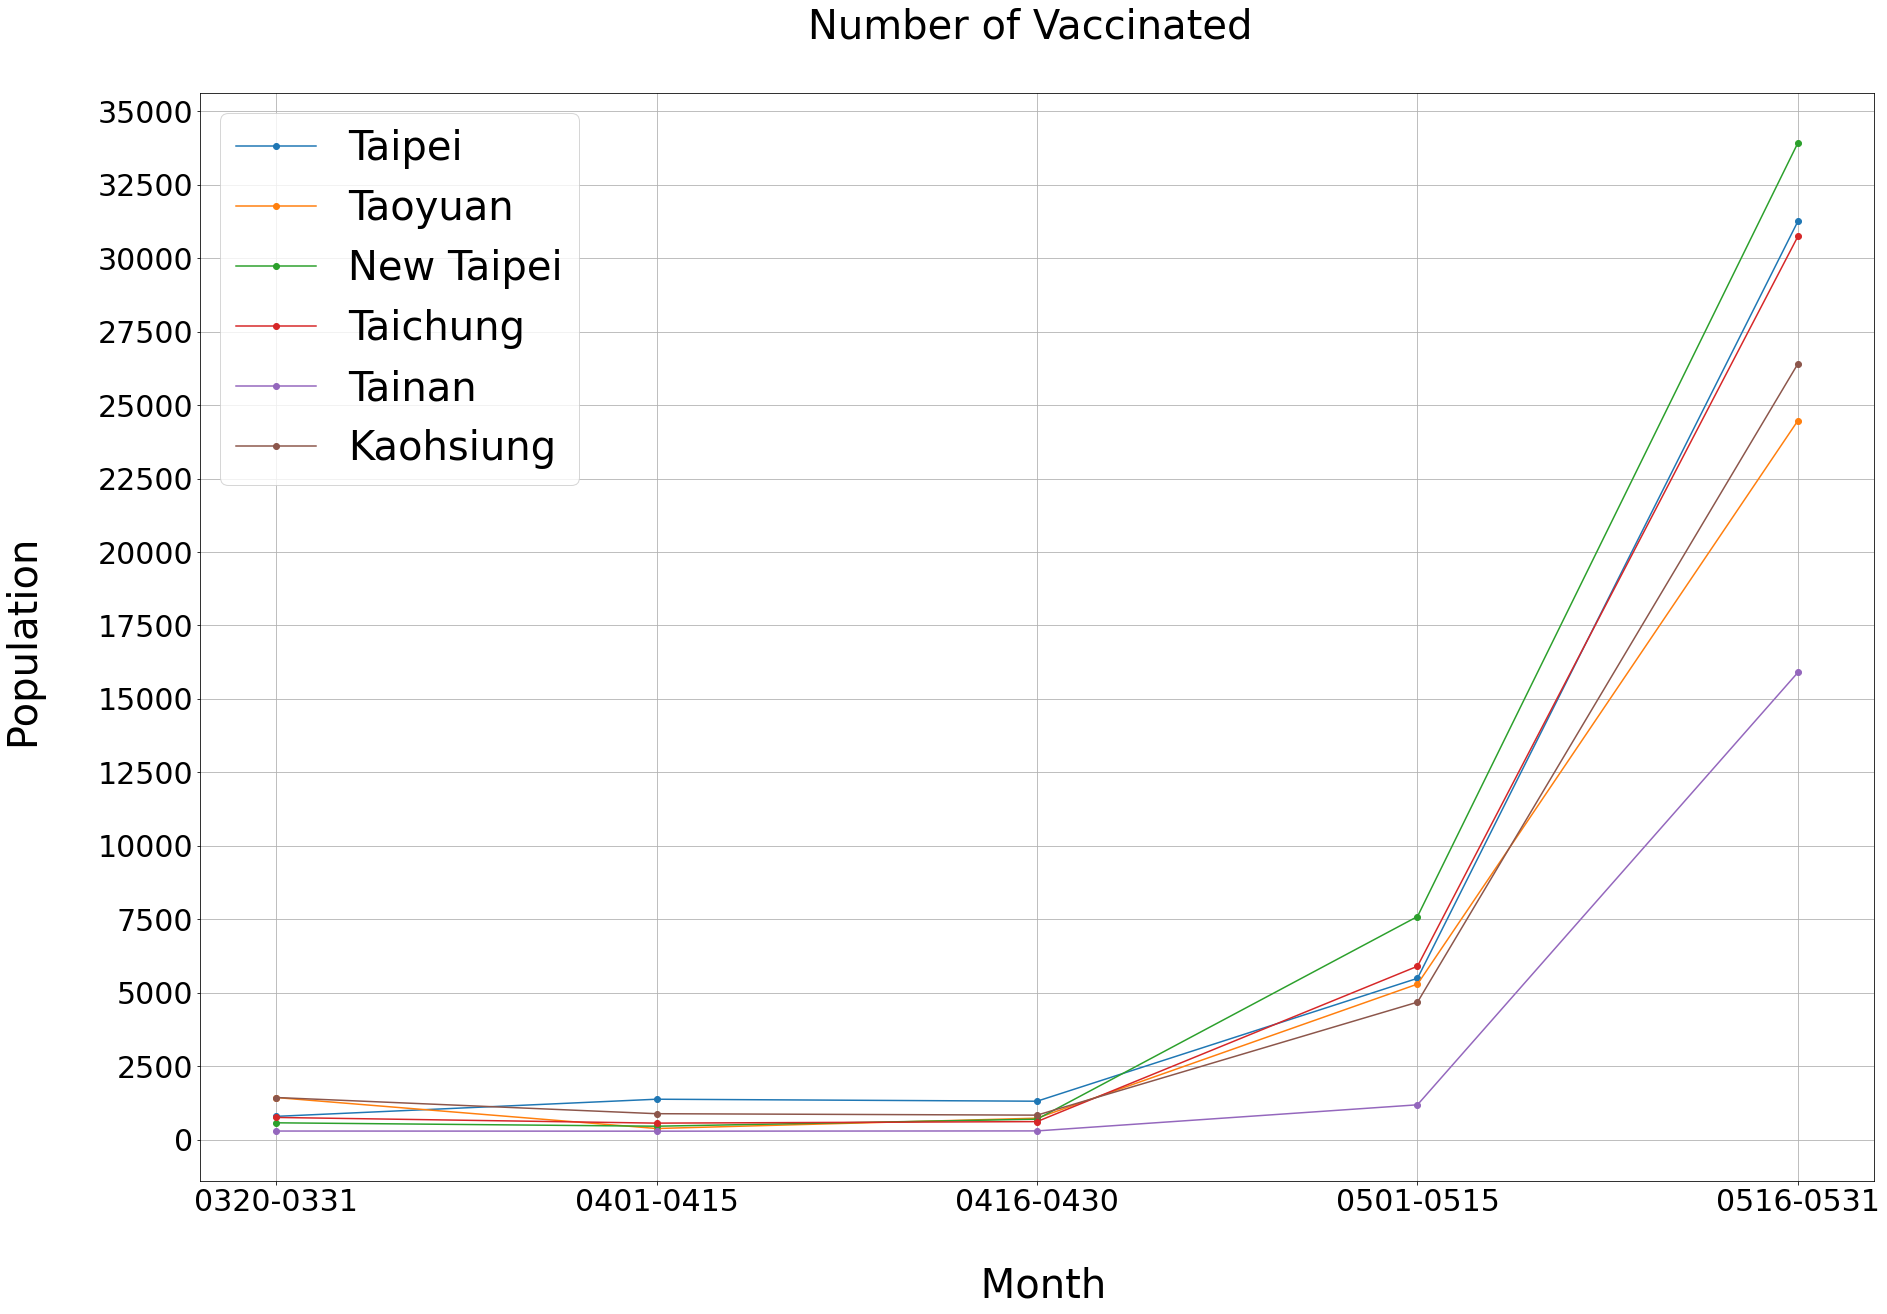

In [38]:
y_tp = tp_vacc_data
y_ty = ty_vacc_data
y_ntp = ntp_vacc_data
y_tc = tc_vacc_data
y_tn = tn_vacc_data
y_ks = ks_vacc_data


plt.rcParams["figure.figsize"] = (30, 20)
plt.tick_params(axis='both', labelsize=30)

Data_tp, = plt.plot(interval_March_to_May,y_tp,marker='o',label='Taipei')
Data_ty, = plt.plot(interval_March_to_May,y_ty,marker='o',label='Taoyuan')
Data_ntp, = plt.plot(interval_March_to_May,y_ntp,marker='o',label='New Taipei')
Data_tc, = plt.plot(interval_March_to_May,y_tc,marker='o',label='Taichung')
Data_tn, = plt.plot(interval_March_to_May,y_tn,marker='o',label='Tainan')
Data_ks, = plt.plot(interval_March_to_May,y_ks,marker='o',label='Kaohsiung')


plt.legend(handles=[Data_tp, Data_ty, Data_ntp, Data_tc, Data_tn, Data_ks],fontsize=40)
plt.title('Number of Vaccinated \n',size=40)
plt.xlabel('\n Month',size=40)
plt.ylabel('Population \n',size=40)

plt.yticks([0,2500,5000,7500,10000,
          12500,15000,17500,20000,
          22500,25000,27500,30000,
          32500,35000])

plt.grid()
plt.show() #顯示繪製的圖形

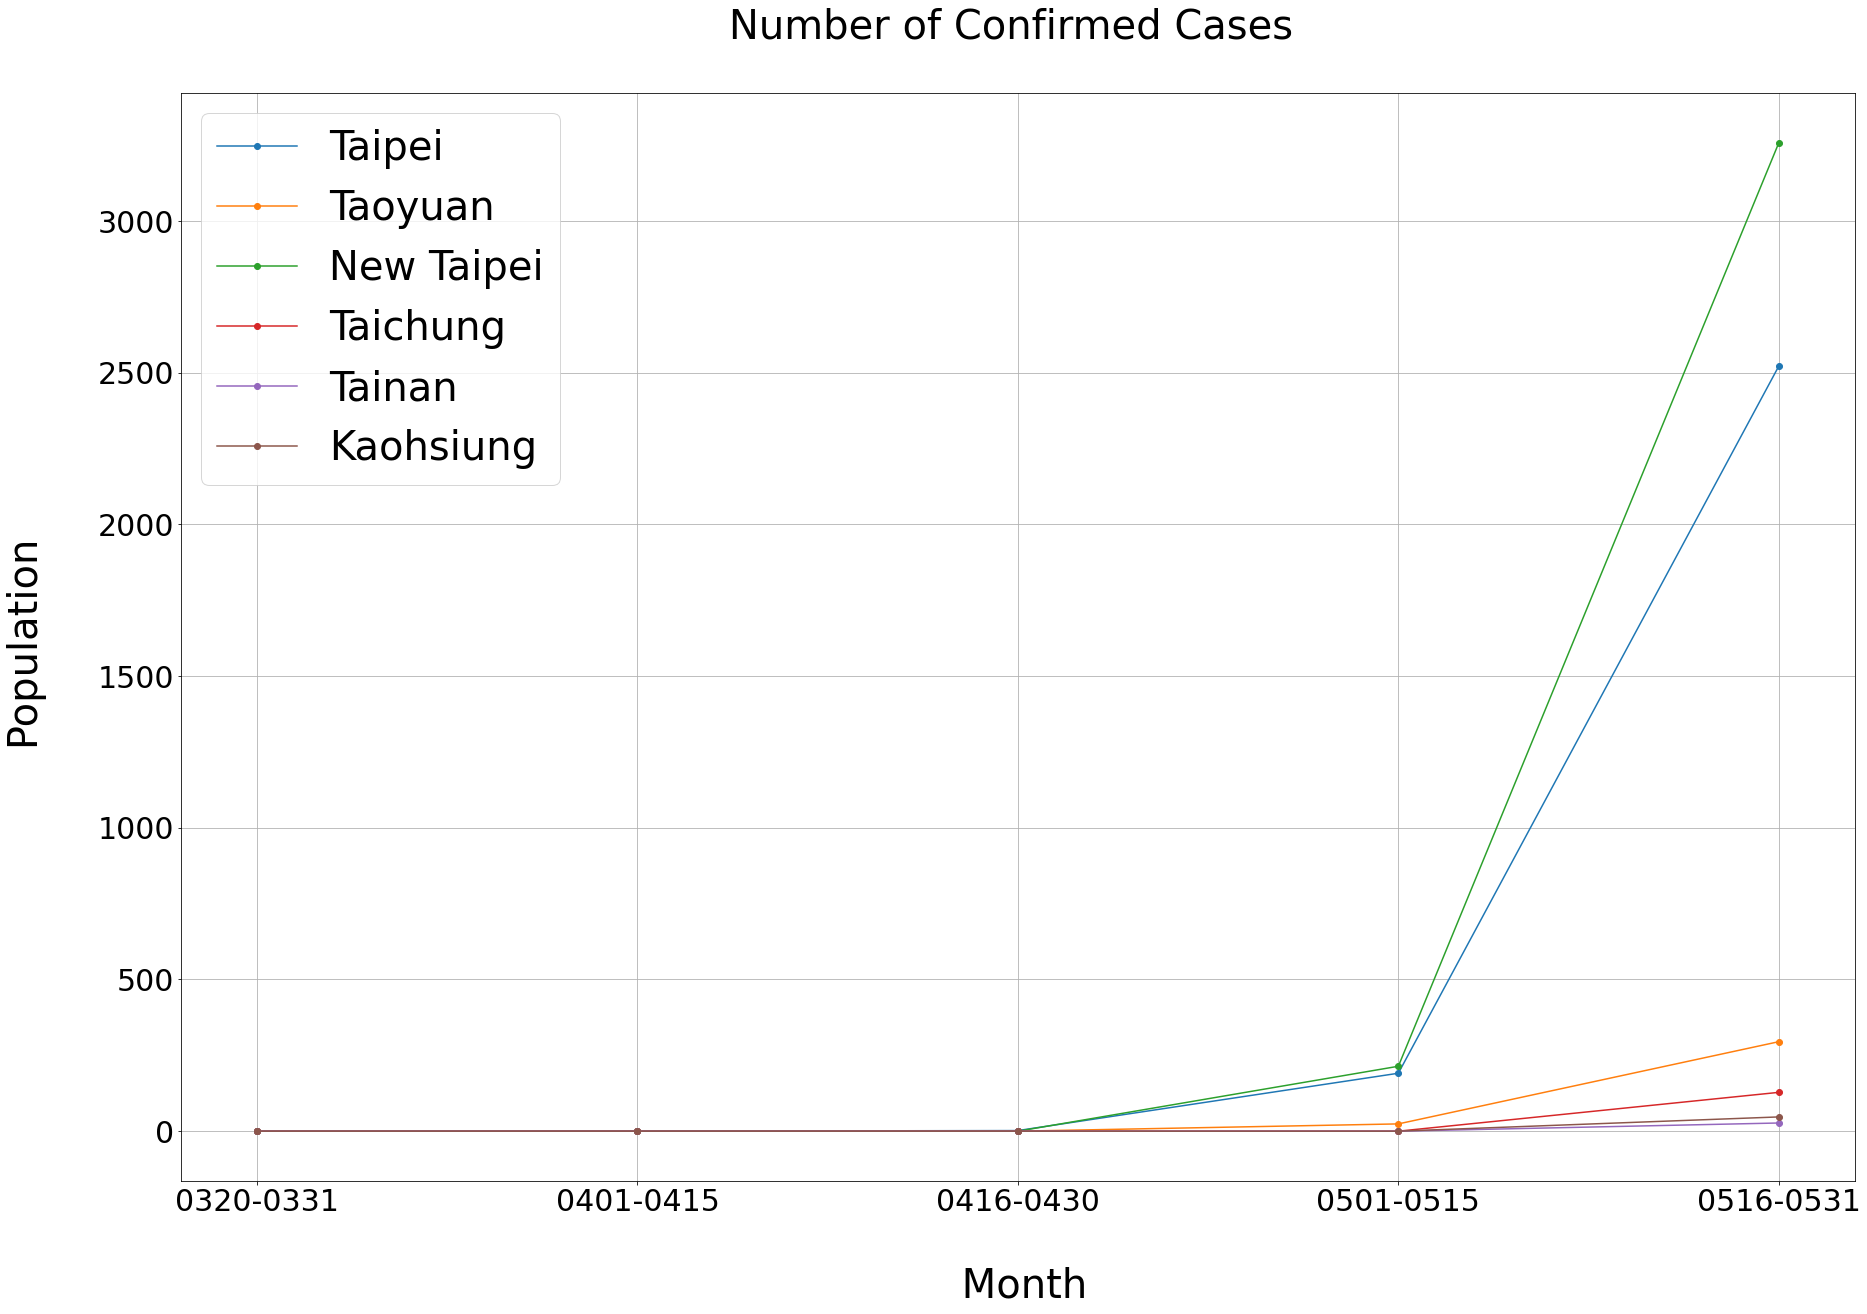

In [39]:
y_tp = tp_conf_data
y_ty = ty_conf_data
y_ntp = ntp_conf_data
y_tc = tc_conf_data
y_tn = tn_conf_data
y_ks = ks_conf_data


plt.rcParams["figure.figsize"] = (30, 20)
plt.tick_params(axis='both', labelsize=30)

Data_tp, = plt.plot(interval_March_to_May,y_tp,marker='o',label='Taipei')
Data_ty, = plt.plot(interval_March_to_May,y_ty,marker='o',label='Taoyuan')
Data_ntp, = plt.plot(interval_March_to_May,y_ntp,marker='o',label='New Taipei')
Data_tc, = plt.plot(interval_March_to_May,y_tc,marker='o',label='Taichung')
Data_tn, = plt.plot(interval_March_to_May,y_tn,marker='o',label='Tainan')
Data_ks, = plt.plot(interval_March_to_May,y_ks,marker='o',label='Kaohsiung')


plt.legend(handles=[Data_tp, Data_ty, Data_ntp, Data_tc, Data_tn, Data_ks],fontsize=40)
plt.title('Number of Confirmed Cases \n',size=40)
plt.xlabel('\n Month',size=40)
plt.ylabel('Population \n',size=40)

#plt.yticks([0,2500,5000,7500,10000,
#          12500,15000,17500,20000,
#          22500,25000,27500,30000,
#          32500,35000])

plt.grid()
plt.show() #顯示繪製的圖形

## 給折線圖組 可以用的陣列資料：
### interval_March_to_May : 五個區間的起-始 字串 <br> ['0320-0331', '0401-0415', '0416-0430', '0501-0515', '0516-0531']
### 某市縮寫_vacc_data : 台灣某直轄市月接種數 <br> 某市縮寫_conf_data : 台灣某直轄市月確診數

## 結論

# 五、數據來源

## <a href="https://covid-19.nchc.org.tw/index.php">COVID-19全球疫情地圖</a> 